In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 150)

In [2]:
pd.set_option('display.max_columns', None)

# Load Main Dataset

In [3]:
df = pd.read_csv('listings.csv')

/anaconda3/envs/time_series/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Null Values

In [4]:
df.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               26
summary                                          3876
space                                           25588
description                                      1823
experiences_offered                                 0
neighborhood_overview                           30454
notes                                           51115
transit                                         30808
access                                          37455
interaction                                     35041
house_rules                                     35001
thumbnail_url                                   83850
medium_url                                      83850
picture_url                                         0
xl_picture_url              

In [5]:
columns_remove = ['notes', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license', 'jurisdiction_names']
df = df.drop(columns_remove, axis=1)

##### Non Numeric columns

In [6]:
var_nonnum_imp = ['id','experiences_offered', 'host_since', 'host_response_rate'
      ,'host_is_superhost', 'host_neighbourhood','host_verifications', 'host_has_profile_pic',
        'host_identity_verified', 'city', 'property_type', 'room_type', 'bed_type',
        'price', 'security_deposit', 'cleaning_fee', 'extra_people',
        'instant_bookable', 'is_business_travel_ready', 'cancellation_policy']

In [7]:
df_nonnum = df[var_nonnum_imp]

Converting price from string to numeric

In [8]:
df_nonnum['price'] = df_nonnum['price'].replace('[\$,]', '', regex=True).astype(float)
df_nonnum['security_deposit'] = df_nonnum['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df_nonnum['cleaning_fee'] = df_nonnum['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df_nonnum['extra_people'] = df_nonnum['extra_people'].replace('[\$,]', '', regex=True).astype(float)

/anaconda3/envs/time_series/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/time_series/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/time_series/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

## use count of amenities 

In [9]:
df['amenities'] = df.loc[::, 'amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

##### Numeric columns

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

In [11]:
var_num_unimp = ['scrape_id', 'host_id']

In [12]:
df_num = df_num.drop(var_num_unimp, axis=1)

##### Master Data

In [13]:
df_master = pd.merge(df_num, df_nonnum, on='id', how='left')

# EDA

In [14]:
df_master.columns

Index(['id', 'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'guests_included', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'experiences_offered', 'host

##### Trimming out high values price

Text(0, 0.5, 'Count')

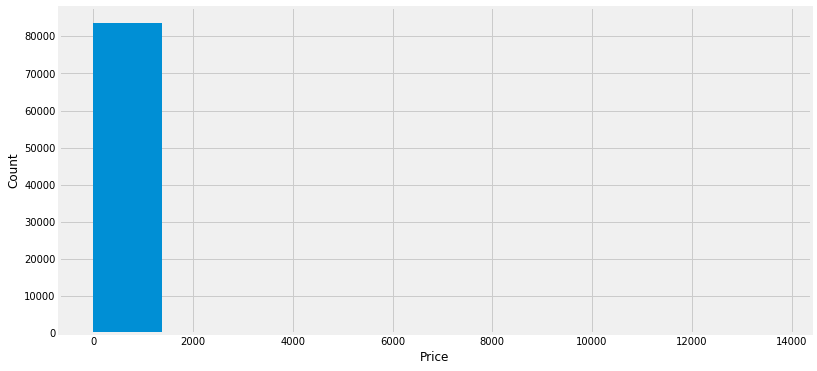

In [15]:
df_master.price.hist(figsize=(12,6))
plt.xlabel('Price')
plt.ylabel('Count')

In [16]:
Q1 = df_master.quantile(0.25)
Q3 = df_master.quantile(0.75)
IQR = Q3 - Q1


In [17]:
df_trimmed = df_master[df_master.price < Q3['price'] + 1.5 * IQR['price'] ] 

In [18]:
#df_trimmed = df_master.loc[df_master['price'] <= df_master['price'].quantile(.85)]

##### Histogram of price

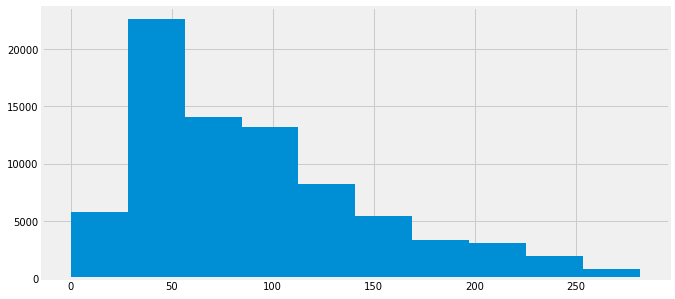

In [19]:
df_trimmed['price'].hist(figsize=(10,5))

##### Barplots for nominal variables

In [20]:
nominal_vars = ['host_is_superhost', 'room_type', 'bed_type',
                'instant_bookable', 'cancellation_policy', 'property_type']

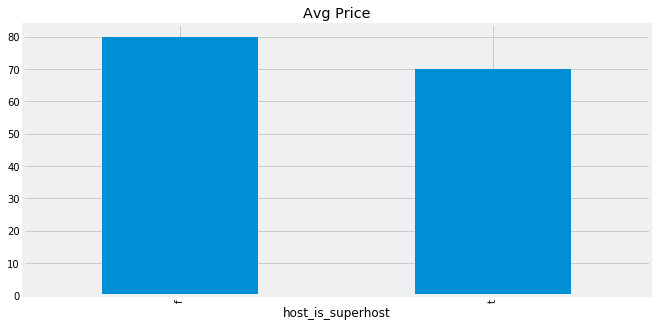

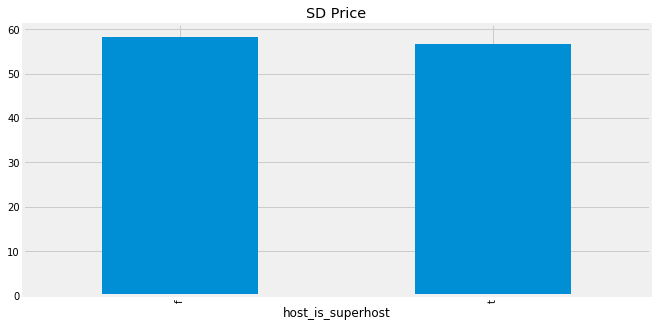

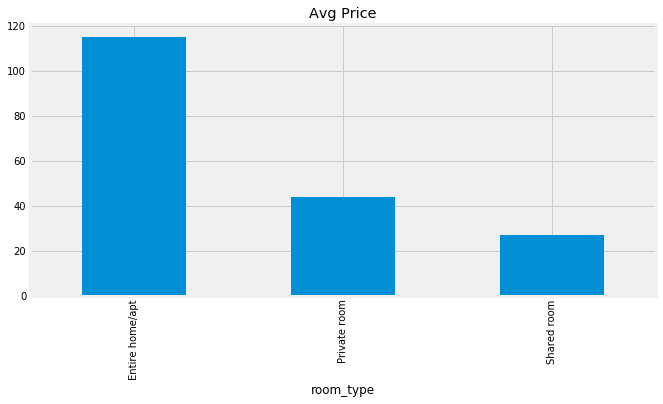

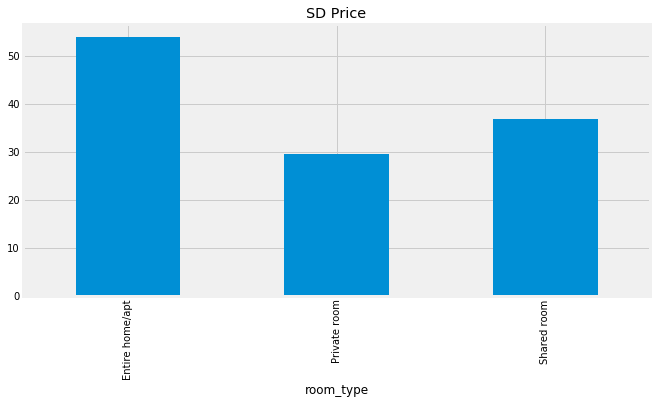

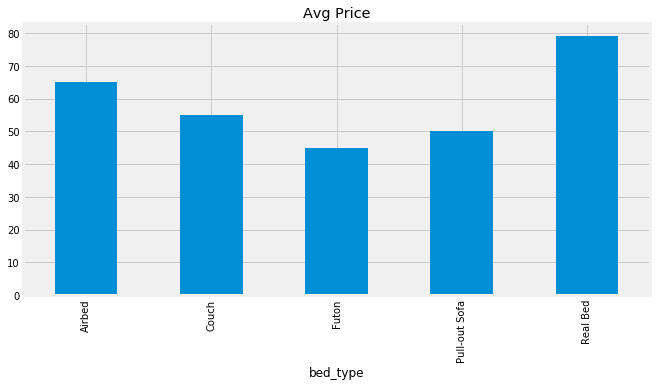

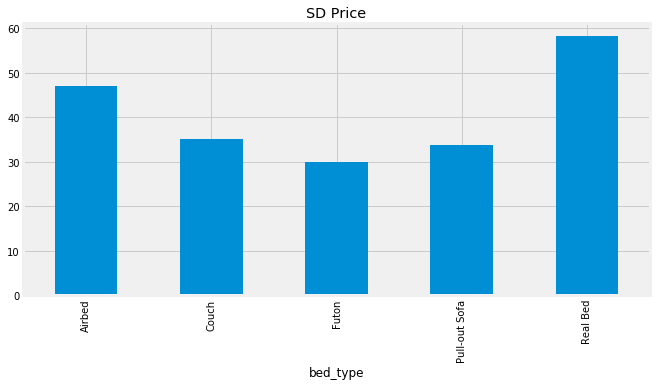

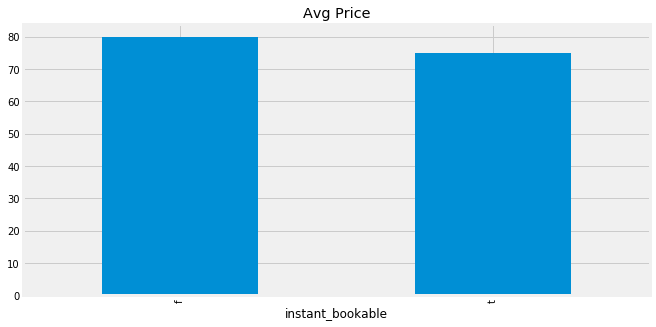

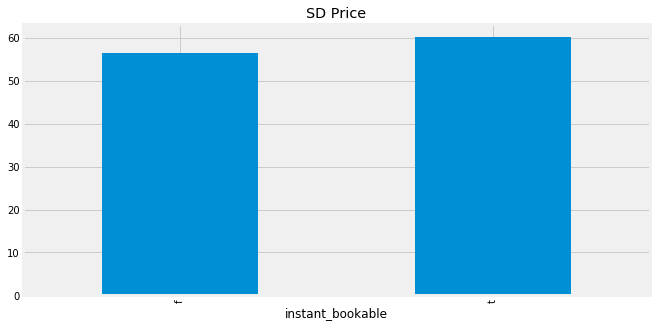

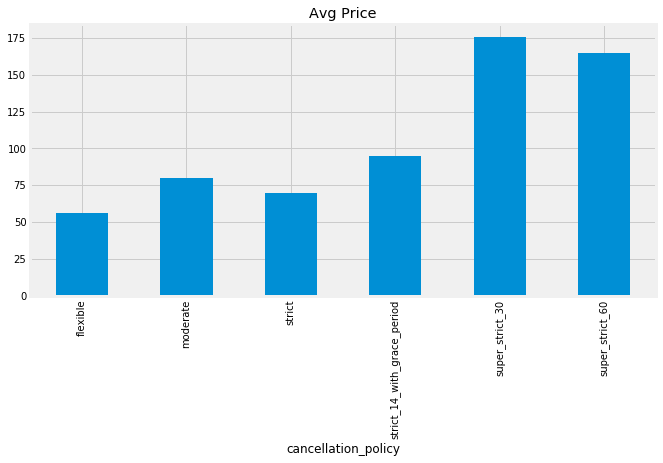

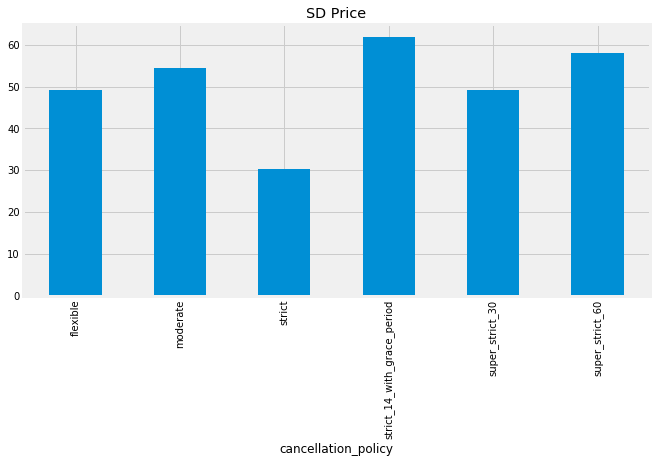

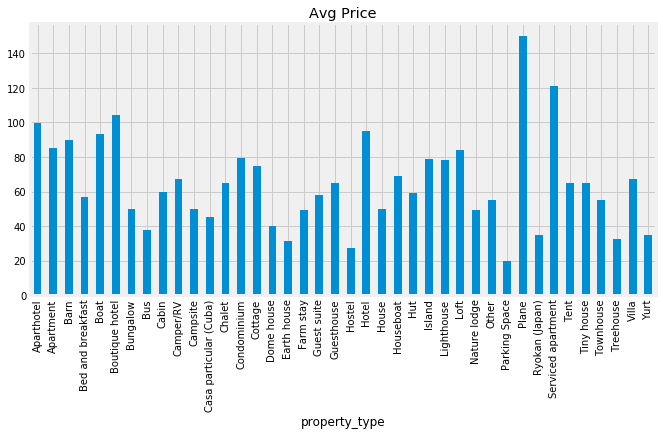

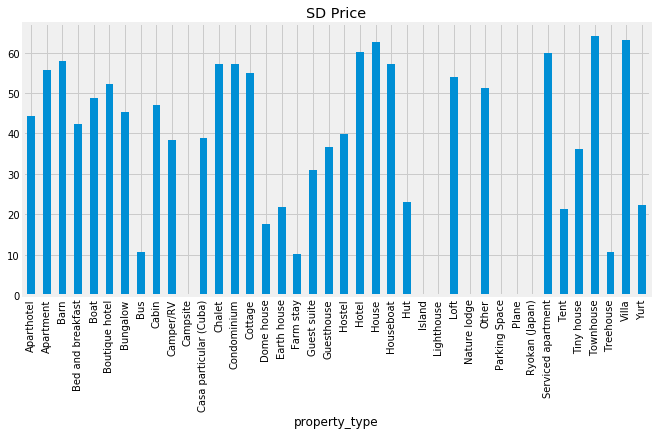

In [21]:
for k in nominal_vars:
    df_trimmed.groupby(k)['price'].median().plot(kind='bar', figsize=(10,5), title='Avg Price')
    plt.show()
    df_trimmed.groupby(k)['price'].std().plot(kind='bar', figsize=(10,5), title='SD Price')
    plt.show()
    

In [22]:
imp_nominal_vars = ['room_type', 'bed_type', 'cancellation_policy', 'property_type', 'host_is_superhost']

##### Scatterplots

In [65]:
numerical_vars = ['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
        'guests_included', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

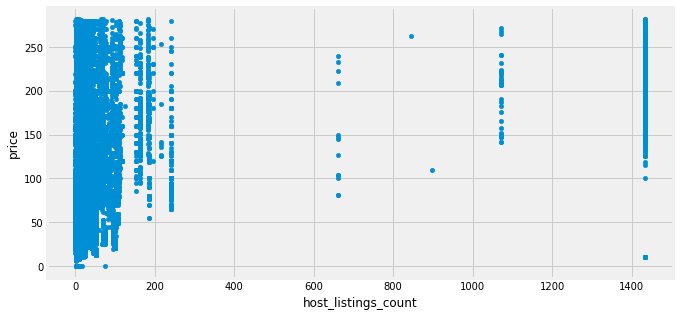

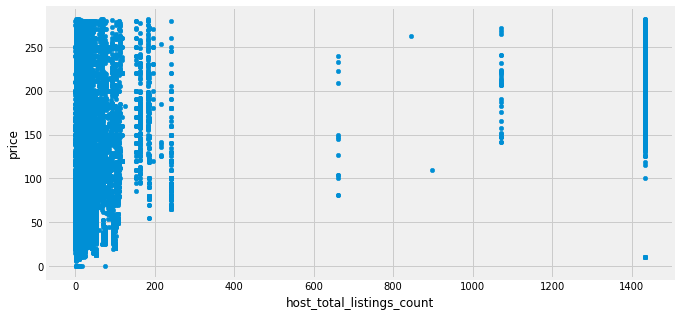

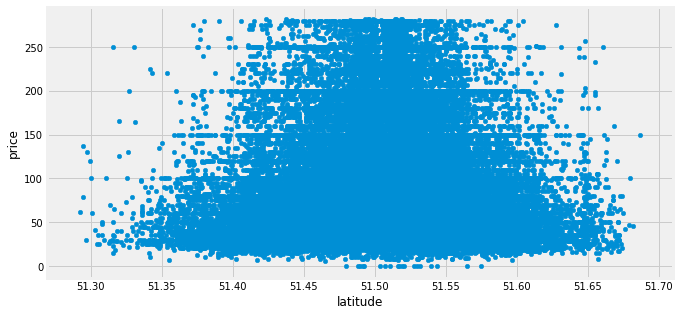

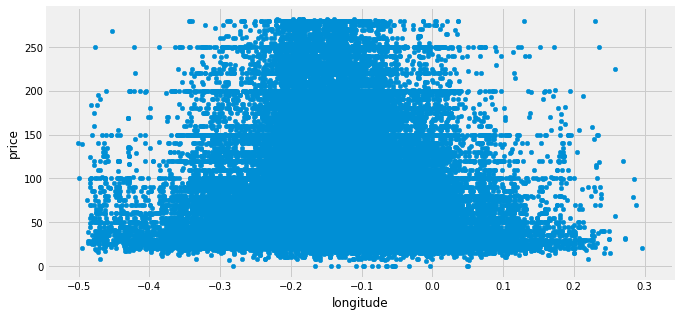

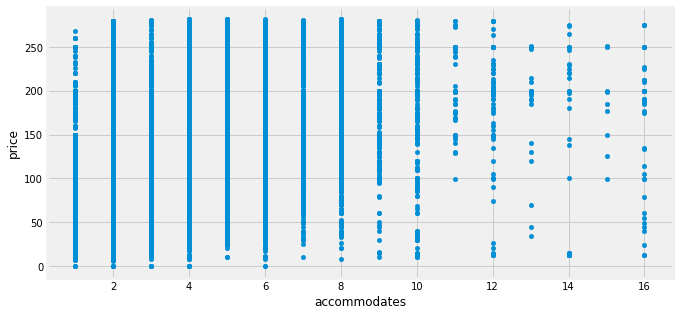

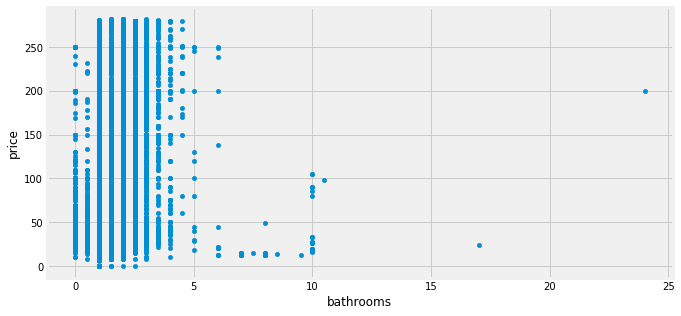

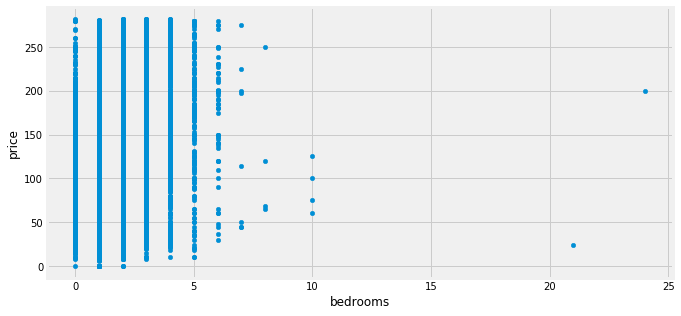

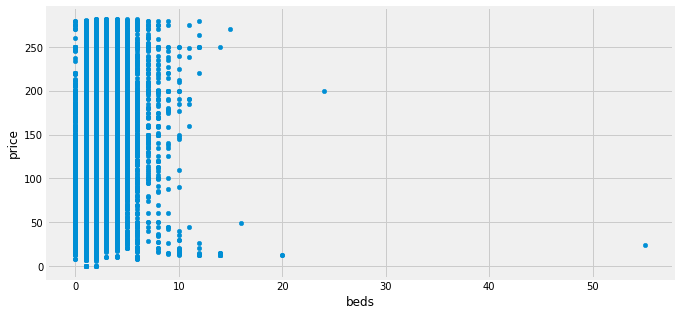

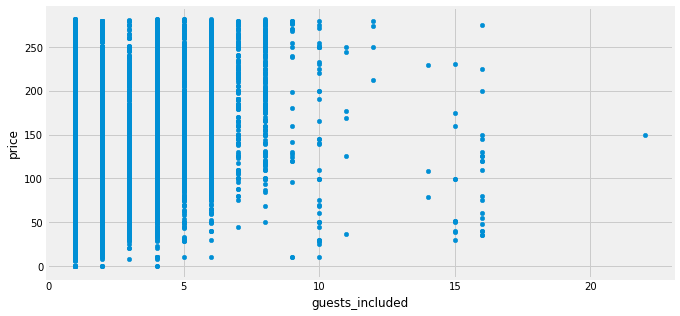

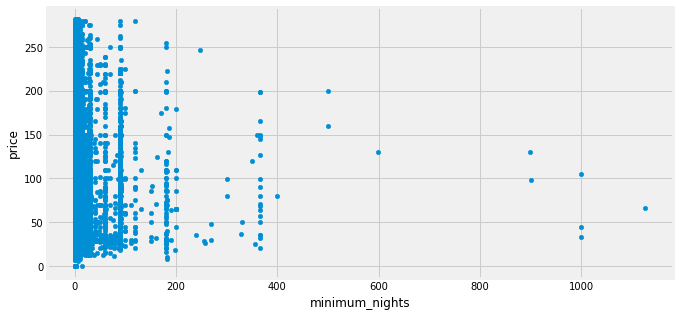

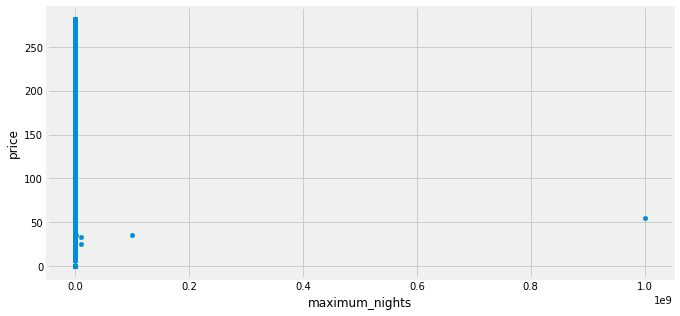

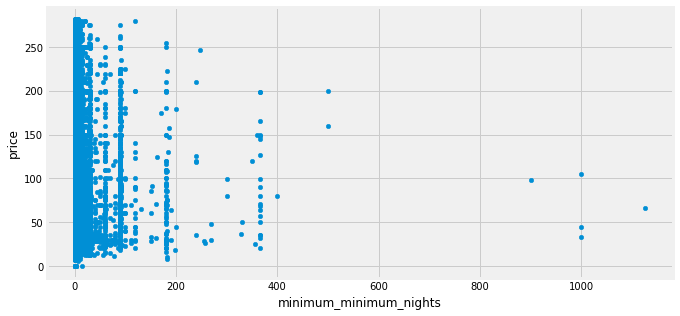

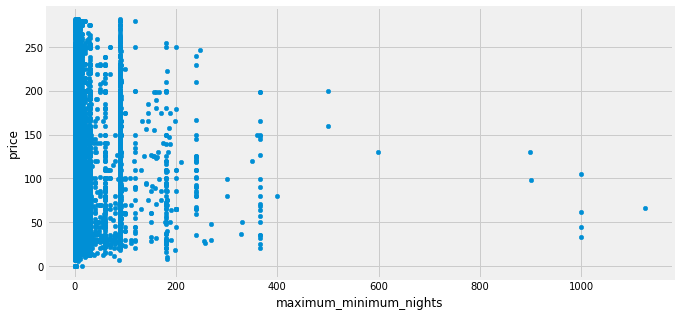

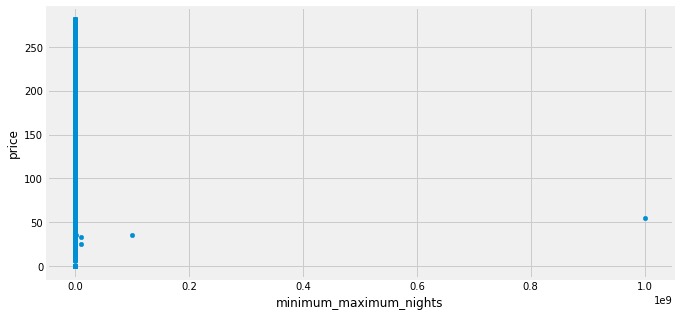

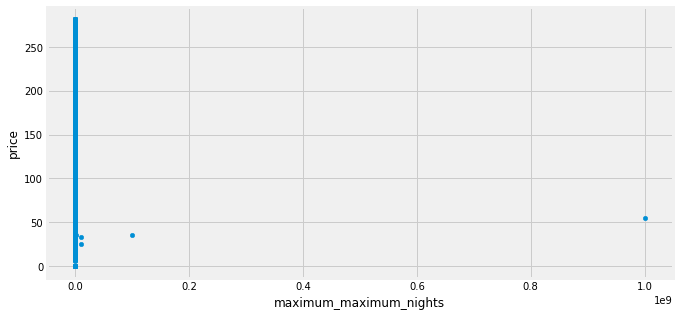

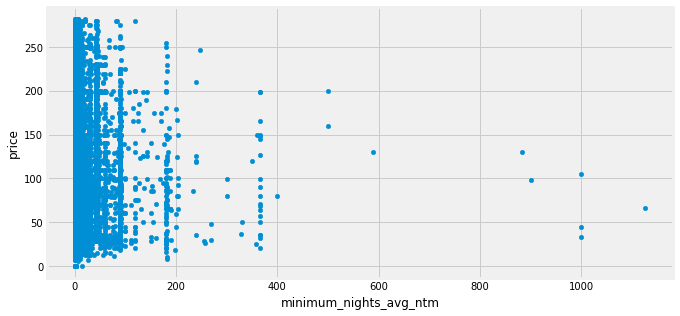

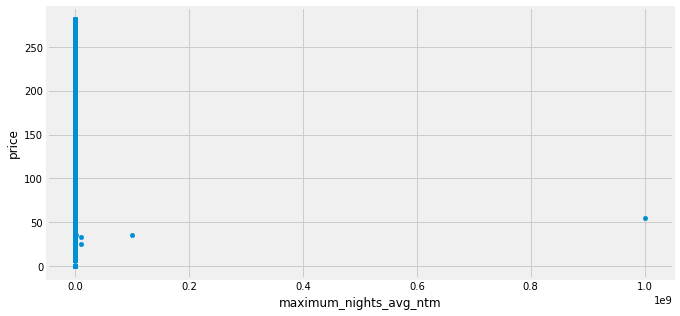

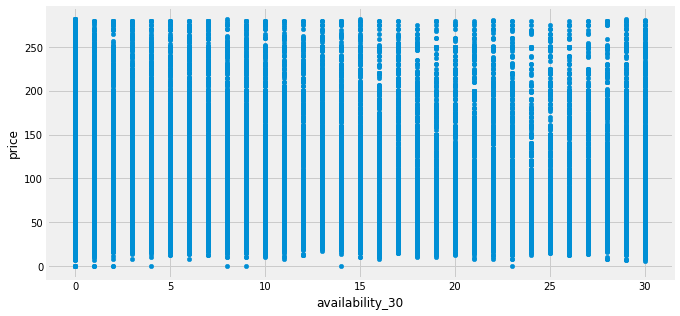

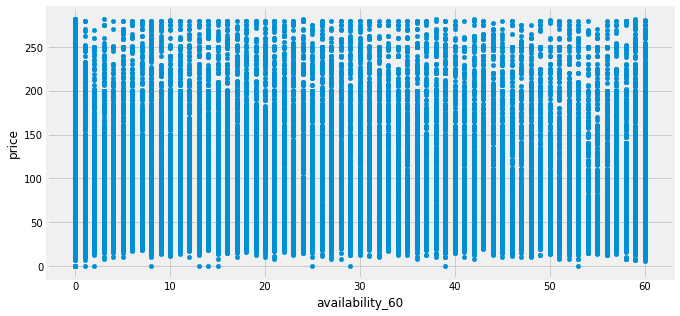

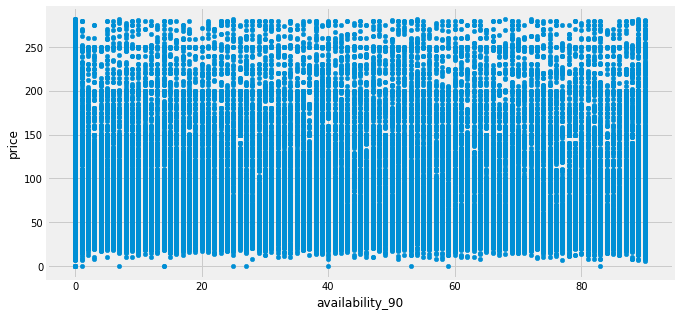

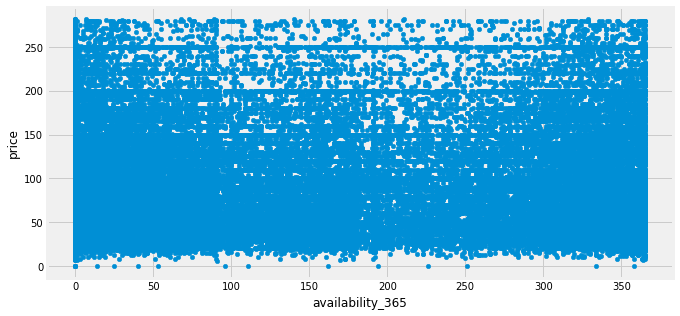

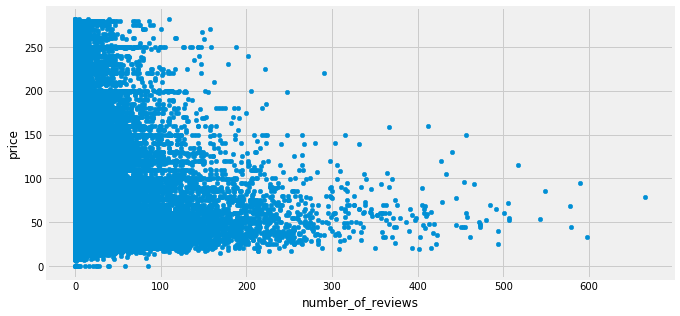

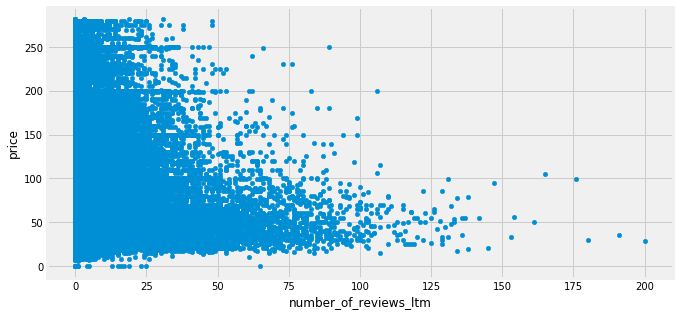

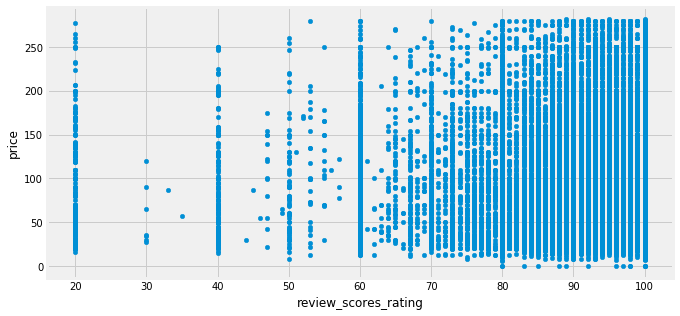

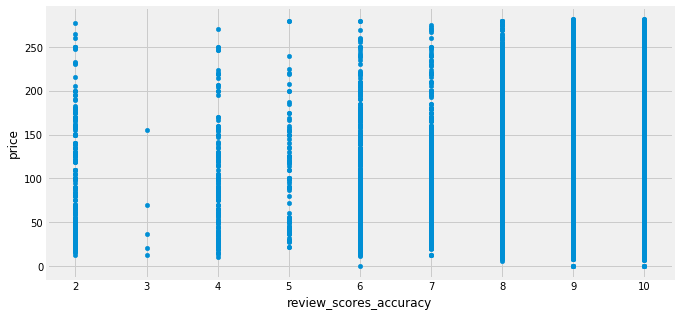

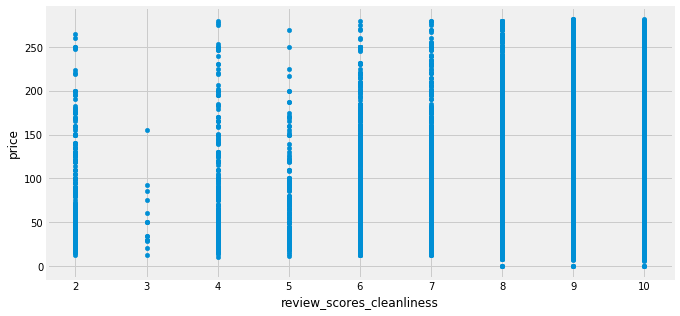

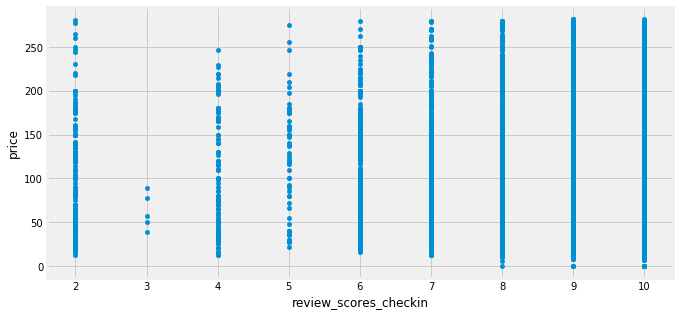

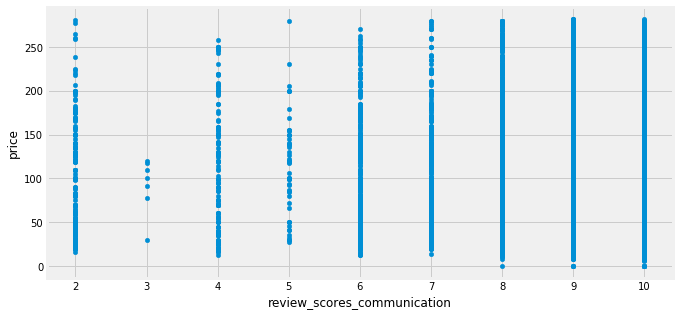

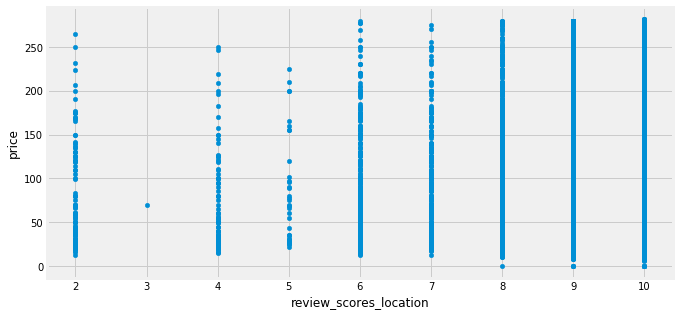

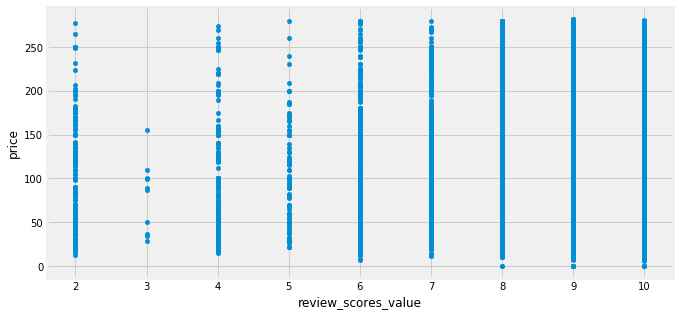

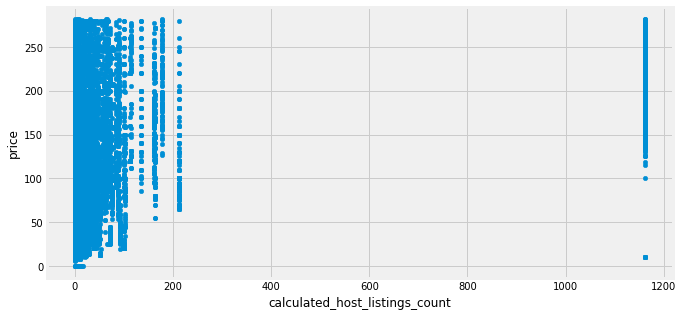

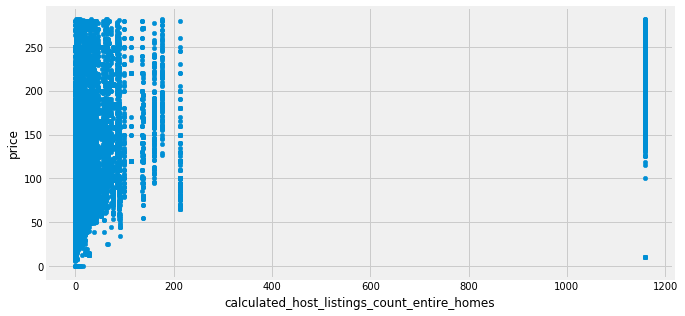

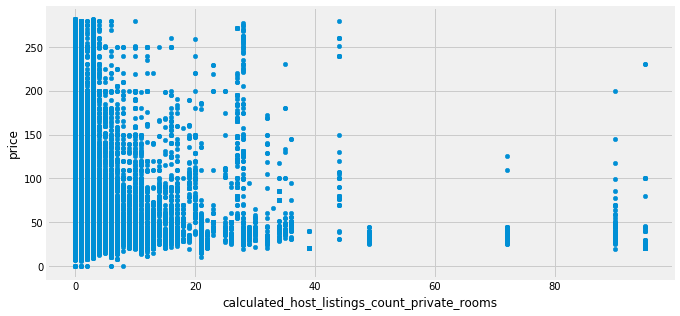

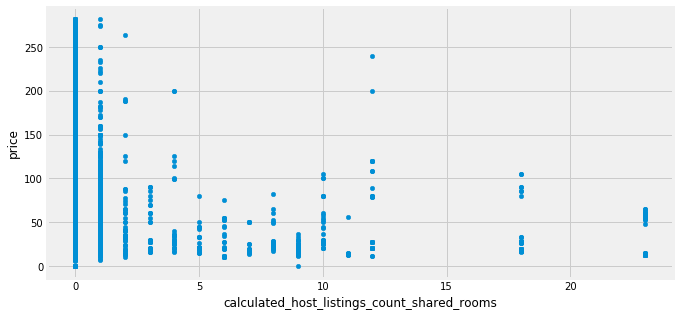

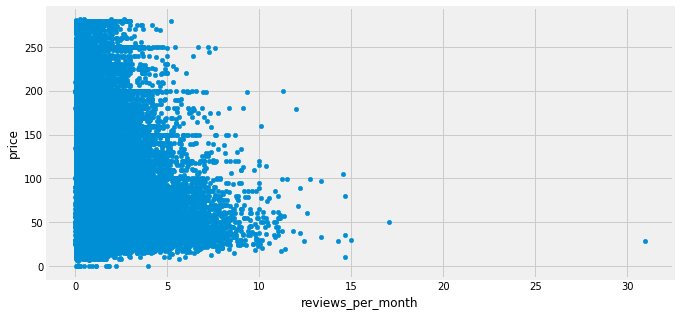

In [24]:
for k in numerical_vars:
    df_trimmed.plot(kind='scatter', x=k, y='price', figsize=(10,5))
    plt.show()

##### Rank Correlation

In [25]:
df_trimmed.corr('spearman')['price'].sort_values(ascending = False)

price                                           1.000000
accommodates                                    0.673495
calculated_host_listings_count_entire_homes     0.646934
cleaning_fee                                    0.616405
beds                                            0.525527
bedrooms                                        0.481761
guests_included                                 0.377786
security_deposit                                0.345847
maximum_minimum_nights                          0.263016
minimum_nights_avg_ntm                          0.234322
amenities                                       0.222672
bathrooms                                       0.205245
host_total_listings_count                       0.184171
host_listings_count                             0.184171
calculated_host_listings_count                  0.176965
minimum_nights                                  0.160171
minimum_minimum_nights                          0.139570
review_scores_location         

## induces new features 

In [26]:
df_trimmed

,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,experiences_offered,host_since,host_response_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,city,property_type,room_type,bed_type,price,security_deposit,cleaning_fee,extra_people,instant_bookable,is_business_travel_ready,cancellation_policy
0,13913,4.0,4.0,51.56802,-0.11121,2,1.0,1.0,0.0,54,1,1,29,1,1,29,29,1.0,29.0,19,42,72,347,16,2,96.0,9.0,10.0,9.0,10.0,9.0,9.0,3,1,2,0,0.15,business,2009-11-16,86%,f,LB of Islington,"['email', 'phone', 'facebook', 'reviews']",t,f,Islington,Apartment,Private room,Real Bed,65.0,100.0,15.0,15.0,f,f,moderate
1,15400,1.0,1.0,51.48796,-0.16898,2,1.0,1.0,1.0,25,2,3,50,3,3,50,50,3.0,50.0,1,9,9,203,85,4,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,1,0,0,0.73,romantic,2009-12-05,100%,t,Chelsea,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,London,Apartment,Entire home/apt,Real Bed,100.0,150.0,50.0,0.0,f,f,strict_14_with_grace_period
3,24328,2.0,2.0,51.47298,-0.16376,2,1.5,1.0,1.0,26,2,30,1125,30,30,1125,1125,30.0,1125.0,1,24,54,329,93,1,98.0,10.0,10.0,10.0,10.0,9.0,9.0,1,1,0,0,0.88,family,2009-09-28,100%,f,Battersea,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,London,Townhouse,Entire home/apt,Real Bed,175.0,250.0,70.0,0.0,f,f,moderate
4,25023,1.0,1.0,51.44687,-0.21874,4,1.0,2.0,2.0,21,2,4,100,4,4,100,100,4.0,100.0,1,2,2,2,28,3,91.0,10.0,9.0,9.0,9.0,9.0,9.0,1,1,0,0,0.69,none,2010-04-03,100%,f,Wimbledon,"['email', 'phone', 'reviews']",t,f,Wimbledon,Apartment,Entire home/apt,Real Bed,65.0,250.0,50.0,11.0,f,f,moderate
5,25123,3.0,3.0,51.57224,-0.20906,2,1.5,1.0,1.0,16,1,10,1120,10,10,1120,1120,10.0,1120.0,0,0,9,222,122,8,95.0,10.0,10.0,10.0,10.0,9.0,10.0,3,0,3,0,1.08,none,2010-04-05,70%,t,LB of Barnet,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Barnet,House,Private room,Real Bed,29.0,100.0,0.0,8.0,t,f,strict_14_with_grace_period
6,26223,5.0,5.0,51.54168,-0.10207,4,1.0,1.0,3.0,33,3,3,365,2,3,365,365,3.0,365.0,20,50,80,355,62,10,85.0,8.0,9.0,9.0,9.0,9.0,8.0,5,5,0,0,0.59,none,2010-04-19,100%,f,Canonbury,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Islington,Apartment,Entire home/apt,Real Bed,147.0,100.0,75.0,15.0,t,f,strict_14_with_grace_period
7,26482,5.0,5.0,51.53883,-0.10153,5,1.0,1.0,1.0,40,3,2,1125,2,2,1125,1125,2.0,1125.0,17,41,67,342,79,12,90.0,9.0,9.0,9.0,10.0,10.0,9.0,5,5,0,0,0.75,none,2010-04-19,100%,f,Canonbury,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Islington,Apartment,Entire home/apt,Real Bed,147.0,100.0,75.0,10.0,t,f,strict_14_with_grace_period
8,31361,2.0,2.0,51.53484,0.02707,2,1.5,1.0,1.0,24,1,1,30,1,1,30,30,1.0,30.0,0,8,38,313,115,11,97.0,10.0,10.0,10.0,10.0,9.0,10.0,1,0,1,0,1.05,none,2010-05-29,100%,t,LB of Newham,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,London,Townhouse,Private room,Real Bed,34.0,NaN,10.0,12.0,f,f,strict_14_with_grace_period
9,33332,1.0,1.0,51.46507,-0.32421,2,1.0,1.0,1.0,13,1,1,21,1,1,21,21,1.0,21.0,29,59,89,364,5,3,88.0,9.0,10.0,10.0,10.0,10.0,8.0,1,0,1,0,0.05,none,2010-06-14,100%,f,LB of Hounslow,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Twickenham,House,Private room,Real Bed,100.0,NaN,NaN,0.0,f,f,flexible
10,34825,1.0,1.0,51.52513,-0.11749,4,1.0,1.0,2.0,11,1,1,365,1,1,365,365,1.0,365.0,24,54,84,359,

## second run

In [27]:
new_features = 'minimum_nights_avg_ntm', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms'

In [54]:
imp_numerical_vars = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
                      'guests_included', 'maximum_minimum_nights', 'amenities',
                     ]

In [55]:
imp_numerical_vars

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'maximum_minimum_nights',
 'amenities']

In [56]:
df_trimmed2 = df_trimmed[imp_numerical_vars + imp_nominal_vars + ['price']]

### Giving all numeric variables


In [67]:
df_trimmed[numerical_vars]  = df_trimmed[numerical_vars].fillna(df_trimmed[numerical_vars].median())

/anaconda3/envs/time_series/lib/python3.7/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


##### one-hot encoding for nominal variable

In [69]:
df_trimmed3 = pd.get_dummies(df_trimmed2,drop_first=True)

##### Modelling of Data

In [68]:
df_trimmed3 = df_trimmed[numerical_vars + imp_nominal_vars + ['price']]

In [70]:
df_trimmed3 = df_trimmed3.dropna().reset_index(drop = True)

In [71]:
y = df_trimmed3['price']
X = df_trimmed3.drop('price', axis=1)

In [72]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
#import lightgbm as lgb

In [61]:
'''X[imp_nominal_vars] = X[imp_nominal_vars].astype('category')
X["room_type"] = X["room_type"].cat.codes
X["room_type"] = X["bed_type"].cat.codes
X["room_type"] = X["cancellation_policy"].cat.codes
X["room_type"] = X["property_type"].cat.codes'''

'X[imp_nominal_vars] = X[imp_nominal_vars].astype(\'category\')\nX["room_type"] = X["room_type"].cat.codes\nX["room_type"] = X["bed_type"].cat.codes\nX["room_type"] = X["cancellation_policy"].cat.codes\nX["room_type"] = X["property_type"].cat.codes'

## LightGBM

In [186]:
n_fold = 5 # amount of data folds
folds = KFold(n_splits=n_fold, shuffle=True, random_state=1)

params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'rmse'},
            'learning_rate': 0.1,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.9,
            'alpha': 0.1, 
            'num_leaves': 70,
            'max_depth': 7,
            'is_training_metric' :True,
            'lambda_l2': 0.1,
            'metric': ['rmse','mape'],
            }
num_round = 5000


scores = []

#prediction = np.zeros(X_test.shape[0])

for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
    
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] # train and validation data splits
    y_train, y_valid = y[train_index], y[valid_index]
    
    train_data = lgb.Dataset(X_train, 
                      label=y_train)
    valid_data = lgb.Dataset(data=X_valid, 
                      label=y_valid)
    
    model = lgb.train(params, train_data, num_round, valid_sets = [train_data, valid_data],  early_stopping_rounds = 100)

    
    score = model.best_score['valid_1']['rmse']
    scores.append(score)

    #y_pred = model.predict(test_cat)
    #prediction += y_pred

#prediction /= n_fold
print('CV mean: {:.4f}, CV std: {:.4f}'.format(np.mean(scores), np.std(scores)))

[1]	training's mape: 0.749185	training's rmse: 54.429	valid_1's mape: 0.769241	valid_1's rmse: 55.2232
Training until validation scores don't improve for 100 rounds.
[2]	training's mape: 0.700216	training's rmse: 51.3698	valid_1's mape: 0.720122	valid_1's rmse: 52.1328
[3]	training's mape: 0.657557	training's rmse: 48.7144	valid_1's mape: 0.677501	valid_1's rmse: 49.4725
[4]	training's mape: 0.619827	training's rmse: 46.4233	valid_1's mape: 0.639547	valid_1's rmse: 47.1761
[5]	training's mape: 0.586414	training's rmse: 44.4126	valid_1's mape: 0.605811	valid_1's rmse: 45.1543
[6]	training's mape: 0.556619	training's rmse: 42.6949	valid_1's mape: 0.576058	valid_1's rmse: 43.4499
[7]	training's mape: 0.530931	training's rmse: 41.2492	valid_1's mape: 0.550519	valid_1's rmse: 42.0029
[8]	training's mape: 0.507367	training's rmse: 39.9411	valid_1's mape: 0.52691	valid_1's rmse: 40.6933
[9]	training's mape: 0.486854	training's rmse: 38.7972	valid_1's mape: 0.505972	valid_1's rmse: 39.57
[10]	

[92]	training's mape: 0.275532	training's rmse: 27.819	valid_1's mape: 0.304032	valid_1's rmse: 30.1601
[93]	training's mape: 0.27534	training's rmse: 27.8022	valid_1's mape: 0.303946	valid_1's rmse: 30.1513
[94]	training's mape: 0.275014	training's rmse: 27.7654	valid_1's mape: 0.303714	valid_1's rmse: 30.128
[95]	training's mape: 0.274823	training's rmse: 27.7518	valid_1's mape: 0.303664	valid_1's rmse: 30.1274
[96]	training's mape: 0.27464	training's rmse: 27.7388	valid_1's mape: 0.303662	valid_1's rmse: 30.1255
[97]	training's mape: 0.274302	training's rmse: 27.7061	valid_1's mape: 0.30344	valid_1's rmse: 30.1079
[98]	training's mape: 0.274028	training's rmse: 27.6833	valid_1's mape: 0.303385	valid_1's rmse: 30.097
[99]	training's mape: 0.273761	training's rmse: 27.6597	valid_1's mape: 0.303231	valid_1's rmse: 30.0811
[100]	training's mape: 0.273547	training's rmse: 27.6424	valid_1's mape: 0.303108	valid_1's rmse: 30.0723
[101]	training's mape: 0.273312	training's rmse: 27.6101	val

[182]	training's mape: 0.258462	training's rmse: 26.0354	valid_1's mape: 0.297502	valid_1's rmse: 29.5265
[183]	training's mape: 0.258222	training's rmse: 26.0143	valid_1's mape: 0.297348	valid_1's rmse: 29.5219
[184]	training's mape: 0.258171	training's rmse: 26.0057	valid_1's mape: 0.297356	valid_1's rmse: 29.5195
[185]	training's mape: 0.258038	training's rmse: 25.9862	valid_1's mape: 0.297361	valid_1's rmse: 29.5133
[186]	training's mape: 0.257982	training's rmse: 25.981	valid_1's mape: 0.297379	valid_1's rmse: 29.51
[187]	training's mape: 0.257721	training's rmse: 25.9585	valid_1's mape: 0.297341	valid_1's rmse: 29.5033
[188]	training's mape: 0.257633	training's rmse: 25.9484	valid_1's mape: 0.297291	valid_1's rmse: 29.5035
[189]	training's mape: 0.257484	training's rmse: 25.9306	valid_1's mape: 0.29725	valid_1's rmse: 29.5006
[190]	training's mape: 0.257313	training's rmse: 25.9161	valid_1's mape: 0.297235	valid_1's rmse: 29.5008
[191]	training's mape: 0.257182	training's rmse: 2

[272]	training's mape: 0.246327	training's rmse: 24.7384	valid_1's mape: 0.294962	valid_1's rmse: 29.2344
[273]	training's mape: 0.246162	training's rmse: 24.7187	valid_1's mape: 0.294929	valid_1's rmse: 29.2363
[274]	training's mape: 0.246002	training's rmse: 24.7055	valid_1's mape: 0.29488	valid_1's rmse: 29.2338
[275]	training's mape: 0.245936	training's rmse: 24.6941	valid_1's mape: 0.294873	valid_1's rmse: 29.2313
[276]	training's mape: 0.245774	training's rmse: 24.6789	valid_1's mape: 0.294858	valid_1's rmse: 29.2327
[277]	training's mape: 0.245693	training's rmse: 24.6658	valid_1's mape: 0.294835	valid_1's rmse: 29.2292
[278]	training's mape: 0.24563	training's rmse: 24.6606	valid_1's mape: 0.294769	valid_1's rmse: 29.2276
[279]	training's mape: 0.2455	training's rmse: 24.6462	valid_1's mape: 0.294744	valid_1's rmse: 29.2268
[280]	training's mape: 0.245395	training's rmse: 24.6384	valid_1's mape: 0.294774	valid_1's rmse: 29.2266
[281]	training's mape: 0.24531	training's rmse: 24

[370]	training's mape: 0.237032	training's rmse: 23.7598	valid_1's mape: 0.294097	valid_1's rmse: 29.1279
[371]	training's mape: 0.237006	training's rmse: 23.7589	valid_1's mape: 0.294077	valid_1's rmse: 29.127
[372]	training's mape: 0.236895	training's rmse: 23.7449	valid_1's mape: 0.294039	valid_1's rmse: 29.1254
[373]	training's mape: 0.236734	training's rmse: 23.7326	valid_1's mape: 0.294013	valid_1's rmse: 29.1253
[374]	training's mape: 0.236632	training's rmse: 23.7185	valid_1's mape: 0.294054	valid_1's rmse: 29.1256
[375]	training's mape: 0.236561	training's rmse: 23.7152	valid_1's mape: 0.29402	valid_1's rmse: 29.1254
[376]	training's mape: 0.236495	training's rmse: 23.7083	valid_1's mape: 0.294026	valid_1's rmse: 29.1259
[377]	training's mape: 0.23639	training's rmse: 23.696	valid_1's mape: 0.294016	valid_1's rmse: 29.1261
[378]	training's mape: 0.236297	training's rmse: 23.6895	valid_1's mape: 0.294002	valid_1's rmse: 29.1275
[379]	training's mape: 0.236254	training's rmse: 2

[469]	training's mape: 0.229012	training's rmse: 22.865	valid_1's mape: 0.293566	valid_1's rmse: 29.0507
[470]	training's mape: 0.228961	training's rmse: 22.859	valid_1's mape: 0.293536	valid_1's rmse: 29.0492
[471]	training's mape: 0.228876	training's rmse: 22.8484	valid_1's mape: 0.29359	valid_1's rmse: 29.0516
[472]	training's mape: 0.228843	training's rmse: 22.8452	valid_1's mape: 0.293568	valid_1's rmse: 29.0492
[473]	training's mape: 0.228779	training's rmse: 22.8386	valid_1's mape: 0.293576	valid_1's rmse: 29.0489
[474]	training's mape: 0.228678	training's rmse: 22.8311	valid_1's mape: 0.293521	valid_1's rmse: 29.0474
[475]	training's mape: 0.228567	training's rmse: 22.8169	valid_1's mape: 0.29348	valid_1's rmse: 29.0506
[476]	training's mape: 0.22846	training's rmse: 22.8051	valid_1's mape: 0.293402	valid_1's rmse: 29.0459
[477]	training's mape: 0.228418	training's rmse: 22.8034	valid_1's mape: 0.293415	valid_1's rmse: 29.046
[478]	training's mape: 0.228326	training's rmse: 22.

[575]	training's mape: 0.22083	training's rmse: 21.9873	valid_1's mape: 0.292473	valid_1's rmse: 28.9826
[576]	training's mape: 0.220725	training's rmse: 21.9752	valid_1's mape: 0.29246	valid_1's rmse: 28.984
[577]	training's mape: 0.220711	training's rmse: 21.9705	valid_1's mape: 0.292461	valid_1's rmse: 28.9822
[578]	training's mape: 0.220661	training's rmse: 21.9645	valid_1's mape: 0.292392	valid_1's rmse: 28.9828
[579]	training's mape: 0.220639	training's rmse: 21.963	valid_1's mape: 0.292387	valid_1's rmse: 28.983
[580]	training's mape: 0.220534	training's rmse: 21.9563	valid_1's mape: 0.292369	valid_1's rmse: 28.9822
[581]	training's mape: 0.220498	training's rmse: 21.9551	valid_1's mape: 0.292362	valid_1's rmse: 28.9821
[582]	training's mape: 0.220446	training's rmse: 21.9482	valid_1's mape: 0.292396	valid_1's rmse: 28.9826
[583]	training's mape: 0.22039	training's rmse: 21.9385	valid_1's mape: 0.292432	valid_1's rmse: 28.9815
[584]	training's mape: 0.220335	training's rmse: 21.

[678]	training's mape: 0.214447	training's rmse: 21.3534	valid_1's mape: 0.292425	valid_1's rmse: 28.968
[679]	training's mape: 0.21438	training's rmse: 21.3466	valid_1's mape: 0.292434	valid_1's rmse: 28.9682
[680]	training's mape: 0.2143	training's rmse: 21.3361	valid_1's mape: 0.292441	valid_1's rmse: 28.9686
[681]	training's mape: 0.214233	training's rmse: 21.3268	valid_1's mape: 0.292444	valid_1's rmse: 28.9683
[682]	training's mape: 0.214187	training's rmse: 21.3196	valid_1's mape: 0.292423	valid_1's rmse: 28.9659
[683]	training's mape: 0.214153	training's rmse: 21.3156	valid_1's mape: 0.29245	valid_1's rmse: 28.9667
[684]	training's mape: 0.21407	training's rmse: 21.3058	valid_1's mape: 0.292469	valid_1's rmse: 28.9674
[685]	training's mape: 0.213997	training's rmse: 21.2968	valid_1's mape: 0.292433	valid_1's rmse: 28.9681
[686]	training's mape: 0.213978	training's rmse: 21.2943	valid_1's mape: 0.292453	valid_1's rmse: 28.9685
[687]	training's mape: 0.213913	training's rmse: 21.

[46]	training's mape: 0.29977	training's rmse: 29.5985	valid_1's mape: 0.306682	valid_1's rmse: 30.4424
[47]	training's mape: 0.298741	training's rmse: 29.5361	valid_1's mape: 0.305894	valid_1's rmse: 30.4092
[48]	training's mape: 0.297997	training's rmse: 29.4816	valid_1's mape: 0.305263	valid_1's rmse: 30.3857
[49]	training's mape: 0.297114	training's rmse: 29.4306	valid_1's mape: 0.304531	valid_1's rmse: 30.3518
[50]	training's mape: 0.29669	training's rmse: 29.4042	valid_1's mape: 0.304126	valid_1's rmse: 30.3321
[51]	training's mape: 0.295984	training's rmse: 29.3489	valid_1's mape: 0.303541	valid_1's rmse: 30.3039
[52]	training's mape: 0.295068	training's rmse: 29.2923	valid_1's mape: 0.302627	valid_1's rmse: 30.2602
[53]	training's mape: 0.294522	training's rmse: 29.2503	valid_1's mape: 0.302351	valid_1's rmse: 30.2468
[54]	training's mape: 0.293961	training's rmse: 29.2033	valid_1's mape: 0.301908	valid_1's rmse: 30.2166
[55]	training's mape: 0.292982	training's rmse: 29.1437	v

[158]	training's mape: 0.265291	training's rmse: 26.5846	valid_1's mape: 0.285094	valid_1's rmse: 29.0454
[159]	training's mape: 0.26511	training's rmse: 26.5603	valid_1's mape: 0.285021	valid_1's rmse: 29.0379
[160]	training's mape: 0.265009	training's rmse: 26.5472	valid_1's mape: 0.285069	valid_1's rmse: 29.0387
[161]	training's mape: 0.26485	training's rmse: 26.5361	valid_1's mape: 0.284997	valid_1's rmse: 29.0352
[162]	training's mape: 0.264779	training's rmse: 26.5301	valid_1's mape: 0.285004	valid_1's rmse: 29.0336
[163]	training's mape: 0.264605	training's rmse: 26.5069	valid_1's mape: 0.284901	valid_1's rmse: 29.0328
[164]	training's mape: 0.264428	training's rmse: 26.4869	valid_1's mape: 0.284922	valid_1's rmse: 29.0271
[165]	training's mape: 0.264346	training's rmse: 26.473	valid_1's mape: 0.284865	valid_1's rmse: 29.0181
[166]	training's mape: 0.26418	training's rmse: 26.4519	valid_1's mape: 0.284792	valid_1's rmse: 29.0126
[167]	training's mape: 0.264007	training's rmse: 2

[238]	training's mape: 0.255865	training's rmse: 25.5618	valid_1's mape: 0.28302	valid_1's rmse: 28.8382
[239]	training's mape: 0.255678	training's rmse: 25.5463	valid_1's mape: 0.28294	valid_1's rmse: 28.832
[240]	training's mape: 0.255647	training's rmse: 25.5443	valid_1's mape: 0.282943	valid_1's rmse: 28.8316
[241]	training's mape: 0.255595	training's rmse: 25.5406	valid_1's mape: 0.282932	valid_1's rmse: 28.8321
[242]	training's mape: 0.255575	training's rmse: 25.5384	valid_1's mape: 0.282957	valid_1's rmse: 28.832
[243]	training's mape: 0.255521	training's rmse: 25.5233	valid_1's mape: 0.282996	valid_1's rmse: 28.8284
[244]	training's mape: 0.255408	training's rmse: 25.5096	valid_1's mape: 0.28297	valid_1's rmse: 28.8238
[245]	training's mape: 0.255213	training's rmse: 25.497	valid_1's mape: 0.282908	valid_1's rmse: 28.8209
[246]	training's mape: 0.255094	training's rmse: 25.4859	valid_1's mape: 0.282901	valid_1's rmse: 28.8195
[247]	training's mape: 0.254965	training's rmse: 25.

[337]	training's mape: 0.244931	training's rmse: 24.4393	valid_1's mape: 0.281192	valid_1's rmse: 28.6264
[338]	training's mape: 0.244827	training's rmse: 24.4271	valid_1's mape: 0.281114	valid_1's rmse: 28.619
[339]	training's mape: 0.244789	training's rmse: 24.4244	valid_1's mape: 0.281132	valid_1's rmse: 28.6199
[340]	training's mape: 0.244696	training's rmse: 24.4125	valid_1's mape: 0.281157	valid_1's rmse: 28.6194
[341]	training's mape: 0.244601	training's rmse: 24.3992	valid_1's mape: 0.281177	valid_1's rmse: 28.6175
[342]	training's mape: 0.24454	training's rmse: 24.3904	valid_1's mape: 0.281159	valid_1's rmse: 28.6169
[343]	training's mape: 0.244469	training's rmse: 24.3821	valid_1's mape: 0.281107	valid_1's rmse: 28.6133
[344]	training's mape: 0.24438	training's rmse: 24.3662	valid_1's mape: 0.281036	valid_1's rmse: 28.6054
[345]	training's mape: 0.244168	training's rmse: 24.3489	valid_1's mape: 0.281014	valid_1's rmse: 28.6023
[346]	training's mape: 0.244035	training's rmse: 

[438]	training's mape: 0.23517	training's rmse: 23.3977	valid_1's mape: 0.280051	valid_1's rmse: 28.4878
[439]	training's mape: 0.235085	training's rmse: 23.3878	valid_1's mape: 0.2801	valid_1's rmse: 28.4892
[440]	training's mape: 0.235058	training's rmse: 23.3851	valid_1's mape: 0.280086	valid_1's rmse: 28.488
[441]	training's mape: 0.234966	training's rmse: 23.3753	valid_1's mape: 0.280058	valid_1's rmse: 28.4827
[442]	training's mape: 0.234902	training's rmse: 23.3685	valid_1's mape: 0.280117	valid_1's rmse: 28.4845
[443]	training's mape: 0.234839	training's rmse: 23.3632	valid_1's mape: 0.280125	valid_1's rmse: 28.4845
[444]	training's mape: 0.234745	training's rmse: 23.3548	valid_1's mape: 0.280127	valid_1's rmse: 28.4838
[445]	training's mape: 0.234627	training's rmse: 23.3442	valid_1's mape: 0.28009	valid_1's rmse: 28.482
[446]	training's mape: 0.234505	training's rmse: 23.3291	valid_1's mape: 0.280111	valid_1's rmse: 28.4857
[447]	training's mape: 0.234486	training's rmse: 23.

[524]	training's mape: 0.227669	training's rmse: 22.6326	valid_1's mape: 0.280576	valid_1's rmse: 28.4721
[525]	training's mape: 0.227571	training's rmse: 22.6213	valid_1's mape: 0.280657	valid_1's rmse: 28.474
[526]	training's mape: 0.227505	training's rmse: 22.6147	valid_1's mape: 0.280648	valid_1's rmse: 28.474
[527]	training's mape: 0.227439	training's rmse: 22.6034	valid_1's mape: 0.280734	valid_1's rmse: 28.4755
[528]	training's mape: 0.227334	training's rmse: 22.5909	valid_1's mape: 0.280691	valid_1's rmse: 28.4746
[529]	training's mape: 0.22722	training's rmse: 22.5779	valid_1's mape: 0.280671	valid_1's rmse: 28.4726
[530]	training's mape: 0.227121	training's rmse: 22.5673	valid_1's mape: 0.280681	valid_1's rmse: 28.4742
[531]	training's mape: 0.227004	training's rmse: 22.5584	valid_1's mape: 0.280641	valid_1's rmse: 28.472
[532]	training's mape: 0.22695	training's rmse: 22.5541	valid_1's mape: 0.280675	valid_1's rmse: 28.4728
[533]	training's mape: 0.226872	training's rmse: 22

[72]	training's mape: 0.281945	training's rmse: 28.4519	valid_1's mape: 0.305936	valid_1's rmse: 30.1159
[73]	training's mape: 0.281666	training's rmse: 28.4278	valid_1's mape: 0.305801	valid_1's rmse: 30.1032
[74]	training's mape: 0.281341	training's rmse: 28.3983	valid_1's mape: 0.305729	valid_1's rmse: 30.0994
[75]	training's mape: 0.281146	training's rmse: 28.3746	valid_1's mape: 0.305617	valid_1's rmse: 30.0863
[76]	training's mape: 0.280635	training's rmse: 28.3303	valid_1's mape: 0.305264	valid_1's rmse: 30.0527
[77]	training's mape: 0.2802	training's rmse: 28.2973	valid_1's mape: 0.305021	valid_1's rmse: 30.0288
[78]	training's mape: 0.279908	training's rmse: 28.2571	valid_1's mape: 0.30485	valid_1's rmse: 30.0075
[79]	training's mape: 0.279418	training's rmse: 28.2046	valid_1's mape: 0.304661	valid_1's rmse: 29.9789
[80]	training's mape: 0.279068	training's rmse: 28.1718	valid_1's mape: 0.304545	valid_1's rmse: 29.9744
[81]	training's mape: 0.278874	training's rmse: 28.1406	va

[171]	training's mape: 0.261611	training's rmse: 26.3986	valid_1's mape: 0.296583	valid_1's rmse: 29.3422
[172]	training's mape: 0.261566	training's rmse: 26.3943	valid_1's mape: 0.296541	valid_1's rmse: 29.3391
[173]	training's mape: 0.261489	training's rmse: 26.383	valid_1's mape: 0.296624	valid_1's rmse: 29.3425
[174]	training's mape: 0.261442	training's rmse: 26.3784	valid_1's mape: 0.296607	valid_1's rmse: 29.3416
[175]	training's mape: 0.261245	training's rmse: 26.3646	valid_1's mape: 0.296515	valid_1's rmse: 29.3377
[176]	training's mape: 0.261078	training's rmse: 26.3407	valid_1's mape: 0.296439	valid_1's rmse: 29.3227
[177]	training's mape: 0.260953	training's rmse: 26.329	valid_1's mape: 0.296402	valid_1's rmse: 29.3225
[178]	training's mape: 0.260852	training's rmse: 26.3187	valid_1's mape: 0.296354	valid_1's rmse: 29.3211
[179]	training's mape: 0.260723	training's rmse: 26.3037	valid_1's mape: 0.296323	valid_1's rmse: 29.3116
[180]	training's mape: 0.260509	training's rmse:

[265]	training's mape: 0.249782	training's rmse: 25.074	valid_1's mape: 0.294301	valid_1's rmse: 29.0279
[266]	training's mape: 0.249676	training's rmse: 25.0602	valid_1's mape: 0.294257	valid_1's rmse: 29.0268
[267]	training's mape: 0.249562	training's rmse: 25.0488	valid_1's mape: 0.294259	valid_1's rmse: 29.0269
[268]	training's mape: 0.249489	training's rmse: 25.0399	valid_1's mape: 0.294219	valid_1's rmse: 29.0253
[269]	training's mape: 0.24939	training's rmse: 25.0253	valid_1's mape: 0.294358	valid_1's rmse: 29.0265
[270]	training's mape: 0.249286	training's rmse: 25.0148	valid_1's mape: 0.294387	valid_1's rmse: 29.0242
[271]	training's mape: 0.249138	training's rmse: 25.0012	valid_1's mape: 0.294364	valid_1's rmse: 29.0219
[272]	training's mape: 0.249065	training's rmse: 24.9898	valid_1's mape: 0.294382	valid_1's rmse: 29.0189
[273]	training's mape: 0.248982	training's rmse: 24.9781	valid_1's mape: 0.294374	valid_1's rmse: 29.0169
[274]	training's mape: 0.248882	training's rmse:

[353]	training's mape: 0.240857	training's rmse: 24.0723	valid_1's mape: 0.293646	valid_1's rmse: 28.9097
[354]	training's mape: 0.240772	training's rmse: 24.0654	valid_1's mape: 0.293616	valid_1's rmse: 28.9093
[355]	training's mape: 0.240704	training's rmse: 24.0596	valid_1's mape: 0.293611	valid_1's rmse: 28.9093
[356]	training's mape: 0.24069	training's rmse: 24.0589	valid_1's mape: 0.293621	valid_1's rmse: 28.9102
[357]	training's mape: 0.240667	training's rmse: 24.0579	valid_1's mape: 0.293623	valid_1's rmse: 28.9102
[358]	training's mape: 0.240605	training's rmse: 24.0495	valid_1's mape: 0.293651	valid_1's rmse: 28.911
[359]	training's mape: 0.240484	training's rmse: 24.0351	valid_1's mape: 0.293635	valid_1's rmse: 28.9111
[360]	training's mape: 0.240391	training's rmse: 24.0243	valid_1's mape: 0.293619	valid_1's rmse: 28.9098
[361]	training's mape: 0.240315	training's rmse: 24.0085	valid_1's mape: 0.293591	valid_1's rmse: 28.9073
[362]	training's mape: 0.240221	training's rmse:

[461]	training's mape: 0.231935	training's rmse: 23.0894	valid_1's mape: 0.2929	valid_1's rmse: 28.8374
[462]	training's mape: 0.231904	training's rmse: 23.088	valid_1's mape: 0.292869	valid_1's rmse: 28.8377
[463]	training's mape: 0.2318	training's rmse: 23.0771	valid_1's mape: 0.292695	valid_1's rmse: 28.8372
[464]	training's mape: 0.231781	training's rmse: 23.0709	valid_1's mape: 0.292734	valid_1's rmse: 28.8385
[465]	training's mape: 0.231705	training's rmse: 23.0635	valid_1's mape: 0.292721	valid_1's rmse: 28.8378
[466]	training's mape: 0.231623	training's rmse: 23.0485	valid_1's mape: 0.292785	valid_1's rmse: 28.8381
[467]	training's mape: 0.231521	training's rmse: 23.0364	valid_1's mape: 0.292839	valid_1's rmse: 28.8393
[468]	training's mape: 0.231403	training's rmse: 23.0241	valid_1's mape: 0.292754	valid_1's rmse: 28.8376
[469]	training's mape: 0.231298	training's rmse: 23.0116	valid_1's mape: 0.29282	valid_1's rmse: 28.8378
[470]	training's mape: 0.231199	training's rmse: 23.

[567]	training's mape: 0.223906	training's rmse: 22.3106	valid_1's mape: 0.292898	valid_1's rmse: 28.8353
[568]	training's mape: 0.2238	training's rmse: 22.3003	valid_1's mape: 0.292875	valid_1's rmse: 28.8337
[569]	training's mape: 0.223738	training's rmse: 22.2896	valid_1's mape: 0.292883	valid_1's rmse: 28.8342
[570]	training's mape: 0.223667	training's rmse: 22.2783	valid_1's mape: 0.292916	valid_1's rmse: 28.836
[571]	training's mape: 0.223586	training's rmse: 22.2711	valid_1's mape: 0.292935	valid_1's rmse: 28.8376
[572]	training's mape: 0.223484	training's rmse: 22.261	valid_1's mape: 0.292905	valid_1's rmse: 28.8372
[573]	training's mape: 0.223449	training's rmse: 22.2568	valid_1's mape: 0.292916	valid_1's rmse: 28.8364
[574]	training's mape: 0.223406	training's rmse: 22.2543	valid_1's mape: 0.292906	valid_1's rmse: 28.8371
[575]	training's mape: 0.223375	training's rmse: 22.2516	valid_1's mape: 0.292878	valid_1's rmse: 28.837
[576]	training's mape: 0.223296	training's rmse: 22

[1]	training's mape: 0.75586	training's rmse: 54.5095	valid_1's mape: 0.740875	valid_1's rmse: 54.8753
Training until validation scores don't improve for 100 rounds.
[2]	training's mape: 0.706816	training's rmse: 51.4417	valid_1's mape: 0.692348	valid_1's rmse: 51.8435
[3]	training's mape: 0.663615	training's rmse: 48.7568	valid_1's mape: 0.64984	valid_1's rmse: 49.2159
[4]	training's mape: 0.625996	training's rmse: 46.4479	valid_1's mape: 0.612435	valid_1's rmse: 46.9538
[5]	training's mape: 0.592496	training's rmse: 44.4348	valid_1's mape: 0.579662	valid_1's rmse: 44.9876
[6]	training's mape: 0.562745	training's rmse: 42.7126	valid_1's mape: 0.550382	valid_1's rmse: 43.3026
[7]	training's mape: 0.537099	training's rmse: 41.2286	valid_1's mape: 0.525336	valid_1's rmse: 41.8604
[8]	training's mape: 0.513428	training's rmse: 39.9168	valid_1's mape: 0.502266	valid_1's rmse: 40.582
[9]	training's mape: 0.492702	training's rmse: 38.7633	valid_1's mape: 0.482156	valid_1's rmse: 39.4665
[10]

[95]	training's mape: 0.279134	training's rmse: 27.6968	valid_1's mape: 0.283436	valid_1's rmse: 30.0501
[96]	training's mape: 0.278806	training's rmse: 27.6654	valid_1's mape: 0.283259	valid_1's rmse: 30.0407
[97]	training's mape: 0.278522	training's rmse: 27.6412	valid_1's mape: 0.283093	valid_1's rmse: 30.0347
[98]	training's mape: 0.278302	training's rmse: 27.6147	valid_1's mape: 0.282975	valid_1's rmse: 30.0236
[99]	training's mape: 0.278085	training's rmse: 27.5956	valid_1's mape: 0.282916	valid_1's rmse: 30.0178
[100]	training's mape: 0.277741	training's rmse: 27.5715	valid_1's mape: 0.28264	valid_1's rmse: 30.0018
[101]	training's mape: 0.277441	training's rmse: 27.5462	valid_1's mape: 0.282457	valid_1's rmse: 29.9915
[102]	training's mape: 0.277198	training's rmse: 27.5177	valid_1's mape: 0.282439	valid_1's rmse: 29.9844
[103]	training's mape: 0.276984	training's rmse: 27.4926	valid_1's mape: 0.282412	valid_1's rmse: 29.9802
[104]	training's mape: 0.276585	training's rmse: 27.

[195]	training's mape: 0.260339	training's rmse: 25.7131	valid_1's mape: 0.275943	valid_1's rmse: 29.4138
[196]	training's mape: 0.260216	training's rmse: 25.6926	valid_1's mape: 0.27593	valid_1's rmse: 29.4083
[197]	training's mape: 0.260102	training's rmse: 25.6809	valid_1's mape: 0.275913	valid_1's rmse: 29.4033
[198]	training's mape: 0.259937	training's rmse: 25.6665	valid_1's mape: 0.275824	valid_1's rmse: 29.3977
[199]	training's mape: 0.259751	training's rmse: 25.6483	valid_1's mape: 0.27568	valid_1's rmse: 29.3955
[200]	training's mape: 0.259603	training's rmse: 25.6379	valid_1's mape: 0.275634	valid_1's rmse: 29.3935
[201]	training's mape: 0.259513	training's rmse: 25.6287	valid_1's mape: 0.275591	valid_1's rmse: 29.3874
[202]	training's mape: 0.25934	training's rmse: 25.6165	valid_1's mape: 0.27552	valid_1's rmse: 29.3854
[203]	training's mape: 0.259237	training's rmse: 25.6075	valid_1's mape: 0.275496	valid_1's rmse: 29.3839
[204]	training's mape: 0.259086	training's rmse: 2

[289]	training's mape: 0.249415	training's rmse: 24.5504	valid_1's mape: 0.273677	valid_1's rmse: 29.1926
[290]	training's mape: 0.249341	training's rmse: 24.5409	valid_1's mape: 0.273669	valid_1's rmse: 29.193
[291]	training's mape: 0.249267	training's rmse: 24.5295	valid_1's mape: 0.273614	valid_1's rmse: 29.1852
[292]	training's mape: 0.249206	training's rmse: 24.518	valid_1's mape: 0.273612	valid_1's rmse: 29.1832
[293]	training's mape: 0.249009	training's rmse: 24.4963	valid_1's mape: 0.273531	valid_1's rmse: 29.1759
[294]	training's mape: 0.248889	training's rmse: 24.4823	valid_1's mape: 0.273474	valid_1's rmse: 29.1731
[295]	training's mape: 0.248741	training's rmse: 24.4695	valid_1's mape: 0.273441	valid_1's rmse: 29.169
[296]	training's mape: 0.248709	training's rmse: 24.4677	valid_1's mape: 0.273452	valid_1's rmse: 29.1702
[297]	training's mape: 0.248522	training's rmse: 24.4526	valid_1's mape: 0.273462	valid_1's rmse: 29.1667
[298]	training's mape: 0.248476	training's rmse: 

[394]	training's mape: 0.2391	training's rmse: 23.4823	valid_1's mape: 0.271953	valid_1's rmse: 29.0315
[395]	training's mape: 0.239078	training's rmse: 23.4804	valid_1's mape: 0.27196	valid_1's rmse: 29.0323
[396]	training's mape: 0.238974	training's rmse: 23.4681	valid_1's mape: 0.271944	valid_1's rmse: 29.0301
[397]	training's mape: 0.238951	training's rmse: 23.4653	valid_1's mape: 0.271931	valid_1's rmse: 29.029
[398]	training's mape: 0.238884	training's rmse: 23.4536	valid_1's mape: 0.271937	valid_1's rmse: 29.0253
[399]	training's mape: 0.238874	training's rmse: 23.4513	valid_1's mape: 0.271927	valid_1's rmse: 29.0249
[400]	training's mape: 0.238763	training's rmse: 23.4444	valid_1's mape: 0.271887	valid_1's rmse: 29.0229
[401]	training's mape: 0.238713	training's rmse: 23.4371	valid_1's mape: 0.271958	valid_1's rmse: 29.0269
[402]	training's mape: 0.238619	training's rmse: 23.4258	valid_1's mape: 0.271984	valid_1's rmse: 29.0275
[403]	training's mape: 0.238588	training's rmse: 2

[481]	training's mape: 0.232344	training's rmse: 22.778	valid_1's mape: 0.271313	valid_1's rmse: 28.9512
[482]	training's mape: 0.232246	training's rmse: 22.7652	valid_1's mape: 0.271301	valid_1's rmse: 28.9519
[483]	training's mape: 0.232154	training's rmse: 22.7558	valid_1's mape: 0.2713	valid_1's rmse: 28.956
[484]	training's mape: 0.232058	training's rmse: 22.7458	valid_1's mape: 0.271276	valid_1's rmse: 28.9562
[485]	training's mape: 0.232027	training's rmse: 22.7418	valid_1's mape: 0.271254	valid_1's rmse: 28.9531
[486]	training's mape: 0.231949	training's rmse: 22.7374	valid_1's mape: 0.271277	valid_1's rmse: 28.953
[487]	training's mape: 0.231866	training's rmse: 22.7278	valid_1's mape: 0.27126	valid_1's rmse: 28.9516
[488]	training's mape: 0.23181	training's rmse: 22.7227	valid_1's mape: 0.27125	valid_1's rmse: 28.9496
[489]	training's mape: 0.23179	training's rmse: 22.7201	valid_1's mape: 0.271265	valid_1's rmse: 28.9495
[490]	training's mape: 0.231685	training's rmse: 22.708

[577]	training's mape: 0.224635	training's rmse: 21.9773	valid_1's mape: 0.271011	valid_1's rmse: 28.9066
[578]	training's mape: 0.224602	training's rmse: 21.976	valid_1's mape: 0.271024	valid_1's rmse: 28.9066
[579]	training's mape: 0.224491	training's rmse: 21.9653	valid_1's mape: 0.271066	valid_1's rmse: 28.9091
[580]	training's mape: 0.224417	training's rmse: 21.9556	valid_1's mape: 0.271094	valid_1's rmse: 28.9095
[581]	training's mape: 0.224349	training's rmse: 21.9481	valid_1's mape: 0.271097	valid_1's rmse: 28.9105
[582]	training's mape: 0.224283	training's rmse: 21.9427	valid_1's mape: 0.271057	valid_1's rmse: 28.9075
[583]	training's mape: 0.224225	training's rmse: 21.9368	valid_1's mape: 0.271049	valid_1's rmse: 28.9076
[584]	training's mape: 0.224089	training's rmse: 21.9248	valid_1's mape: 0.270961	valid_1's rmse: 28.9052
[585]	training's mape: 0.224016	training's rmse: 21.9169	valid_1's mape: 0.270941	valid_1's rmse: 28.9044
[586]	training's mape: 0.223954	training's rmse

[673]	training's mape: 0.218066	training's rmse: 21.3375	valid_1's mape: 0.271374	valid_1's rmse: 28.8922
[674]	training's mape: 0.217984	training's rmse: 21.3319	valid_1's mape: 0.271406	valid_1's rmse: 28.8919
[675]	training's mape: 0.217911	training's rmse: 21.3275	valid_1's mape: 0.271389	valid_1's rmse: 28.8915
[676]	training's mape: 0.217846	training's rmse: 21.3211	valid_1's mape: 0.271372	valid_1's rmse: 28.8908
[677]	training's mape: 0.217808	training's rmse: 21.3157	valid_1's mape: 0.271356	valid_1's rmse: 28.8906
[678]	training's mape: 0.217783	training's rmse: 21.3129	valid_1's mape: 0.271349	valid_1's rmse: 28.8901
[679]	training's mape: 0.217759	training's rmse: 21.3095	valid_1's mape: 0.271341	valid_1's rmse: 28.8882
[680]	training's mape: 0.217738	training's rmse: 21.308	valid_1's mape: 0.271328	valid_1's rmse: 28.8877
[681]	training's mape: 0.217714	training's rmse: 21.3055	valid_1's mape: 0.271323	valid_1's rmse: 28.8874
[682]	training's mape: 0.21769	training's rmse:

[70]	training's mape: 0.284153	training's rmse: 28.4657	valid_1's mape: 0.296213	valid_1's rmse: 30.2627
[71]	training's mape: 0.283661	training's rmse: 28.4207	valid_1's mape: 0.296099	valid_1's rmse: 30.2445
[72]	training's mape: 0.283298	training's rmse: 28.386	valid_1's mape: 0.295969	valid_1's rmse: 30.2394
[73]	training's mape: 0.282855	training's rmse: 28.3484	valid_1's mape: 0.295682	valid_1's rmse: 30.2133
[74]	training's mape: 0.28241	training's rmse: 28.3072	valid_1's mape: 0.295319	valid_1's rmse: 30.1835
[75]	training's mape: 0.282105	training's rmse: 28.2757	valid_1's mape: 0.295119	valid_1's rmse: 30.1627
[76]	training's mape: 0.281687	training's rmse: 28.239	valid_1's mape: 0.294906	valid_1's rmse: 30.1357
[77]	training's mape: 0.281531	training's rmse: 28.2211	valid_1's mape: 0.29485	valid_1's rmse: 30.1241
[78]	training's mape: 0.281012	training's rmse: 28.17	valid_1's mape: 0.294504	valid_1's rmse: 30.0942
[79]	training's mape: 0.280697	training's rmse: 28.1419	valid

[165]	training's mape: 0.263235	training's rmse: 26.3472	valid_1's mape: 0.286563	valid_1's rmse: 29.4042
[166]	training's mape: 0.263002	training's rmse: 26.3188	valid_1's mape: 0.286539	valid_1's rmse: 29.3994
[167]	training's mape: 0.26277	training's rmse: 26.297	valid_1's mape: 0.286464	valid_1's rmse: 29.3935
[168]	training's mape: 0.26265	training's rmse: 26.2845	valid_1's mape: 0.286411	valid_1's rmse: 29.3898
[169]	training's mape: 0.262409	training's rmse: 26.2567	valid_1's mape: 0.286265	valid_1's rmse: 29.3791
[170]	training's mape: 0.262229	training's rmse: 26.2382	valid_1's mape: 0.286238	valid_1's rmse: 29.3767
[171]	training's mape: 0.262032	training's rmse: 26.2156	valid_1's mape: 0.286182	valid_1's rmse: 29.3707
[172]	training's mape: 0.261885	training's rmse: 26.2001	valid_1's mape: 0.286085	valid_1's rmse: 29.3556
[173]	training's mape: 0.261716	training's rmse: 26.1883	valid_1's mape: 0.286007	valid_1's rmse: 29.3533
[174]	training's mape: 0.2616	training's rmse: 26

[257]	training's mape: 0.250637	training's rmse: 24.9933	valid_1's mape: 0.283768	valid_1's rmse: 29.0948
[258]	training's mape: 0.250518	training's rmse: 24.974	valid_1's mape: 0.283801	valid_1's rmse: 29.0938
[259]	training's mape: 0.250401	training's rmse: 24.967	valid_1's mape: 0.283762	valid_1's rmse: 29.0897
[260]	training's mape: 0.250296	training's rmse: 24.9574	valid_1's mape: 0.28374	valid_1's rmse: 29.089
[261]	training's mape: 0.250156	training's rmse: 24.9404	valid_1's mape: 0.283718	valid_1's rmse: 29.0878
[262]	training's mape: 0.250072	training's rmse: 24.9354	valid_1's mape: 0.283711	valid_1's rmse: 29.087
[263]	training's mape: 0.250051	training's rmse: 24.932	valid_1's mape: 0.283713	valid_1's rmse: 29.0877
[264]	training's mape: 0.24997	training's rmse: 24.9246	valid_1's mape: 0.283718	valid_1's rmse: 29.0867
[265]	training's mape: 0.249815	training's rmse: 24.9123	valid_1's mape: 0.283693	valid_1's rmse: 29.0861
[266]	training's mape: 0.249715	training's rmse: 24.8

[361]	training's mape: 0.240977	training's rmse: 23.9703	valid_1's mape: 0.282638	valid_1's rmse: 28.9748
[362]	training's mape: 0.240865	training's rmse: 23.9582	valid_1's mape: 0.282654	valid_1's rmse: 28.9747
[363]	training's mape: 0.240816	training's rmse: 23.9523	valid_1's mape: 0.282682	valid_1's rmse: 28.9741
[364]	training's mape: 0.240747	training's rmse: 23.9385	valid_1's mape: 0.282719	valid_1's rmse: 28.9744
[365]	training's mape: 0.240713	training's rmse: 23.9335	valid_1's mape: 0.282717	valid_1's rmse: 28.9734
[366]	training's mape: 0.240613	training's rmse: 23.9224	valid_1's mape: 0.282721	valid_1's rmse: 28.9754
[367]	training's mape: 0.240468	training's rmse: 23.9091	valid_1's mape: 0.282739	valid_1's rmse: 28.9741
[368]	training's mape: 0.24038	training's rmse: 23.8965	valid_1's mape: 0.282727	valid_1's rmse: 28.9705
[369]	training's mape: 0.240319	training's rmse: 23.889	valid_1's mape: 0.282737	valid_1's rmse: 28.9721
[370]	training's mape: 0.240167	training's rmse:

[447]	training's mape: 0.233959	training's rmse: 23.2032	valid_1's mape: 0.282694	valid_1's rmse: 28.9189
[448]	training's mape: 0.233825	training's rmse: 23.1903	valid_1's mape: 0.282675	valid_1's rmse: 28.9174
[449]	training's mape: 0.23375	training's rmse: 23.1788	valid_1's mape: 0.2827	valid_1's rmse: 28.9177
[450]	training's mape: 0.233671	training's rmse: 23.1698	valid_1's mape: 0.282712	valid_1's rmse: 28.9157
[451]	training's mape: 0.23356	training's rmse: 23.1535	valid_1's mape: 0.282734	valid_1's rmse: 28.9077
[452]	training's mape: 0.233501	training's rmse: 23.1483	valid_1's mape: 0.282708	valid_1's rmse: 28.9074
[453]	training's mape: 0.233443	training's rmse: 23.1392	valid_1's mape: 0.282717	valid_1's rmse: 28.903
[454]	training's mape: 0.233353	training's rmse: 23.1311	valid_1's mape: 0.28271	valid_1's rmse: 28.9048
[455]	training's mape: 0.233275	training's rmse: 23.1211	valid_1's mape: 0.28272	valid_1's rmse: 28.9038
[456]	training's mape: 0.233256	training's rmse: 23.1

[28.970429508918492,
 28.48775691474403,
 28.831625340424754,
 28.892253089646697,
 28.937834522726686]

## all numeric features

## score

In [187]:
scores

[28.970429508918492,
 28.48775691474403,
 28.831625340424754,
 28.892253089646697,
 28.937834522726686]

## second run

In [49]:
scores

[33.69939486361228,
 34.6124167519045,
 34.37886566113405,
 34.46811210820956,
 34.037210731534046]

## first run

In [35]:
scores

[36.5017013778882,
 37.222215871172175,
 37.01079327298493,
 37.01218962128439,
 36.83444307702075]

## Important Features

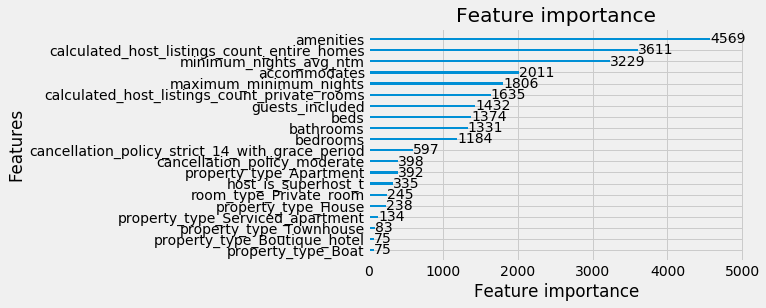

In [177]:
lgb.plot_importance(model, max_num_features = 20)

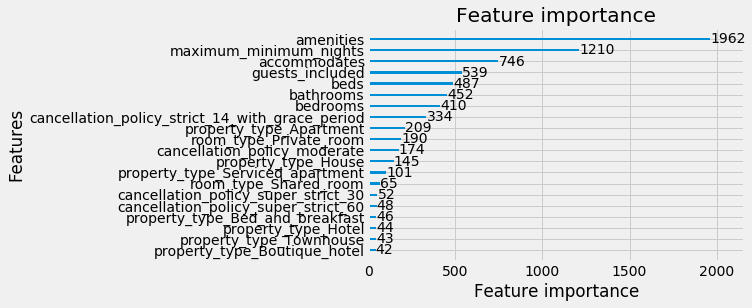

In [262]:
lgb.plot_importance(model, max_num_features = 20)

## all numeric features

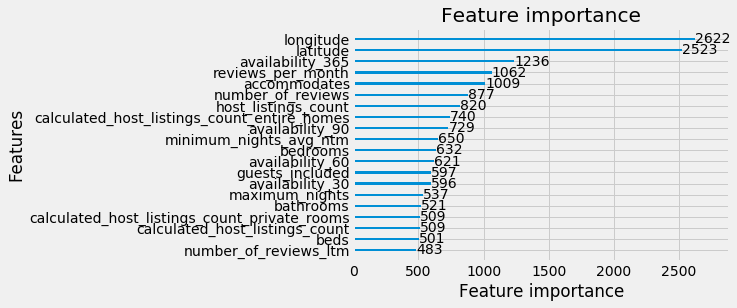

In [188]:
lgb.plot_importance(model, max_num_features = 20)

In [56]:
model.best_score

defaultdict(dict,
            {'training': {'mape': 0.34267333723967053,
              'rmse': 26.390852511431223},
             'valid_1': {'mape': 0.3493347391007157,
              'rmse': 26.891681798630646}})

## XGboost

In [37]:
import xgboost as xgb

In [73]:
n_fold = 5 # amount of data folds
folds = KFold(n_splits=n_fold, shuffle=True, random_state=1)



# Some default params

params = {
    'max_depth':6,
    'silent' : 1,
    'min_child_weight': 5,
    'eval_metric': 'rmse',
    'eta': .01,
    'subsample': 1,
    'colsample_bytree': 1,
    'silent': 1,
    'objective':'gpu:reg:linear',
}

params['eval_metric'] = "rmse"
num_boost_round = 9999


scores = []

#prediction = np.zeros(X_test.shape[0])

for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
    
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] # train and validation data splits
    y_train, y_valid = y[train_index], y[valid_index]
    
    # Coverting the dataset to matrix form for XGBoost Model

    dtrain = xgb.DMatrix(X_train, label = y_train)
    dtest = xgb.DMatrix(X_valid, label = y_valid)
    
    model = xgb.train(params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtrain, 'train'), ( dtest, "Test")],
    early_stopping_rounds=20)

    
    score = model.best_score
    scores.append(score)

    #y_pred = model.predict(test_cat)
    #prediction += y_pred

#prediction /= n_fold
print('CV mean: {:.4f}, CV std: {:.4f}'.format(np.mean(scores), np.std(scores)))

[0]	train-rmse:106.556	Test-rmse:107.21
Multiple eval metrics have been passed: 'Test-rmse' will be used for early stopping.

Will train until Test-rmse hasn't improved in 20 rounds.
[1]	train-rmse:105.615	Test-rmse:106.269
[2]	train-rmse:104.685	Test-rmse:105.338
[3]	train-rmse:103.765	Test-rmse:104.417
[4]	train-rmse:102.855	Test-rmse:103.506
[5]	train-rmse:101.956	Test-rmse:102.606
[6]	train-rmse:101.066	Test-rmse:101.715
[7]	train-rmse:100.186	Test-rmse:100.835
[8]	train-rmse:99.3158	Test-rmse:99.964
[9]	train-rmse:98.4559	Test-rmse:99.103
[10]	train-rmse:97.6052	Test-rmse:98.2511
[11]	train-rmse:96.7641	Test-rmse:97.4087
[12]	train-rmse:95.9328	Test-rmse:96.577
[13]	train-rmse:95.1107	Test-rmse:95.7543
[14]	train-rmse:94.2979	Test-rmse:94.9422
[15]	train-rmse:93.4947	Test-rmse:94.1376
[16]	train-rmse:92.7003	Test-rmse:93.343
[17]	train-rmse:91.9149	Test-rmse:92.5565
[18]	train-rmse:91.1379	Test-rmse:91.7802
[19]	train-rmse:90.37	Test-rmse:91.0133
[20]	train-rmse:89.611	Test-rmse:9

[191]	train-rmse:36.1879	Test-rmse:37.1253
[192]	train-rmse:36.1105	Test-rmse:37.0504
[193]	train-rmse:36.0334	Test-rmse:36.9751
[194]	train-rmse:35.9578	Test-rmse:36.9027
[195]	train-rmse:35.8844	Test-rmse:36.8307
[196]	train-rmse:35.8106	Test-rmse:36.7597
[197]	train-rmse:35.74	Test-rmse:36.6924
[198]	train-rmse:35.6711	Test-rmse:36.6258
[199]	train-rmse:35.6001	Test-rmse:36.5579
[200]	train-rmse:35.5328	Test-rmse:36.4925
[201]	train-rmse:35.4636	Test-rmse:36.4273
[202]	train-rmse:35.3969	Test-rmse:36.3638
[203]	train-rmse:35.331	Test-rmse:36.3004
[204]	train-rmse:35.2672	Test-rmse:36.2391
[205]	train-rmse:35.2	Test-rmse:36.1754
[206]	train-rmse:35.1388	Test-rmse:36.1169
[207]	train-rmse:35.0768	Test-rmse:36.0572
[208]	train-rmse:35.0145	Test-rmse:35.998
[209]	train-rmse:34.9541	Test-rmse:35.9405
[210]	train-rmse:34.8959	Test-rmse:35.8837
[211]	train-rmse:34.8377	Test-rmse:35.8275
[212]	train-rmse:34.7803	Test-rmse:35.7733
[213]	train-rmse:34.7245	Test-rmse:35.7203
[214]	train-rmse:3

[383]	train-rmse:30.6795	Test-rmse:32.0374
[384]	train-rmse:30.6721	Test-rmse:32.031
[385]	train-rmse:30.6601	Test-rmse:32.0208
[386]	train-rmse:30.6519	Test-rmse:32.0139
[387]	train-rmse:30.6438	Test-rmse:32.0081
[388]	train-rmse:30.63	Test-rmse:31.9961
[389]	train-rmse:30.6225	Test-rmse:31.9897
[390]	train-rmse:30.6089	Test-rmse:31.9788
[391]	train-rmse:30.6	Test-rmse:31.9728
[392]	train-rmse:30.5887	Test-rmse:31.9627
[393]	train-rmse:30.58	Test-rmse:31.9564
[394]	train-rmse:30.5724	Test-rmse:31.9499
[395]	train-rmse:30.5635	Test-rmse:31.9431
[396]	train-rmse:30.5568	Test-rmse:31.9382
[397]	train-rmse:30.5438	Test-rmse:31.9275
[398]	train-rmse:30.5369	Test-rmse:31.9217
[399]	train-rmse:30.5242	Test-rmse:31.9116
[400]	train-rmse:30.5161	Test-rmse:31.9056
[401]	train-rmse:30.5037	Test-rmse:31.8955
[402]	train-rmse:30.4956	Test-rmse:31.8905
[403]	train-rmse:30.4883	Test-rmse:31.8846
[404]	train-rmse:30.4806	Test-rmse:31.8797
[405]	train-rmse:30.4741	Test-rmse:31.8748
[406]	train-rmse:30

[575]	train-rmse:29.483	Test-rmse:31.1277
[576]	train-rmse:29.4795	Test-rmse:31.1258
[577]	train-rmse:29.4757	Test-rmse:31.1238
[578]	train-rmse:29.4714	Test-rmse:31.1209
[579]	train-rmse:29.468	Test-rmse:31.1191
[580]	train-rmse:29.4633	Test-rmse:31.1151
[581]	train-rmse:29.4586	Test-rmse:31.1117
[582]	train-rmse:29.4543	Test-rmse:31.1085
[583]	train-rmse:29.4502	Test-rmse:31.1051
[584]	train-rmse:29.4469	Test-rmse:31.1035
[585]	train-rmse:29.4415	Test-rmse:31.0992
[586]	train-rmse:29.4376	Test-rmse:31.0969
[587]	train-rmse:29.4342	Test-rmse:31.0952
[588]	train-rmse:29.4299	Test-rmse:31.092
[589]	train-rmse:29.4252	Test-rmse:31.0888
[590]	train-rmse:29.422	Test-rmse:31.0862
[591]	train-rmse:29.4189	Test-rmse:31.0836
[592]	train-rmse:29.4151	Test-rmse:31.0816
[593]	train-rmse:29.4125	Test-rmse:31.08
[594]	train-rmse:29.4075	Test-rmse:31.0762
[595]	train-rmse:29.4037	Test-rmse:31.0743
[596]	train-rmse:29.4003	Test-rmse:31.0722
[597]	train-rmse:29.3951	Test-rmse:31.0683
[598]	train-rmse:

[767]	train-rmse:28.8379	Test-rmse:30.7057
[768]	train-rmse:28.8354	Test-rmse:30.704
[769]	train-rmse:28.8328	Test-rmse:30.7018
[770]	train-rmse:28.8294	Test-rmse:30.699
[771]	train-rmse:28.8269	Test-rmse:30.6975
[772]	train-rmse:28.8253	Test-rmse:30.6971
[773]	train-rmse:28.8225	Test-rmse:30.6953
[774]	train-rmse:28.8205	Test-rmse:30.6942
[775]	train-rmse:28.8176	Test-rmse:30.6928
[776]	train-rmse:28.8151	Test-rmse:30.6913
[777]	train-rmse:28.8127	Test-rmse:30.6897
[778]	train-rmse:28.807	Test-rmse:30.6856
[779]	train-rmse:28.8051	Test-rmse:30.6846
[780]	train-rmse:28.8009	Test-rmse:30.6818
[781]	train-rmse:28.7978	Test-rmse:30.6795
[782]	train-rmse:28.7961	Test-rmse:30.6787
[783]	train-rmse:28.7938	Test-rmse:30.6774
[784]	train-rmse:28.7914	Test-rmse:30.6758
[785]	train-rmse:28.7889	Test-rmse:30.6745
[786]	train-rmse:28.7853	Test-rmse:30.672
[787]	train-rmse:28.7821	Test-rmse:30.6704
[788]	train-rmse:28.7803	Test-rmse:30.6691
[789]	train-rmse:28.7779	Test-rmse:30.6677
[790]	train-rms

[959]	train-rmse:28.3768	Test-rmse:30.4365
[960]	train-rmse:28.3753	Test-rmse:30.4363
[961]	train-rmse:28.374	Test-rmse:30.4358
[962]	train-rmse:28.3722	Test-rmse:30.4345
[963]	train-rmse:28.3687	Test-rmse:30.4323
[964]	train-rmse:28.3665	Test-rmse:30.4314
[965]	train-rmse:28.3645	Test-rmse:30.4306
[966]	train-rmse:28.3632	Test-rmse:30.4296
[967]	train-rmse:28.3618	Test-rmse:30.4294
[968]	train-rmse:28.3601	Test-rmse:30.4281
[969]	train-rmse:28.3565	Test-rmse:30.4254
[970]	train-rmse:28.3533	Test-rmse:30.4228
[971]	train-rmse:28.3504	Test-rmse:30.4207
[972]	train-rmse:28.3485	Test-rmse:30.4198
[973]	train-rmse:28.3468	Test-rmse:30.4193
[974]	train-rmse:28.3425	Test-rmse:30.4164
[975]	train-rmse:28.3391	Test-rmse:30.4143
[976]	train-rmse:28.3376	Test-rmse:30.414
[977]	train-rmse:28.3356	Test-rmse:30.4128
[978]	train-rmse:28.3344	Test-rmse:30.4125
[979]	train-rmse:28.3309	Test-rmse:30.4095
[980]	train-rmse:28.3282	Test-rmse:30.4083
[981]	train-rmse:28.3255	Test-rmse:30.4063
[982]	train-r

[1147]	train-rmse:27.9857	Test-rmse:30.2453
[1148]	train-rmse:27.9837	Test-rmse:30.2442
[1149]	train-rmse:27.9818	Test-rmse:30.2432
[1150]	train-rmse:27.9804	Test-rmse:30.2424
[1151]	train-rmse:27.9792	Test-rmse:30.2421
[1152]	train-rmse:27.9777	Test-rmse:30.2417
[1153]	train-rmse:27.9763	Test-rmse:30.2408
[1154]	train-rmse:27.9734	Test-rmse:30.2397
[1155]	train-rmse:27.9713	Test-rmse:30.2393
[1156]	train-rmse:27.9696	Test-rmse:30.2384
[1157]	train-rmse:27.9664	Test-rmse:30.236
[1158]	train-rmse:27.9651	Test-rmse:30.2359
[1159]	train-rmse:27.9623	Test-rmse:30.2341
[1160]	train-rmse:27.9609	Test-rmse:30.2341
[1161]	train-rmse:27.9578	Test-rmse:30.2318
[1162]	train-rmse:27.9557	Test-rmse:30.2305
[1163]	train-rmse:27.9516	Test-rmse:30.2279
[1164]	train-rmse:27.9489	Test-rmse:30.2266
[1165]	train-rmse:27.9464	Test-rmse:30.2257
[1166]	train-rmse:27.9443	Test-rmse:30.2246
[1167]	train-rmse:27.9426	Test-rmse:30.2239
[1168]	train-rmse:27.9411	Test-rmse:30.2237
[1169]	train-rmse:27.9397	Test-rm

[1335]	train-rmse:27.6466	Test-rmse:30.0953
[1336]	train-rmse:27.6457	Test-rmse:30.0951
[1337]	train-rmse:27.6446	Test-rmse:30.095
[1338]	train-rmse:27.6432	Test-rmse:30.0945
[1339]	train-rmse:27.6398	Test-rmse:30.0929
[1340]	train-rmse:27.6382	Test-rmse:30.0918
[1341]	train-rmse:27.6357	Test-rmse:30.0901
[1342]	train-rmse:27.6345	Test-rmse:30.0896
[1343]	train-rmse:27.6322	Test-rmse:30.0888
[1344]	train-rmse:27.6307	Test-rmse:30.0883
[1345]	train-rmse:27.6298	Test-rmse:30.0883
[1346]	train-rmse:27.6275	Test-rmse:30.0871
[1347]	train-rmse:27.6255	Test-rmse:30.0861
[1348]	train-rmse:27.6241	Test-rmse:30.0856
[1349]	train-rmse:27.622	Test-rmse:30.084
[1350]	train-rmse:27.6201	Test-rmse:30.0834
[1351]	train-rmse:27.6178	Test-rmse:30.0819
[1352]	train-rmse:27.6162	Test-rmse:30.0813
[1353]	train-rmse:27.6145	Test-rmse:30.0813
[1354]	train-rmse:27.6129	Test-rmse:30.0809
[1355]	train-rmse:27.6121	Test-rmse:30.0808
[1356]	train-rmse:27.6099	Test-rmse:30.0799
[1357]	train-rmse:27.6075	Test-rmse

[1522]	train-rmse:27.3349	Test-rmse:29.969
[1523]	train-rmse:27.3343	Test-rmse:29.969
[1524]	train-rmse:27.3334	Test-rmse:29.9692
[1525]	train-rmse:27.33	Test-rmse:29.9674
[1526]	train-rmse:27.329	Test-rmse:29.9675
[1527]	train-rmse:27.328	Test-rmse:29.9673
[1528]	train-rmse:27.3265	Test-rmse:29.9663
[1529]	train-rmse:27.3252	Test-rmse:29.966
[1530]	train-rmse:27.322	Test-rmse:29.9643
[1531]	train-rmse:27.3214	Test-rmse:29.964
[1532]	train-rmse:27.3201	Test-rmse:29.9636
[1533]	train-rmse:27.3184	Test-rmse:29.9626
[1534]	train-rmse:27.3164	Test-rmse:29.962
[1535]	train-rmse:27.3158	Test-rmse:29.9615
[1536]	train-rmse:27.3149	Test-rmse:29.9613
[1537]	train-rmse:27.3131	Test-rmse:29.9607
[1538]	train-rmse:27.3099	Test-rmse:29.9587
[1539]	train-rmse:27.308	Test-rmse:29.9574
[1540]	train-rmse:27.3071	Test-rmse:29.9576
[1541]	train-rmse:27.3057	Test-rmse:29.9569
[1542]	train-rmse:27.3051	Test-rmse:29.9569
[1543]	train-rmse:27.3046	Test-rmse:29.9567
[1544]	train-rmse:27.3038	Test-rmse:29.9564

[1710]	train-rmse:27.0454	Test-rmse:29.8692
[1711]	train-rmse:27.0432	Test-rmse:29.8689
[1712]	train-rmse:27.0416	Test-rmse:29.8682
[1713]	train-rmse:27.0401	Test-rmse:29.8674
[1714]	train-rmse:27.0387	Test-rmse:29.8666
[1715]	train-rmse:27.0368	Test-rmse:29.8657
[1716]	train-rmse:27.0354	Test-rmse:29.8655
[1717]	train-rmse:27.0344	Test-rmse:29.8652
[1718]	train-rmse:27.0339	Test-rmse:29.8651
[1719]	train-rmse:27.0328	Test-rmse:29.8652
[1720]	train-rmse:27.0315	Test-rmse:29.8651
[1721]	train-rmse:27.0303	Test-rmse:29.8649
[1722]	train-rmse:27.0284	Test-rmse:29.8645
[1723]	train-rmse:27.0266	Test-rmse:29.8638
[1724]	train-rmse:27.025	Test-rmse:29.8629
[1725]	train-rmse:27.0236	Test-rmse:29.8626
[1726]	train-rmse:27.0219	Test-rmse:29.8625
[1727]	train-rmse:27.0197	Test-rmse:29.8614
[1728]	train-rmse:27.018	Test-rmse:29.8606
[1729]	train-rmse:27.0169	Test-rmse:29.8603
[1730]	train-rmse:27.0162	Test-rmse:29.8604
[1731]	train-rmse:27.0153	Test-rmse:29.8602
[1732]	train-rmse:27.0127	Test-rms

[1898]	train-rmse:26.7943	Test-rmse:29.7884
[1899]	train-rmse:26.7929	Test-rmse:29.7882
[1900]	train-rmse:26.7914	Test-rmse:29.7876
[1901]	train-rmse:26.7904	Test-rmse:29.7871
[1902]	train-rmse:26.7891	Test-rmse:29.7862
[1903]	train-rmse:26.7887	Test-rmse:29.7861
[1904]	train-rmse:26.7871	Test-rmse:29.7858
[1905]	train-rmse:26.7853	Test-rmse:29.7854
[1906]	train-rmse:26.7848	Test-rmse:29.7852
[1907]	train-rmse:26.7844	Test-rmse:29.7851
[1908]	train-rmse:26.7826	Test-rmse:29.785
[1909]	train-rmse:26.7812	Test-rmse:29.7844
[1910]	train-rmse:26.7797	Test-rmse:29.7838
[1911]	train-rmse:26.7791	Test-rmse:29.7838
[1912]	train-rmse:26.7782	Test-rmse:29.7839
[1913]	train-rmse:26.7767	Test-rmse:29.7836
[1914]	train-rmse:26.776	Test-rmse:29.7836
[1915]	train-rmse:26.7741	Test-rmse:29.7824
[1916]	train-rmse:26.7723	Test-rmse:29.7822
[1917]	train-rmse:26.7706	Test-rmse:29.7815
[1918]	train-rmse:26.7684	Test-rmse:29.7811
[1919]	train-rmse:26.767	Test-rmse:29.7806
[1920]	train-rmse:26.7658	Test-rmse

[2086]	train-rmse:26.5563	Test-rmse:29.732
[2087]	train-rmse:26.5543	Test-rmse:29.7314
[2088]	train-rmse:26.5527	Test-rmse:29.731
[2089]	train-rmse:26.5505	Test-rmse:29.7297
[2090]	train-rmse:26.5491	Test-rmse:29.7295
[2091]	train-rmse:26.5473	Test-rmse:29.729
[2092]	train-rmse:26.5456	Test-rmse:29.7281
[2093]	train-rmse:26.5435	Test-rmse:29.7269
[2094]	train-rmse:26.5425	Test-rmse:29.7265
[2095]	train-rmse:26.5411	Test-rmse:29.7261
[2096]	train-rmse:26.5403	Test-rmse:29.7259
[2097]	train-rmse:26.5396	Test-rmse:29.7258
[2098]	train-rmse:26.5391	Test-rmse:29.7256
[2099]	train-rmse:26.5388	Test-rmse:29.7255
[2100]	train-rmse:26.5367	Test-rmse:29.7251
[2101]	train-rmse:26.5351	Test-rmse:29.7246
[2102]	train-rmse:26.5341	Test-rmse:29.724
[2103]	train-rmse:26.5333	Test-rmse:29.7241
[2104]	train-rmse:26.5324	Test-rmse:29.7238
[2105]	train-rmse:26.5311	Test-rmse:29.7232
[2106]	train-rmse:26.5295	Test-rmse:29.723
[2107]	train-rmse:26.5275	Test-rmse:29.7227
[2108]	train-rmse:26.526	Test-rmse:29

[2274]	train-rmse:26.3073	Test-rmse:29.6543
[2275]	train-rmse:26.3063	Test-rmse:29.6543
[2276]	train-rmse:26.3054	Test-rmse:29.6543
[2277]	train-rmse:26.3041	Test-rmse:29.6543
[2278]	train-rmse:26.3027	Test-rmse:29.6537
[2279]	train-rmse:26.3011	Test-rmse:29.6539
[2280]	train-rmse:26.3005	Test-rmse:29.6538
[2281]	train-rmse:26.2995	Test-rmse:29.6536
[2282]	train-rmse:26.299	Test-rmse:29.6537
[2283]	train-rmse:26.2979	Test-rmse:29.6535
[2284]	train-rmse:26.2973	Test-rmse:29.6535
[2285]	train-rmse:26.297	Test-rmse:29.6534
[2286]	train-rmse:26.2956	Test-rmse:29.6532
[2287]	train-rmse:26.2932	Test-rmse:29.6524
[2288]	train-rmse:26.291	Test-rmse:29.6517
[2289]	train-rmse:26.29	Test-rmse:29.6517
[2290]	train-rmse:26.2895	Test-rmse:29.6518
[2291]	train-rmse:26.2891	Test-rmse:29.6516
[2292]	train-rmse:26.2881	Test-rmse:29.6513
[2293]	train-rmse:26.2871	Test-rmse:29.6514
[2294]	train-rmse:26.2862	Test-rmse:29.6513
[2295]	train-rmse:26.2844	Test-rmse:29.6503
[2296]	train-rmse:26.2836	Test-rmse:2

[2462]	train-rmse:26.0984	Test-rmse:29.5996
[2463]	train-rmse:26.0966	Test-rmse:29.5988
[2464]	train-rmse:26.0945	Test-rmse:29.5983
[2465]	train-rmse:26.0942	Test-rmse:29.5983
[2466]	train-rmse:26.0936	Test-rmse:29.5983
[2467]	train-rmse:26.0925	Test-rmse:29.5981
[2468]	train-rmse:26.0922	Test-rmse:29.5981
[2469]	train-rmse:26.09	Test-rmse:29.5965
[2470]	train-rmse:26.0883	Test-rmse:29.5958
[2471]	train-rmse:26.0874	Test-rmse:29.5955
[2472]	train-rmse:26.0861	Test-rmse:29.5953
[2473]	train-rmse:26.0844	Test-rmse:29.5949
[2474]	train-rmse:26.0826	Test-rmse:29.5942
[2475]	train-rmse:26.0813	Test-rmse:29.5937
[2476]	train-rmse:26.0809	Test-rmse:29.5937
[2477]	train-rmse:26.0805	Test-rmse:29.5938
[2478]	train-rmse:26.0798	Test-rmse:29.5936
[2479]	train-rmse:26.0789	Test-rmse:29.5934
[2480]	train-rmse:26.0764	Test-rmse:29.592
[2481]	train-rmse:26.0761	Test-rmse:29.592
[2482]	train-rmse:26.0758	Test-rmse:29.5921
[2483]	train-rmse:26.0755	Test-rmse:29.592
[2484]	train-rmse:26.075	Test-rmse:29

[2650]	train-rmse:25.8792	Test-rmse:29.5394
[2651]	train-rmse:25.879	Test-rmse:29.5394
[2652]	train-rmse:25.8784	Test-rmse:29.5393
[2653]	train-rmse:25.8775	Test-rmse:29.5389
[2654]	train-rmse:25.876	Test-rmse:29.5386
[2655]	train-rmse:25.8756	Test-rmse:29.5383
[2656]	train-rmse:25.8753	Test-rmse:29.5383
[2657]	train-rmse:25.8751	Test-rmse:29.5383
[2658]	train-rmse:25.8745	Test-rmse:29.5381
[2659]	train-rmse:25.8737	Test-rmse:29.5379
[2660]	train-rmse:25.8729	Test-rmse:29.5379
[2661]	train-rmse:25.8716	Test-rmse:29.5377
[2662]	train-rmse:25.8703	Test-rmse:29.5375
[2663]	train-rmse:25.8688	Test-rmse:29.5372
[2664]	train-rmse:25.8675	Test-rmse:29.5369
[2665]	train-rmse:25.8666	Test-rmse:29.537
[2666]	train-rmse:25.8659	Test-rmse:29.5367
[2667]	train-rmse:25.8642	Test-rmse:29.5362
[2668]	train-rmse:25.8627	Test-rmse:29.5359
[2669]	train-rmse:25.8621	Test-rmse:29.5357
[2670]	train-rmse:25.8613	Test-rmse:29.5358
[2671]	train-rmse:25.86	Test-rmse:29.5357
[2672]	train-rmse:25.8586	Test-rmse:2

[2838]	train-rmse:25.6469	Test-rmse:29.4663
[2839]	train-rmse:25.6452	Test-rmse:29.4659
[2840]	train-rmse:25.6449	Test-rmse:29.4659
[2841]	train-rmse:25.6446	Test-rmse:29.4658
[2842]	train-rmse:25.6438	Test-rmse:29.4662
[2843]	train-rmse:25.6422	Test-rmse:29.4661
[2844]	train-rmse:25.641	Test-rmse:29.4658
[2845]	train-rmse:25.6395	Test-rmse:29.4649
[2846]	train-rmse:25.6379	Test-rmse:29.4642
[2847]	train-rmse:25.6364	Test-rmse:29.4638
[2848]	train-rmse:25.6349	Test-rmse:29.4636
[2849]	train-rmse:25.6325	Test-rmse:29.4621
[2850]	train-rmse:25.6307	Test-rmse:29.4612
[2851]	train-rmse:25.6298	Test-rmse:29.4611
[2852]	train-rmse:25.6294	Test-rmse:29.461
[2853]	train-rmse:25.6277	Test-rmse:29.461
[2854]	train-rmse:25.6253	Test-rmse:29.4591
[2855]	train-rmse:25.6237	Test-rmse:29.4585
[2856]	train-rmse:25.623	Test-rmse:29.4583
[2857]	train-rmse:25.6221	Test-rmse:29.4583
[2858]	train-rmse:25.6203	Test-rmse:29.4583
[2859]	train-rmse:25.6194	Test-rmse:29.4587
[2860]	train-rmse:25.6182	Test-rmse:

[3025]	train-rmse:25.4525	Test-rmse:29.4289
[3026]	train-rmse:25.4515	Test-rmse:29.4287
[3027]	train-rmse:25.4504	Test-rmse:29.4286
[3028]	train-rmse:25.4493	Test-rmse:29.4284
[3029]	train-rmse:25.4483	Test-rmse:29.4284
[3030]	train-rmse:25.4468	Test-rmse:29.4283
[3031]	train-rmse:25.4464	Test-rmse:29.4283
[3032]	train-rmse:25.445	Test-rmse:29.4279
[3033]	train-rmse:25.4439	Test-rmse:29.4277
[3034]	train-rmse:25.4421	Test-rmse:29.4275
[3035]	train-rmse:25.4411	Test-rmse:29.4275
[3036]	train-rmse:25.4403	Test-rmse:29.4272
[3037]	train-rmse:25.4394	Test-rmse:29.4271
[3038]	train-rmse:25.4388	Test-rmse:29.427
[3039]	train-rmse:25.4385	Test-rmse:29.4271
[3040]	train-rmse:25.4375	Test-rmse:29.4272
[3041]	train-rmse:25.4366	Test-rmse:29.4271
[3042]	train-rmse:25.4355	Test-rmse:29.4273
[3043]	train-rmse:25.4349	Test-rmse:29.4273
[3044]	train-rmse:25.4343	Test-rmse:29.4274
[3045]	train-rmse:25.4334	Test-rmse:29.427
[3046]	train-rmse:25.4323	Test-rmse:29.4269
[3047]	train-rmse:25.4317	Test-rmse

[3213]	train-rmse:25.2879	Test-rmse:29.4013
[3214]	train-rmse:25.2878	Test-rmse:29.4013
[3215]	train-rmse:25.2865	Test-rmse:29.4011
[3216]	train-rmse:25.2864	Test-rmse:29.4011
[3217]	train-rmse:25.2857	Test-rmse:29.4015
[3218]	train-rmse:25.2854	Test-rmse:29.4014
[3219]	train-rmse:25.2838	Test-rmse:29.4011
[3220]	train-rmse:25.2827	Test-rmse:29.4009
[3221]	train-rmse:25.2822	Test-rmse:29.401
[3222]	train-rmse:25.2815	Test-rmse:29.4013
[3223]	train-rmse:25.2806	Test-rmse:29.4012
[3224]	train-rmse:25.2796	Test-rmse:29.4007
[3225]	train-rmse:25.2796	Test-rmse:29.4007
[3226]	train-rmse:25.2785	Test-rmse:29.4006
[3227]	train-rmse:25.2778	Test-rmse:29.4009
[3228]	train-rmse:25.2763	Test-rmse:29.4008
[3229]	train-rmse:25.2754	Test-rmse:29.4006
[3230]	train-rmse:25.2747	Test-rmse:29.4009
[3231]	train-rmse:25.2739	Test-rmse:29.401
[3232]	train-rmse:25.2728	Test-rmse:29.4006
[3233]	train-rmse:25.2712	Test-rmse:29.4
[3234]	train-rmse:25.2704	Test-rmse:29.4001
[3235]	train-rmse:25.27	Test-rmse:29.

[49]	train-rmse:71.3153	Test-rmse:70.4568
[50]	train-rmse:70.7799	Test-rmse:69.9284
[51]	train-rmse:70.251	Test-rmse:69.4054
[52]	train-rmse:69.7291	Test-rmse:68.8897
[53]	train-rmse:69.2116	Test-rmse:68.3778
[54]	train-rmse:68.7017	Test-rmse:67.8744
[55]	train-rmse:68.1986	Test-rmse:67.3773
[56]	train-rmse:67.7006	Test-rmse:66.885
[57]	train-rmse:67.21	Test-rmse:66.3993
[58]	train-rmse:66.7246	Test-rmse:65.921
[59]	train-rmse:66.2435	Test-rmse:65.4455
[60]	train-rmse:65.7706	Test-rmse:64.9783
[61]	train-rmse:65.3028	Test-rmse:64.5162
[62]	train-rmse:64.8403	Test-rmse:64.0597
[63]	train-rmse:64.3843	Test-rmse:63.6106
[64]	train-rmse:63.9312	Test-rmse:63.1624
[65]	train-rmse:63.4855	Test-rmse:62.7216
[66]	train-rmse:63.0453	Test-rmse:62.2874
[67]	train-rmse:62.6109	Test-rmse:61.8591
[68]	train-rmse:62.1813	Test-rmse:61.4331
[69]	train-rmse:61.7572	Test-rmse:61.0157
[70]	train-rmse:61.3395	Test-rmse:60.6032
[71]	train-rmse:60.9265	Test-rmse:60.1954
[72]	train-rmse:60.5186	Test-rmse:59.79

[242]	train-rmse:33.579	Test-rmse:33.6294
[243]	train-rmse:33.5398	Test-rmse:33.5935
[244]	train-rmse:33.5026	Test-rmse:33.5598
[245]	train-rmse:33.4665	Test-rmse:33.527
[246]	train-rmse:33.4272	Test-rmse:33.4907
[247]	train-rmse:33.3912	Test-rmse:33.4593
[248]	train-rmse:33.3559	Test-rmse:33.4278
[249]	train-rmse:33.3231	Test-rmse:33.3986
[250]	train-rmse:33.2882	Test-rmse:33.3673
[251]	train-rmse:33.2535	Test-rmse:33.336
[252]	train-rmse:33.2222	Test-rmse:33.3079
[253]	train-rmse:33.1886	Test-rmse:33.2771
[254]	train-rmse:33.1563	Test-rmse:33.2477
[255]	train-rmse:33.1245	Test-rmse:33.2188
[256]	train-rmse:33.0902	Test-rmse:33.1877
[257]	train-rmse:33.0591	Test-rmse:33.1596
[258]	train-rmse:33.0282	Test-rmse:33.1315
[259]	train-rmse:32.9953	Test-rmse:33.1017
[260]	train-rmse:32.9645	Test-rmse:33.0731
[261]	train-rmse:32.9321	Test-rmse:33.0441
[262]	train-rmse:32.903	Test-rmse:33.0176
[263]	train-rmse:32.8703	Test-rmse:32.9884
[264]	train-rmse:32.8426	Test-rmse:32.9644
[265]	train-rms

[434]	train-rmse:30.3999	Test-rmse:30.9293
[435]	train-rmse:30.3933	Test-rmse:30.9246
[436]	train-rmse:30.3882	Test-rmse:30.9207
[437]	train-rmse:30.3817	Test-rmse:30.9162
[438]	train-rmse:30.3712	Test-rmse:30.9077
[439]	train-rmse:30.3649	Test-rmse:30.9027
[440]	train-rmse:30.3581	Test-rmse:30.8975
[441]	train-rmse:30.3521	Test-rmse:30.8937
[442]	train-rmse:30.3457	Test-rmse:30.889
[443]	train-rmse:30.3366	Test-rmse:30.8826
[444]	train-rmse:30.3311	Test-rmse:30.8786
[445]	train-rmse:30.3198	Test-rmse:30.8696
[446]	train-rmse:30.3138	Test-rmse:30.866
[447]	train-rmse:30.3067	Test-rmse:30.861
[448]	train-rmse:30.3009	Test-rmse:30.8563
[449]	train-rmse:30.2951	Test-rmse:30.8518
[450]	train-rmse:30.2838	Test-rmse:30.8433
[451]	train-rmse:30.2773	Test-rmse:30.8384
[452]	train-rmse:30.2722	Test-rmse:30.835
[453]	train-rmse:30.2652	Test-rmse:30.8302
[454]	train-rmse:30.2596	Test-rmse:30.8259
[455]	train-rmse:30.2538	Test-rmse:30.8221
[456]	train-rmse:30.2483	Test-rmse:30.8179
[457]	train-rms

[626]	train-rmse:29.3965	Test-rmse:30.2523
[627]	train-rmse:29.3914	Test-rmse:30.2492
[628]	train-rmse:29.3872	Test-rmse:30.2462
[629]	train-rmse:29.3818	Test-rmse:30.2425
[630]	train-rmse:29.3785	Test-rmse:30.24
[631]	train-rmse:29.3745	Test-rmse:30.2384
[632]	train-rmse:29.3707	Test-rmse:30.2365
[633]	train-rmse:29.3683	Test-rmse:30.2356
[634]	train-rmse:29.3649	Test-rmse:30.2338
[635]	train-rmse:29.3599	Test-rmse:30.2306
[636]	train-rmse:29.3548	Test-rmse:30.2272
[637]	train-rmse:29.3506	Test-rmse:30.2245
[638]	train-rmse:29.3469	Test-rmse:30.2234
[639]	train-rmse:29.3425	Test-rmse:30.2208
[640]	train-rmse:29.3385	Test-rmse:30.218
[641]	train-rmse:29.3337	Test-rmse:30.2148
[642]	train-rmse:29.3315	Test-rmse:30.2141
[643]	train-rmse:29.3275	Test-rmse:30.2123
[644]	train-rmse:29.3239	Test-rmse:30.2109
[645]	train-rmse:29.3199	Test-rmse:30.2083
[646]	train-rmse:29.3161	Test-rmse:30.2057
[647]	train-rmse:29.3112	Test-rmse:30.2028
[648]	train-rmse:29.3062	Test-rmse:30.1998
[649]	train-rm

[818]	train-rmse:28.7845	Test-rmse:29.9165
[819]	train-rmse:28.7826	Test-rmse:29.9162
[820]	train-rmse:28.7799	Test-rmse:29.9148
[821]	train-rmse:28.7771	Test-rmse:29.9138
[822]	train-rmse:28.775	Test-rmse:29.9128
[823]	train-rmse:28.773	Test-rmse:29.9112
[824]	train-rmse:28.7702	Test-rmse:29.9099
[825]	train-rmse:28.7679	Test-rmse:29.9088
[826]	train-rmse:28.7652	Test-rmse:29.9076
[827]	train-rmse:28.7627	Test-rmse:29.9064
[828]	train-rmse:28.7609	Test-rmse:29.9058
[829]	train-rmse:28.7581	Test-rmse:29.9045
[830]	train-rmse:28.7562	Test-rmse:29.9032
[831]	train-rmse:28.7536	Test-rmse:29.9018
[832]	train-rmse:28.7508	Test-rmse:29.9002
[833]	train-rmse:28.7486	Test-rmse:29.8992
[834]	train-rmse:28.7468	Test-rmse:29.8979
[835]	train-rmse:28.7445	Test-rmse:29.8963
[836]	train-rmse:28.7422	Test-rmse:29.8952
[837]	train-rmse:28.7394	Test-rmse:29.894
[838]	train-rmse:28.7374	Test-rmse:29.8931
[839]	train-rmse:28.7345	Test-rmse:29.8916
[840]	train-rmse:28.7316	Test-rmse:29.89
[841]	train-rmse

[1010]	train-rmse:28.3111	Test-rmse:29.6758
[1011]	train-rmse:28.3082	Test-rmse:29.6744
[1012]	train-rmse:28.305	Test-rmse:29.6729
[1013]	train-rmse:28.3022	Test-rmse:29.6712
[1014]	train-rmse:28.3007	Test-rmse:29.6706
[1015]	train-rmse:28.2989	Test-rmse:29.6698
[1016]	train-rmse:28.297	Test-rmse:29.6691
[1017]	train-rmse:28.2944	Test-rmse:29.6671
[1018]	train-rmse:28.2931	Test-rmse:29.6668
[1019]	train-rmse:28.2904	Test-rmse:29.6659
[1020]	train-rmse:28.2885	Test-rmse:29.665
[1021]	train-rmse:28.286	Test-rmse:29.6631
[1022]	train-rmse:28.2842	Test-rmse:29.662
[1023]	train-rmse:28.2824	Test-rmse:29.6609
[1024]	train-rmse:28.2807	Test-rmse:29.6603
[1025]	train-rmse:28.278	Test-rmse:29.6592
[1026]	train-rmse:28.2769	Test-rmse:29.659
[1027]	train-rmse:28.2742	Test-rmse:29.6573
[1028]	train-rmse:28.2729	Test-rmse:29.657
[1029]	train-rmse:28.2704	Test-rmse:29.6556
[1030]	train-rmse:28.2685	Test-rmse:29.6551
[1031]	train-rmse:28.266	Test-rmse:29.6541
[1032]	train-rmse:28.2637	Test-rmse:29.65

[1198]	train-rmse:27.9439	Test-rmse:29.5082
[1199]	train-rmse:27.9418	Test-rmse:29.5073
[1200]	train-rmse:27.9406	Test-rmse:29.5072
[1201]	train-rmse:27.9395	Test-rmse:29.5066
[1202]	train-rmse:27.9374	Test-rmse:29.506
[1203]	train-rmse:27.9355	Test-rmse:29.5052
[1204]	train-rmse:27.9338	Test-rmse:29.5045
[1205]	train-rmse:27.9319	Test-rmse:29.5032
[1206]	train-rmse:27.9313	Test-rmse:29.5029
[1207]	train-rmse:27.9292	Test-rmse:29.5029
[1208]	train-rmse:27.9272	Test-rmse:29.5017
[1209]	train-rmse:27.9261	Test-rmse:29.501
[1210]	train-rmse:27.9238	Test-rmse:29.5001
[1211]	train-rmse:27.9228	Test-rmse:29.4997
[1212]	train-rmse:27.9201	Test-rmse:29.4986
[1213]	train-rmse:27.9182	Test-rmse:29.4981
[1214]	train-rmse:27.9165	Test-rmse:29.4981
[1215]	train-rmse:27.9149	Test-rmse:29.4972
[1216]	train-rmse:27.9124	Test-rmse:29.4963
[1217]	train-rmse:27.9102	Test-rmse:29.496
[1218]	train-rmse:27.9079	Test-rmse:29.495
[1219]	train-rmse:27.9067	Test-rmse:29.4947
[1220]	train-rmse:27.9039	Test-rmse:

[1386]	train-rmse:27.6381	Test-rmse:29.3862
[1387]	train-rmse:27.6365	Test-rmse:29.3854
[1388]	train-rmse:27.6358	Test-rmse:29.3853
[1389]	train-rmse:27.6344	Test-rmse:29.3852
[1390]	train-rmse:27.6325	Test-rmse:29.384
[1391]	train-rmse:27.6302	Test-rmse:29.383
[1392]	train-rmse:27.6288	Test-rmse:29.3831
[1393]	train-rmse:27.6276	Test-rmse:29.3827
[1394]	train-rmse:27.6257	Test-rmse:29.3822
[1395]	train-rmse:27.6242	Test-rmse:29.3819
[1396]	train-rmse:27.622	Test-rmse:29.3801
[1397]	train-rmse:27.6204	Test-rmse:29.3795
[1398]	train-rmse:27.6192	Test-rmse:29.3792
[1399]	train-rmse:27.6187	Test-rmse:29.3792
[1400]	train-rmse:27.6162	Test-rmse:29.3783
[1401]	train-rmse:27.6156	Test-rmse:29.3782
[1402]	train-rmse:27.6145	Test-rmse:29.3778
[1403]	train-rmse:27.6139	Test-rmse:29.3779
[1404]	train-rmse:27.6123	Test-rmse:29.3769
[1405]	train-rmse:27.611	Test-rmse:29.3765
[1406]	train-rmse:27.6089	Test-rmse:29.3756
[1407]	train-rmse:27.6075	Test-rmse:29.3751
[1408]	train-rmse:27.6061	Test-rmse:

[1574]	train-rmse:27.3542	Test-rmse:29.2956
[1575]	train-rmse:27.3524	Test-rmse:29.2951
[1576]	train-rmse:27.3517	Test-rmse:29.295
[1577]	train-rmse:27.3505	Test-rmse:29.295
[1578]	train-rmse:27.35	Test-rmse:29.295
[1579]	train-rmse:27.3487	Test-rmse:29.2948
[1580]	train-rmse:27.3472	Test-rmse:29.2945
[1581]	train-rmse:27.3462	Test-rmse:29.2944
[1582]	train-rmse:27.3451	Test-rmse:29.2938
[1583]	train-rmse:27.3443	Test-rmse:29.2939
[1584]	train-rmse:27.3433	Test-rmse:29.2934
[1585]	train-rmse:27.3419	Test-rmse:29.2931
[1586]	train-rmse:27.3405	Test-rmse:29.2926
[1587]	train-rmse:27.339	Test-rmse:29.2916
[1588]	train-rmse:27.3384	Test-rmse:29.2915
[1589]	train-rmse:27.337	Test-rmse:29.2907
[1590]	train-rmse:27.3354	Test-rmse:29.2901
[1591]	train-rmse:27.3339	Test-rmse:29.2894
[1592]	train-rmse:27.3328	Test-rmse:29.2892
[1593]	train-rmse:27.3315	Test-rmse:29.2891
[1594]	train-rmse:27.3302	Test-rmse:29.2885
[1595]	train-rmse:27.3277	Test-rmse:29.2881
[1596]	train-rmse:27.3263	Test-rmse:29.

[1762]	train-rmse:27.0999	Test-rmse:29.2218
[1763]	train-rmse:27.0989	Test-rmse:29.2217
[1764]	train-rmse:27.0966	Test-rmse:29.221
[1765]	train-rmse:27.094	Test-rmse:29.2199
[1766]	train-rmse:27.0917	Test-rmse:29.2193
[1767]	train-rmse:27.091	Test-rmse:29.2192
[1768]	train-rmse:27.0905	Test-rmse:29.2192
[1769]	train-rmse:27.09	Test-rmse:29.2191
[1770]	train-rmse:27.0869	Test-rmse:29.2183
[1771]	train-rmse:27.086	Test-rmse:29.2181
[1772]	train-rmse:27.0854	Test-rmse:29.2182
[1773]	train-rmse:27.0849	Test-rmse:29.2183
[1774]	train-rmse:27.0837	Test-rmse:29.2175
[1775]	train-rmse:27.0828	Test-rmse:29.2173
[1776]	train-rmse:27.0816	Test-rmse:29.2174
[1777]	train-rmse:27.0785	Test-rmse:29.2166
[1778]	train-rmse:27.0776	Test-rmse:29.2164
[1779]	train-rmse:27.0759	Test-rmse:29.2157
[1780]	train-rmse:27.0752	Test-rmse:29.2156
[1781]	train-rmse:27.0745	Test-rmse:29.2156
[1782]	train-rmse:27.0722	Test-rmse:29.2151
[1783]	train-rmse:27.071	Test-rmse:29.2149
[1784]	train-rmse:27.0681	Test-rmse:29.

[1949]	train-rmse:26.8408	Test-rmse:29.1574
[1950]	train-rmse:26.8398	Test-rmse:29.1571
[1951]	train-rmse:26.8384	Test-rmse:29.1569
[1952]	train-rmse:26.8366	Test-rmse:29.1566
[1953]	train-rmse:26.8358	Test-rmse:29.1566
[1954]	train-rmse:26.8348	Test-rmse:29.1563
[1955]	train-rmse:26.8342	Test-rmse:29.1563
[1956]	train-rmse:26.8332	Test-rmse:29.156
[1957]	train-rmse:26.8318	Test-rmse:29.1553
[1958]	train-rmse:26.831	Test-rmse:29.1554
[1959]	train-rmse:26.8305	Test-rmse:29.1554
[1960]	train-rmse:26.8288	Test-rmse:29.1553
[1961]	train-rmse:26.8277	Test-rmse:29.1547
[1962]	train-rmse:26.8268	Test-rmse:29.1542
[1963]	train-rmse:26.8258	Test-rmse:29.1542
[1964]	train-rmse:26.8236	Test-rmse:29.1535
[1965]	train-rmse:26.8221	Test-rmse:29.1534
[1966]	train-rmse:26.8216	Test-rmse:29.1533
[1967]	train-rmse:26.8208	Test-rmse:29.153
[1968]	train-rmse:26.8193	Test-rmse:29.1523
[1969]	train-rmse:26.8185	Test-rmse:29.1518
[1970]	train-rmse:26.8174	Test-rmse:29.1518
[1971]	train-rmse:26.8152	Test-rmse

[2137]	train-rmse:26.5494	Test-rmse:29.0509
[2138]	train-rmse:26.5483	Test-rmse:29.0501
[2139]	train-rmse:26.5475	Test-rmse:29.0499
[2140]	train-rmse:26.5457	Test-rmse:29.0496
[2141]	train-rmse:26.5453	Test-rmse:29.0496
[2142]	train-rmse:26.5448	Test-rmse:29.0496
[2143]	train-rmse:26.5437	Test-rmse:29.0489
[2144]	train-rmse:26.5434	Test-rmse:29.049
[2145]	train-rmse:26.5415	Test-rmse:29.0486
[2146]	train-rmse:26.541	Test-rmse:29.0485
[2147]	train-rmse:26.5402	Test-rmse:29.0483
[2148]	train-rmse:26.5391	Test-rmse:29.0476
[2149]	train-rmse:26.5379	Test-rmse:29.0469
[2150]	train-rmse:26.5372	Test-rmse:29.0469
[2151]	train-rmse:26.5358	Test-rmse:29.0466
[2152]	train-rmse:26.5348	Test-rmse:29.0464
[2153]	train-rmse:26.534	Test-rmse:29.0462
[2154]	train-rmse:26.5332	Test-rmse:29.0462
[2155]	train-rmse:26.5327	Test-rmse:29.0463
[2156]	train-rmse:26.5316	Test-rmse:29.0457
[2157]	train-rmse:26.5312	Test-rmse:29.0457
[2158]	train-rmse:26.5296	Test-rmse:29.0455
[2159]	train-rmse:26.5293	Test-rmse

[2324]	train-rmse:26.3507	Test-rmse:29.0002
[2325]	train-rmse:26.3493	Test-rmse:28.9999
[2326]	train-rmse:26.3474	Test-rmse:28.9999
[2327]	train-rmse:26.3466	Test-rmse:28.9996
[2328]	train-rmse:26.3459	Test-rmse:28.9997
[2329]	train-rmse:26.3456	Test-rmse:28.9996
[2330]	train-rmse:26.3447	Test-rmse:28.9994
[2331]	train-rmse:26.3444	Test-rmse:28.9993
[2332]	train-rmse:26.3436	Test-rmse:28.9992
[2333]	train-rmse:26.3434	Test-rmse:28.9991
[2334]	train-rmse:26.3429	Test-rmse:28.999
[2335]	train-rmse:26.3412	Test-rmse:28.9988
[2336]	train-rmse:26.3403	Test-rmse:28.9985
[2337]	train-rmse:26.3374	Test-rmse:28.9972
[2338]	train-rmse:26.3358	Test-rmse:28.9969
[2339]	train-rmse:26.3349	Test-rmse:28.9969
[2340]	train-rmse:26.3342	Test-rmse:28.9967
[2341]	train-rmse:26.3336	Test-rmse:28.9965
[2342]	train-rmse:26.3326	Test-rmse:28.9962
[2343]	train-rmse:26.332	Test-rmse:28.9961
[2344]	train-rmse:26.331	Test-rmse:28.9959
[2345]	train-rmse:26.3299	Test-rmse:28.9955
[2346]	train-rmse:26.3297	Test-rmse

[2512]	train-rmse:26.1537	Test-rmse:28.9483
[2513]	train-rmse:26.1516	Test-rmse:28.9477
[2514]	train-rmse:26.1502	Test-rmse:28.9473
[2515]	train-rmse:26.148	Test-rmse:28.9466
[2516]	train-rmse:26.1474	Test-rmse:28.9464
[2517]	train-rmse:26.1454	Test-rmse:28.9458
[2518]	train-rmse:26.1449	Test-rmse:28.946
[2519]	train-rmse:26.1431	Test-rmse:28.9458
[2520]	train-rmse:26.1406	Test-rmse:28.9454
[2521]	train-rmse:26.1399	Test-rmse:28.9453
[2522]	train-rmse:26.1393	Test-rmse:28.9451
[2523]	train-rmse:26.1392	Test-rmse:28.9452
[2524]	train-rmse:26.1379	Test-rmse:28.945
[2525]	train-rmse:26.1365	Test-rmse:28.9445
[2526]	train-rmse:26.1359	Test-rmse:28.9444
[2527]	train-rmse:26.1352	Test-rmse:28.9443
[2528]	train-rmse:26.1344	Test-rmse:28.944
[2529]	train-rmse:26.1332	Test-rmse:28.9437
[2530]	train-rmse:26.1331	Test-rmse:28.9437
[2531]	train-rmse:26.1326	Test-rmse:28.9437
[2532]	train-rmse:26.1321	Test-rmse:28.9438
[2533]	train-rmse:26.1315	Test-rmse:28.9435
[2534]	train-rmse:26.1305	Test-rmse:

[2700]	train-rmse:25.9342	Test-rmse:28.8952
[2701]	train-rmse:25.9333	Test-rmse:28.895
[2702]	train-rmse:25.9323	Test-rmse:28.895
[2703]	train-rmse:25.9311	Test-rmse:28.8948
[2704]	train-rmse:25.9303	Test-rmse:28.8947
[2705]	train-rmse:25.9301	Test-rmse:28.8948
[2706]	train-rmse:25.9296	Test-rmse:28.8943
[2707]	train-rmse:25.9281	Test-rmse:28.8943
[2708]	train-rmse:25.9267	Test-rmse:28.8943
[2709]	train-rmse:25.9255	Test-rmse:28.8938
[2710]	train-rmse:25.9246	Test-rmse:28.8938
[2711]	train-rmse:25.9235	Test-rmse:28.8936
[2712]	train-rmse:25.9218	Test-rmse:28.8933
[2713]	train-rmse:25.9211	Test-rmse:28.893
[2714]	train-rmse:25.9197	Test-rmse:28.8918
[2715]	train-rmse:25.9183	Test-rmse:28.8916
[2716]	train-rmse:25.9175	Test-rmse:28.8914
[2717]	train-rmse:25.9174	Test-rmse:28.8914
[2718]	train-rmse:25.9163	Test-rmse:28.8915
[2719]	train-rmse:25.9148	Test-rmse:28.8908
[2720]	train-rmse:25.9141	Test-rmse:28.8911
[2721]	train-rmse:25.9125	Test-rmse:28.8905
[2722]	train-rmse:25.9112	Test-rmse

[2888]	train-rmse:25.7193	Test-rmse:28.8504
[2889]	train-rmse:25.7175	Test-rmse:28.85
[2890]	train-rmse:25.717	Test-rmse:28.85
[2891]	train-rmse:25.7148	Test-rmse:28.8495
[2892]	train-rmse:25.714	Test-rmse:28.8495
[2893]	train-rmse:25.7122	Test-rmse:28.8494
[2894]	train-rmse:25.7106	Test-rmse:28.8492
[2895]	train-rmse:25.7095	Test-rmse:28.8491
[2896]	train-rmse:25.7084	Test-rmse:28.849
[2897]	train-rmse:25.7075	Test-rmse:28.8489
[2898]	train-rmse:25.7067	Test-rmse:28.8488
[2899]	train-rmse:25.7065	Test-rmse:28.8488
[2900]	train-rmse:25.706	Test-rmse:28.8487
[2901]	train-rmse:25.7052	Test-rmse:28.8486
[2902]	train-rmse:25.7038	Test-rmse:28.8485
[2903]	train-rmse:25.7019	Test-rmse:28.8482
[2904]	train-rmse:25.7005	Test-rmse:28.8478
[2905]	train-rmse:25.7004	Test-rmse:28.8478
[2906]	train-rmse:25.7	Test-rmse:28.8478
[2907]	train-rmse:25.6988	Test-rmse:28.8476
[2908]	train-rmse:25.6981	Test-rmse:28.8475
[2909]	train-rmse:25.6967	Test-rmse:28.8468
[2910]	train-rmse:25.696	Test-rmse:28.8465


[3076]	train-rmse:25.5208	Test-rmse:28.8145
[3077]	train-rmse:25.5195	Test-rmse:28.8143
[3078]	train-rmse:25.5179	Test-rmse:28.814
[3079]	train-rmse:25.5167	Test-rmse:28.814
[3080]	train-rmse:25.5162	Test-rmse:28.8136
[3081]	train-rmse:25.5147	Test-rmse:28.8138
[3082]	train-rmse:25.5139	Test-rmse:28.8138
[3083]	train-rmse:25.5125	Test-rmse:28.814
[3084]	train-rmse:25.5116	Test-rmse:28.8141
[3085]	train-rmse:25.5102	Test-rmse:28.8138
[3086]	train-rmse:25.5097	Test-rmse:28.814
[3087]	train-rmse:25.5084	Test-rmse:28.8139
[3088]	train-rmse:25.507	Test-rmse:28.8132
[3089]	train-rmse:25.5063	Test-rmse:28.813
[3090]	train-rmse:25.506	Test-rmse:28.8129
[3091]	train-rmse:25.5055	Test-rmse:28.8129
[3092]	train-rmse:25.505	Test-rmse:28.8127
[3093]	train-rmse:25.5049	Test-rmse:28.8127
[3094]	train-rmse:25.5035	Test-rmse:28.812
[3095]	train-rmse:25.5027	Test-rmse:28.8118
[3096]	train-rmse:25.5015	Test-rmse:28.8119
[3097]	train-rmse:25.5003	Test-rmse:28.8117
[3098]	train-rmse:25.4991	Test-rmse:28.81

[3264]	train-rmse:25.3106	Test-rmse:28.7847
[3265]	train-rmse:25.3086	Test-rmse:28.7848
[3266]	train-rmse:25.3078	Test-rmse:28.7844
[3267]	train-rmse:25.3067	Test-rmse:28.7845
[3268]	train-rmse:25.3055	Test-rmse:28.7845
[3269]	train-rmse:25.3048	Test-rmse:28.7843
[3270]	train-rmse:25.303	Test-rmse:28.7844
[3271]	train-rmse:25.3017	Test-rmse:28.7844
[3272]	train-rmse:25.301	Test-rmse:28.7843
[3273]	train-rmse:25.299	Test-rmse:28.7838
[3274]	train-rmse:25.297	Test-rmse:28.783
[3275]	train-rmse:25.2954	Test-rmse:28.7829
[3276]	train-rmse:25.2942	Test-rmse:28.7829
[3277]	train-rmse:25.2933	Test-rmse:28.7825
[3278]	train-rmse:25.2914	Test-rmse:28.7824
[3279]	train-rmse:25.2896	Test-rmse:28.7818
[3280]	train-rmse:25.2886	Test-rmse:28.7814
[3281]	train-rmse:25.2876	Test-rmse:28.7814
[3282]	train-rmse:25.287	Test-rmse:28.7816
[3283]	train-rmse:25.285	Test-rmse:28.781
[3284]	train-rmse:25.2835	Test-rmse:28.7799
[3285]	train-rmse:25.2817	Test-rmse:28.7794
[3286]	train-rmse:25.2807	Test-rmse:28.7

[3452]	train-rmse:25.0953	Test-rmse:28.7488
[3453]	train-rmse:25.0946	Test-rmse:28.7487
[3454]	train-rmse:25.0944	Test-rmse:28.7488
[3455]	train-rmse:25.0933	Test-rmse:28.7486
[3456]	train-rmse:25.0918	Test-rmse:28.7484
[3457]	train-rmse:25.0911	Test-rmse:28.748
[3458]	train-rmse:25.0895	Test-rmse:28.7478
[3459]	train-rmse:25.0885	Test-rmse:28.7476
[3460]	train-rmse:25.0874	Test-rmse:28.7475
[3461]	train-rmse:25.0862	Test-rmse:28.7476
[3462]	train-rmse:25.0847	Test-rmse:28.7473
[3463]	train-rmse:25.0838	Test-rmse:28.7471
[3464]	train-rmse:25.0827	Test-rmse:28.7469
[3465]	train-rmse:25.0811	Test-rmse:28.7467
[3466]	train-rmse:25.08	Test-rmse:28.7465
[3467]	train-rmse:25.0786	Test-rmse:28.7466
[3468]	train-rmse:25.0785	Test-rmse:28.7465
[3469]	train-rmse:25.0767	Test-rmse:28.7462
[3470]	train-rmse:25.0756	Test-rmse:28.7461
[3471]	train-rmse:25.0755	Test-rmse:28.7462
[3472]	train-rmse:25.0748	Test-rmse:28.7461
[3473]	train-rmse:25.0741	Test-rmse:28.746
[3474]	train-rmse:25.0728	Test-rmse:

[3640]	train-rmse:24.9258	Test-rmse:28.7243
[3641]	train-rmse:24.9251	Test-rmse:28.7241
[3642]	train-rmse:24.9241	Test-rmse:28.724
[3643]	train-rmse:24.9234	Test-rmse:28.7239
[3644]	train-rmse:24.9232	Test-rmse:28.724
[3645]	train-rmse:24.9231	Test-rmse:28.7239
[3646]	train-rmse:24.923	Test-rmse:28.7239
[3647]	train-rmse:24.9226	Test-rmse:28.7239
[3648]	train-rmse:24.9225	Test-rmse:28.7239
[3649]	train-rmse:24.9215	Test-rmse:28.7242
[3650]	train-rmse:24.9207	Test-rmse:28.7242
[3651]	train-rmse:24.9202	Test-rmse:28.7243
[3652]	train-rmse:24.9195	Test-rmse:28.7241
[3653]	train-rmse:24.9183	Test-rmse:28.7241
[3654]	train-rmse:24.9168	Test-rmse:28.7243
[3655]	train-rmse:24.9167	Test-rmse:28.7243
[3656]	train-rmse:24.9155	Test-rmse:28.7242
[3657]	train-rmse:24.9148	Test-rmse:28.7241
[3658]	train-rmse:24.9143	Test-rmse:28.7242
[3659]	train-rmse:24.9139	Test-rmse:28.7242
[3660]	train-rmse:24.9132	Test-rmse:28.724
[3661]	train-rmse:24.913	Test-rmse:28.7239
[3662]	train-rmse:24.9128	Test-rmse:2

[3828]	train-rmse:24.7945	Test-rmse:28.701
[3829]	train-rmse:24.7938	Test-rmse:28.7009
[3830]	train-rmse:24.7926	Test-rmse:28.7008
[3831]	train-rmse:24.7922	Test-rmse:28.7006
[3832]	train-rmse:24.7907	Test-rmse:28.7006
[3833]	train-rmse:24.7893	Test-rmse:28.7007
[3834]	train-rmse:24.7889	Test-rmse:28.7007
[3835]	train-rmse:24.788	Test-rmse:28.7007
[3836]	train-rmse:24.7869	Test-rmse:28.7005
[3837]	train-rmse:24.7863	Test-rmse:28.7006
[3838]	train-rmse:24.7851	Test-rmse:28.7007
[3839]	train-rmse:24.7839	Test-rmse:28.7006
[3840]	train-rmse:24.7829	Test-rmse:28.7005
[3841]	train-rmse:24.7826	Test-rmse:28.7005
[3842]	train-rmse:24.7815	Test-rmse:28.7003
[3843]	train-rmse:24.7801	Test-rmse:28.6999
[3844]	train-rmse:24.7787	Test-rmse:28.6996
[3845]	train-rmse:24.7782	Test-rmse:28.6999
[3846]	train-rmse:24.7778	Test-rmse:28.6998
[3847]	train-rmse:24.7774	Test-rmse:28.6997
[3848]	train-rmse:24.7773	Test-rmse:28.6997
[3849]	train-rmse:24.776	Test-rmse:28.699
[3850]	train-rmse:24.775	Test-rmse:2

[4016]	train-rmse:24.6374	Test-rmse:28.6848
[4017]	train-rmse:24.636	Test-rmse:28.6843
[4018]	train-rmse:24.6354	Test-rmse:28.6842
[4019]	train-rmse:24.6347	Test-rmse:28.6842
[4020]	train-rmse:24.6346	Test-rmse:28.6842
[4021]	train-rmse:24.6344	Test-rmse:28.6842
[4022]	train-rmse:24.634	Test-rmse:28.6842
[4023]	train-rmse:24.6328	Test-rmse:28.6839
[4024]	train-rmse:24.6324	Test-rmse:28.6838
[4025]	train-rmse:24.6313	Test-rmse:28.6836
[4026]	train-rmse:24.6305	Test-rmse:28.6835
[4027]	train-rmse:24.6304	Test-rmse:28.6834
[4028]	train-rmse:24.63	Test-rmse:28.6834
[4029]	train-rmse:24.6292	Test-rmse:28.6831
[4030]	train-rmse:24.628	Test-rmse:28.6832
[4031]	train-rmse:24.6279	Test-rmse:28.6833
[4032]	train-rmse:24.6265	Test-rmse:28.6832
[4033]	train-rmse:24.6256	Test-rmse:28.6831
[4034]	train-rmse:24.6254	Test-rmse:28.6832
[4035]	train-rmse:24.6245	Test-rmse:28.6833
[4036]	train-rmse:24.6233	Test-rmse:28.6834
[4037]	train-rmse:24.6228	Test-rmse:28.6835
[4038]	train-rmse:24.6217	Test-rmse:2

[155]	train-rmse:39.9615	Test-rmse:40.0693
[156]	train-rmse:39.8307	Test-rmse:39.9437
[157]	train-rmse:39.7008	Test-rmse:39.8186
[158]	train-rmse:39.5744	Test-rmse:39.6964
[159]	train-rmse:39.4493	Test-rmse:39.5775
[160]	train-rmse:39.3271	Test-rmse:39.46
[161]	train-rmse:39.2074	Test-rmse:39.3438
[162]	train-rmse:39.0886	Test-rmse:39.2304
[163]	train-rmse:38.9714	Test-rmse:39.1176
[164]	train-rmse:38.8552	Test-rmse:39.0068
[165]	train-rmse:38.7411	Test-rmse:38.8983
[166]	train-rmse:38.6296	Test-rmse:38.7903
[167]	train-rmse:38.5177	Test-rmse:38.6833
[168]	train-rmse:38.4078	Test-rmse:38.5776
[169]	train-rmse:38.2996	Test-rmse:38.4746
[170]	train-rmse:38.1945	Test-rmse:38.3729
[171]	train-rmse:38.0912	Test-rmse:38.2742
[172]	train-rmse:37.9885	Test-rmse:38.1749
[173]	train-rmse:37.8869	Test-rmse:38.0781
[174]	train-rmse:37.7843	Test-rmse:37.9804
[175]	train-rmse:37.6852	Test-rmse:37.8855
[176]	train-rmse:37.5858	Test-rmse:37.7909
[177]	train-rmse:37.4905	Test-rmse:37.6991
[178]	train-r

[347]	train-rmse:31.1773	Test-rmse:31.9779
[348]	train-rmse:31.1659	Test-rmse:31.9685
[349]	train-rmse:31.1553	Test-rmse:31.9599
[350]	train-rmse:31.1408	Test-rmse:31.9483
[351]	train-rmse:31.13	Test-rmse:31.9399
[352]	train-rmse:31.1195	Test-rmse:31.9316
[353]	train-rmse:31.1079	Test-rmse:31.9225
[354]	train-rmse:31.0921	Test-rmse:31.9089
[355]	train-rmse:31.0796	Test-rmse:31.8982
[356]	train-rmse:31.069	Test-rmse:31.8897
[357]	train-rmse:31.0543	Test-rmse:31.8775
[358]	train-rmse:31.0416	Test-rmse:31.8672
[359]	train-rmse:31.0311	Test-rmse:31.8586
[360]	train-rmse:31.0135	Test-rmse:31.8429
[361]	train-rmse:31.0005	Test-rmse:31.8328
[362]	train-rmse:30.9912	Test-rmse:31.8262
[363]	train-rmse:30.9823	Test-rmse:31.8193
[364]	train-rmse:30.9653	Test-rmse:31.8043
[365]	train-rmse:30.9529	Test-rmse:31.7937
[366]	train-rmse:30.9399	Test-rmse:31.7836
[367]	train-rmse:30.9234	Test-rmse:31.769
[368]	train-rmse:30.9143	Test-rmse:31.7627
[369]	train-rmse:30.9047	Test-rmse:31.7553
[370]	train-rms

[539]	train-rmse:29.7171	Test-rmse:30.8653
[540]	train-rmse:29.7132	Test-rmse:30.8627
[541]	train-rmse:29.7086	Test-rmse:30.8595
[542]	train-rmse:29.7039	Test-rmse:30.8571
[543]	train-rmse:29.6999	Test-rmse:30.8549
[544]	train-rmse:29.6951	Test-rmse:30.8521
[545]	train-rmse:29.6904	Test-rmse:30.8488
[546]	train-rmse:29.6852	Test-rmse:30.8447
[547]	train-rmse:29.6817	Test-rmse:30.8427
[548]	train-rmse:29.6762	Test-rmse:30.8382
[549]	train-rmse:29.6726	Test-rmse:30.8358
[550]	train-rmse:29.669	Test-rmse:30.8334
[551]	train-rmse:29.6643	Test-rmse:30.8308
[552]	train-rmse:29.6593	Test-rmse:30.8266
[553]	train-rmse:29.6558	Test-rmse:30.8243
[554]	train-rmse:29.6513	Test-rmse:30.8216
[555]	train-rmse:29.6463	Test-rmse:30.8174
[556]	train-rmse:29.643	Test-rmse:30.8151
[557]	train-rmse:29.6372	Test-rmse:30.8119
[558]	train-rmse:29.6325	Test-rmse:30.8089
[559]	train-rmse:29.6292	Test-rmse:30.8071
[560]	train-rmse:29.6249	Test-rmse:30.8047
[561]	train-rmse:29.6209	Test-rmse:30.8015
[562]	train-r

[731]	train-rmse:29.0055	Test-rmse:30.417
[732]	train-rmse:29.0026	Test-rmse:30.4152
[733]	train-rmse:28.9993	Test-rmse:30.413
[734]	train-rmse:28.9935	Test-rmse:30.4089
[735]	train-rmse:28.9896	Test-rmse:30.4064
[736]	train-rmse:28.9866	Test-rmse:30.4051
[737]	train-rmse:28.9837	Test-rmse:30.4037
[738]	train-rmse:28.9812	Test-rmse:30.4028
[739]	train-rmse:28.9776	Test-rmse:30.4003
[740]	train-rmse:28.9742	Test-rmse:30.3984
[741]	train-rmse:28.9704	Test-rmse:30.3967
[742]	train-rmse:28.968	Test-rmse:30.3962
[743]	train-rmse:28.965	Test-rmse:30.3943
[744]	train-rmse:28.9624	Test-rmse:30.3926
[745]	train-rmse:28.96	Test-rmse:30.3915
[746]	train-rmse:28.9575	Test-rmse:30.3898
[747]	train-rmse:28.9513	Test-rmse:30.385
[748]	train-rmse:28.9475	Test-rmse:30.3826
[749]	train-rmse:28.9433	Test-rmse:30.3808
[750]	train-rmse:28.9405	Test-rmse:30.3793
[751]	train-rmse:28.9368	Test-rmse:30.3772
[752]	train-rmse:28.9333	Test-rmse:30.3751
[753]	train-rmse:28.9305	Test-rmse:30.373
[754]	train-rmse:28

[923]	train-rmse:28.4703	Test-rmse:30.1204
[924]	train-rmse:28.4678	Test-rmse:30.1189
[925]	train-rmse:28.465	Test-rmse:30.1171
[926]	train-rmse:28.4622	Test-rmse:30.1154
[927]	train-rmse:28.461	Test-rmse:30.1149
[928]	train-rmse:28.4582	Test-rmse:30.1135
[929]	train-rmse:28.4555	Test-rmse:30.1126
[930]	train-rmse:28.4547	Test-rmse:30.1119
[931]	train-rmse:28.4518	Test-rmse:30.1103
[932]	train-rmse:28.4497	Test-rmse:30.1089
[933]	train-rmse:28.4469	Test-rmse:30.1078
[934]	train-rmse:28.4441	Test-rmse:30.107
[935]	train-rmse:28.4424	Test-rmse:30.1061
[936]	train-rmse:28.4398	Test-rmse:30.1042
[937]	train-rmse:28.4381	Test-rmse:30.1029
[938]	train-rmse:28.436	Test-rmse:30.1021
[939]	train-rmse:28.4347	Test-rmse:30.1014
[940]	train-rmse:28.4314	Test-rmse:30.0997
[941]	train-rmse:28.4289	Test-rmse:30.099
[942]	train-rmse:28.427	Test-rmse:30.0984
[943]	train-rmse:28.4253	Test-rmse:30.0976
[944]	train-rmse:28.4231	Test-rmse:30.0962
[945]	train-rmse:28.4208	Test-rmse:30.0955
[946]	train-rmse:

[1112]	train-rmse:28.066	Test-rmse:29.9266
[1113]	train-rmse:28.0644	Test-rmse:29.9261
[1114]	train-rmse:28.0628	Test-rmse:29.9254
[1115]	train-rmse:28.0602	Test-rmse:29.9245
[1116]	train-rmse:28.0585	Test-rmse:29.9228
[1117]	train-rmse:28.0564	Test-rmse:29.9221
[1118]	train-rmse:28.0537	Test-rmse:29.9208
[1119]	train-rmse:28.0512	Test-rmse:29.9196
[1120]	train-rmse:28.0486	Test-rmse:29.9183
[1121]	train-rmse:28.0455	Test-rmse:29.9155
[1122]	train-rmse:28.043	Test-rmse:29.9148
[1123]	train-rmse:28.0421	Test-rmse:29.9144
[1124]	train-rmse:28.0396	Test-rmse:29.9138
[1125]	train-rmse:28.0379	Test-rmse:29.9129
[1126]	train-rmse:28.0349	Test-rmse:29.911
[1127]	train-rmse:28.033	Test-rmse:29.9105
[1128]	train-rmse:28.0318	Test-rmse:29.9103
[1129]	train-rmse:28.0302	Test-rmse:29.9087
[1130]	train-rmse:28.0285	Test-rmse:29.908
[1131]	train-rmse:28.0265	Test-rmse:29.9072
[1132]	train-rmse:28.0247	Test-rmse:29.9064
[1133]	train-rmse:28.0227	Test-rmse:29.9058
[1134]	train-rmse:28.0203	Test-rmse:2

[1300]	train-rmse:27.7051	Test-rmse:29.7786
[1301]	train-rmse:27.7031	Test-rmse:29.7779
[1302]	train-rmse:27.7011	Test-rmse:29.7772
[1303]	train-rmse:27.7	Test-rmse:29.7769
[1304]	train-rmse:27.6992	Test-rmse:29.7767
[1305]	train-rmse:27.6983	Test-rmse:29.7764
[1306]	train-rmse:27.6953	Test-rmse:29.7756
[1307]	train-rmse:27.6938	Test-rmse:29.7751
[1308]	train-rmse:27.6929	Test-rmse:29.7748
[1309]	train-rmse:27.6906	Test-rmse:29.7741
[1310]	train-rmse:27.6875	Test-rmse:29.7723
[1311]	train-rmse:27.685	Test-rmse:29.7718
[1312]	train-rmse:27.6827	Test-rmse:29.7708
[1313]	train-rmse:27.6811	Test-rmse:29.7703
[1314]	train-rmse:27.6791	Test-rmse:29.7695
[1315]	train-rmse:27.6773	Test-rmse:29.7688
[1316]	train-rmse:27.6761	Test-rmse:29.7683
[1317]	train-rmse:27.6746	Test-rmse:29.7671
[1318]	train-rmse:27.6724	Test-rmse:29.7669
[1319]	train-rmse:27.6709	Test-rmse:29.766
[1320]	train-rmse:27.6691	Test-rmse:29.7656
[1321]	train-rmse:27.6672	Test-rmse:29.7652
[1322]	train-rmse:27.6657	Test-rmse:2

[1488]	train-rmse:27.407	Test-rmse:29.6676
[1489]	train-rmse:27.4061	Test-rmse:29.6673
[1490]	train-rmse:27.4043	Test-rmse:29.6667
[1491]	train-rmse:27.4026	Test-rmse:29.6663
[1492]	train-rmse:27.4009	Test-rmse:29.6658
[1493]	train-rmse:27.4005	Test-rmse:29.6655
[1494]	train-rmse:27.3985	Test-rmse:29.6653
[1495]	train-rmse:27.3968	Test-rmse:29.6646
[1496]	train-rmse:27.3933	Test-rmse:29.6627
[1497]	train-rmse:27.3925	Test-rmse:29.6624
[1498]	train-rmse:27.392	Test-rmse:29.6619
[1499]	train-rmse:27.3903	Test-rmse:29.6612
[1500]	train-rmse:27.3892	Test-rmse:29.6609
[1501]	train-rmse:27.3858	Test-rmse:29.6591
[1502]	train-rmse:27.3845	Test-rmse:29.659
[1503]	train-rmse:27.3819	Test-rmse:29.6584
[1504]	train-rmse:27.3806	Test-rmse:29.6581
[1505]	train-rmse:27.3796	Test-rmse:29.6577
[1506]	train-rmse:27.3789	Test-rmse:29.6578
[1507]	train-rmse:27.378	Test-rmse:29.6569
[1508]	train-rmse:27.3751	Test-rmse:29.6556
[1509]	train-rmse:27.3741	Test-rmse:29.6552
[1510]	train-rmse:27.3735	Test-rmse:

[1676]	train-rmse:27.1257	Test-rmse:29.567
[1677]	train-rmse:27.1232	Test-rmse:29.5655
[1678]	train-rmse:27.1214	Test-rmse:29.5652
[1679]	train-rmse:27.1204	Test-rmse:29.5652
[1680]	train-rmse:27.1193	Test-rmse:29.5651
[1681]	train-rmse:27.1172	Test-rmse:29.5653
[1682]	train-rmse:27.1156	Test-rmse:29.5642
[1683]	train-rmse:27.1146	Test-rmse:29.5641
[1684]	train-rmse:27.1137	Test-rmse:29.5639
[1685]	train-rmse:27.1122	Test-rmse:29.5635
[1686]	train-rmse:27.1116	Test-rmse:29.5634
[1687]	train-rmse:27.1107	Test-rmse:29.5631
[1688]	train-rmse:27.1103	Test-rmse:29.5628
[1689]	train-rmse:27.1094	Test-rmse:29.5624
[1690]	train-rmse:27.1086	Test-rmse:29.5622
[1691]	train-rmse:27.1072	Test-rmse:29.5611
[1692]	train-rmse:27.1047	Test-rmse:29.5597
[1693]	train-rmse:27.1031	Test-rmse:29.5592
[1694]	train-rmse:27.1016	Test-rmse:29.5587
[1695]	train-rmse:27.1005	Test-rmse:29.5586
[1696]	train-rmse:27.0998	Test-rmse:29.5586
[1697]	train-rmse:27.099	Test-rmse:29.5584
[1698]	train-rmse:27.0983	Test-rms

[1864]	train-rmse:26.8737	Test-rmse:29.4929
[1865]	train-rmse:26.8725	Test-rmse:29.4926
[1866]	train-rmse:26.8706	Test-rmse:29.4922
[1867]	train-rmse:26.8696	Test-rmse:29.4919
[1868]	train-rmse:26.8692	Test-rmse:29.4919
[1869]	train-rmse:26.8677	Test-rmse:29.4907
[1870]	train-rmse:26.8662	Test-rmse:29.4908
[1871]	train-rmse:26.8648	Test-rmse:29.4902
[1872]	train-rmse:26.8626	Test-rmse:29.4901
[1873]	train-rmse:26.8611	Test-rmse:29.4898
[1874]	train-rmse:26.8603	Test-rmse:29.4895
[1875]	train-rmse:26.8596	Test-rmse:29.4892
[1876]	train-rmse:26.858	Test-rmse:29.4889
[1877]	train-rmse:26.8564	Test-rmse:29.4887
[1878]	train-rmse:26.8558	Test-rmse:29.4884
[1879]	train-rmse:26.8538	Test-rmse:29.4878
[1880]	train-rmse:26.8534	Test-rmse:29.4876
[1881]	train-rmse:26.8529	Test-rmse:29.4875
[1882]	train-rmse:26.852	Test-rmse:29.4875
[1883]	train-rmse:26.8505	Test-rmse:29.4873
[1884]	train-rmse:26.8498	Test-rmse:29.4871
[1885]	train-rmse:26.8492	Test-rmse:29.487
[1886]	train-rmse:26.8469	Test-rmse

[2051]	train-rmse:26.6469	Test-rmse:29.4351
[2052]	train-rmse:26.6461	Test-rmse:29.4349
[2053]	train-rmse:26.645	Test-rmse:29.4349
[2054]	train-rmse:26.643	Test-rmse:29.4343
[2055]	train-rmse:26.6426	Test-rmse:29.4343
[2056]	train-rmse:26.6407	Test-rmse:29.4337
[2057]	train-rmse:26.6391	Test-rmse:29.4333
[2058]	train-rmse:26.638	Test-rmse:29.433
[2059]	train-rmse:26.6369	Test-rmse:29.4321
[2060]	train-rmse:26.6348	Test-rmse:29.4313
[2061]	train-rmse:26.6328	Test-rmse:29.4312
[2062]	train-rmse:26.632	Test-rmse:29.4313
[2063]	train-rmse:26.631	Test-rmse:29.4313
[2064]	train-rmse:26.6294	Test-rmse:29.4312
[2065]	train-rmse:26.6291	Test-rmse:29.4312
[2066]	train-rmse:26.6283	Test-rmse:29.431
[2067]	train-rmse:26.6263	Test-rmse:29.4304
[2068]	train-rmse:26.6237	Test-rmse:29.429
[2069]	train-rmse:26.6226	Test-rmse:29.4282
[2070]	train-rmse:26.6218	Test-rmse:29.4282
[2071]	train-rmse:26.6191	Test-rmse:29.4264
[2072]	train-rmse:26.617	Test-rmse:29.426
[2073]	train-rmse:26.616	Test-rmse:29.4261

[2239]	train-rmse:26.4101	Test-rmse:29.3751
[2240]	train-rmse:26.4074	Test-rmse:29.3737
[2241]	train-rmse:26.4055	Test-rmse:29.373
[2242]	train-rmse:26.4029	Test-rmse:29.3711
[2243]	train-rmse:26.4017	Test-rmse:29.3712
[2244]	train-rmse:26.4009	Test-rmse:29.3709
[2245]	train-rmse:26.4003	Test-rmse:29.3709
[2246]	train-rmse:26.3992	Test-rmse:29.3707
[2247]	train-rmse:26.3971	Test-rmse:29.3704
[2248]	train-rmse:26.3951	Test-rmse:29.3701
[2249]	train-rmse:26.3931	Test-rmse:29.3692
[2250]	train-rmse:26.3905	Test-rmse:29.3673
[2251]	train-rmse:26.3887	Test-rmse:29.3673
[2252]	train-rmse:26.3879	Test-rmse:29.3673
[2253]	train-rmse:26.3869	Test-rmse:29.3671
[2254]	train-rmse:26.3861	Test-rmse:29.367
[2255]	train-rmse:26.3853	Test-rmse:29.3667
[2256]	train-rmse:26.3844	Test-rmse:29.3665
[2257]	train-rmse:26.3831	Test-rmse:29.3668
[2258]	train-rmse:26.3818	Test-rmse:29.3665
[2259]	train-rmse:26.3791	Test-rmse:29.3652
[2260]	train-rmse:26.3771	Test-rmse:29.3647
[2261]	train-rmse:26.3763	Test-rms

[2427]	train-rmse:26.1529	Test-rmse:29.2941
[2428]	train-rmse:26.1518	Test-rmse:29.2933
[2429]	train-rmse:26.1513	Test-rmse:29.2932
[2430]	train-rmse:26.1506	Test-rmse:29.2933
[2431]	train-rmse:26.1484	Test-rmse:29.2925
[2432]	train-rmse:26.1478	Test-rmse:29.2924
[2433]	train-rmse:26.1474	Test-rmse:29.2924
[2434]	train-rmse:26.1458	Test-rmse:29.2919
[2435]	train-rmse:26.1442	Test-rmse:29.2912
[2436]	train-rmse:26.1431	Test-rmse:29.2911
[2437]	train-rmse:26.1422	Test-rmse:29.2911
[2438]	train-rmse:26.1402	Test-rmse:29.2905
[2439]	train-rmse:26.1386	Test-rmse:29.2897
[2440]	train-rmse:26.1371	Test-rmse:29.2891
[2441]	train-rmse:26.1347	Test-rmse:29.2881
[2442]	train-rmse:26.1341	Test-rmse:29.2877
[2443]	train-rmse:26.1333	Test-rmse:29.2875
[2444]	train-rmse:26.1321	Test-rmse:29.287
[2445]	train-rmse:26.1317	Test-rmse:29.287
[2446]	train-rmse:26.1303	Test-rmse:29.2866
[2447]	train-rmse:26.1295	Test-rmse:29.2869
[2448]	train-rmse:26.1286	Test-rmse:29.287
[2449]	train-rmse:26.1268	Test-rmse

[2614]	train-rmse:25.9364	Test-rmse:29.2411
[2615]	train-rmse:25.9354	Test-rmse:29.2409
[2616]	train-rmse:25.9341	Test-rmse:29.2409
[2617]	train-rmse:25.9323	Test-rmse:29.2404
[2618]	train-rmse:25.9314	Test-rmse:29.2402
[2619]	train-rmse:25.93	Test-rmse:29.2397
[2620]	train-rmse:25.9295	Test-rmse:29.2396
[2621]	train-rmse:25.9275	Test-rmse:29.2394
[2622]	train-rmse:25.9272	Test-rmse:29.2393
[2623]	train-rmse:25.9266	Test-rmse:29.2392
[2624]	train-rmse:25.9249	Test-rmse:29.2384
[2625]	train-rmse:25.9244	Test-rmse:29.2384
[2626]	train-rmse:25.9224	Test-rmse:29.2377
[2627]	train-rmse:25.9218	Test-rmse:29.2377
[2628]	train-rmse:25.9213	Test-rmse:29.2377
[2629]	train-rmse:25.9211	Test-rmse:29.2376
[2630]	train-rmse:25.9196	Test-rmse:29.2373
[2631]	train-rmse:25.9193	Test-rmse:29.2374
[2632]	train-rmse:25.9181	Test-rmse:29.2377
[2633]	train-rmse:25.9176	Test-rmse:29.2376
[2634]	train-rmse:25.917	Test-rmse:29.2375
[2635]	train-rmse:25.9158	Test-rmse:29.237
[2636]	train-rmse:25.914	Test-rmse:2

[2802]	train-rmse:25.7296	Test-rmse:29.1867
[2803]	train-rmse:25.7292	Test-rmse:29.1866
[2804]	train-rmse:25.7287	Test-rmse:29.1865
[2805]	train-rmse:25.7281	Test-rmse:29.1863
[2806]	train-rmse:25.7269	Test-rmse:29.1861
[2807]	train-rmse:25.7256	Test-rmse:29.1859
[2808]	train-rmse:25.7253	Test-rmse:29.1859
[2809]	train-rmse:25.7248	Test-rmse:29.1857
[2810]	train-rmse:25.7246	Test-rmse:29.1858
[2811]	train-rmse:25.724	Test-rmse:29.1856
[2812]	train-rmse:25.7238	Test-rmse:29.1855
[2813]	train-rmse:25.7222	Test-rmse:29.185
[2814]	train-rmse:25.7214	Test-rmse:29.185
[2815]	train-rmse:25.7206	Test-rmse:29.1848
[2816]	train-rmse:25.7201	Test-rmse:29.1846
[2817]	train-rmse:25.719	Test-rmse:29.1847
[2818]	train-rmse:25.7173	Test-rmse:29.1841
[2819]	train-rmse:25.7169	Test-rmse:29.1839
[2820]	train-rmse:25.7164	Test-rmse:29.1838
[2821]	train-rmse:25.7156	Test-rmse:29.1836
[2822]	train-rmse:25.7136	Test-rmse:29.1828
[2823]	train-rmse:25.7127	Test-rmse:29.1827
[2824]	train-rmse:25.7124	Test-rmse:

[2989]	train-rmse:25.5711	Test-rmse:29.1554
[2990]	train-rmse:25.5704	Test-rmse:29.1556
[2991]	train-rmse:25.5701	Test-rmse:29.1554
[2992]	train-rmse:25.57	Test-rmse:29.1555
[2993]	train-rmse:25.569	Test-rmse:29.1549
[2994]	train-rmse:25.5674	Test-rmse:29.1543
[2995]	train-rmse:25.567	Test-rmse:29.1544
[2996]	train-rmse:25.5662	Test-rmse:29.1543
[2997]	train-rmse:25.5652	Test-rmse:29.1541
[2998]	train-rmse:25.5637	Test-rmse:29.1537
[2999]	train-rmse:25.563	Test-rmse:29.1538
[3000]	train-rmse:25.5611	Test-rmse:29.1529
[3001]	train-rmse:25.5594	Test-rmse:29.1522
[3002]	train-rmse:25.559	Test-rmse:29.152
[3003]	train-rmse:25.5586	Test-rmse:29.1521
[3004]	train-rmse:25.557	Test-rmse:29.1516
[3005]	train-rmse:25.5563	Test-rmse:29.1514
[3006]	train-rmse:25.5548	Test-rmse:29.1508
[3007]	train-rmse:25.5541	Test-rmse:29.1506
[3008]	train-rmse:25.5531	Test-rmse:29.1506
[3009]	train-rmse:25.5514	Test-rmse:29.1498
[3010]	train-rmse:25.5497	Test-rmse:29.1493
[3011]	train-rmse:25.549	Test-rmse:29.14

[3177]	train-rmse:25.396	Test-rmse:29.1257
[3178]	train-rmse:25.3949	Test-rmse:29.1255
[3179]	train-rmse:25.3946	Test-rmse:29.1255
[3180]	train-rmse:25.3928	Test-rmse:29.1254
[3181]	train-rmse:25.3921	Test-rmse:29.1257
[3182]	train-rmse:25.3917	Test-rmse:29.1258
[3183]	train-rmse:25.3909	Test-rmse:29.1254
[3184]	train-rmse:25.3899	Test-rmse:29.1251
[3185]	train-rmse:25.3882	Test-rmse:29.1249
[3186]	train-rmse:25.3875	Test-rmse:29.1249
[3187]	train-rmse:25.3868	Test-rmse:29.1246
[3188]	train-rmse:25.3853	Test-rmse:29.1238
[3189]	train-rmse:25.3846	Test-rmse:29.124
[3190]	train-rmse:25.3829	Test-rmse:29.1233
[3191]	train-rmse:25.3821	Test-rmse:29.1233
[3192]	train-rmse:25.381	Test-rmse:29.1231
[3193]	train-rmse:25.3807	Test-rmse:29.1231
[3194]	train-rmse:25.3801	Test-rmse:29.1234
[3195]	train-rmse:25.3797	Test-rmse:29.1236
[3196]	train-rmse:25.3796	Test-rmse:29.1236
[3197]	train-rmse:25.3783	Test-rmse:29.1231
[3198]	train-rmse:25.3767	Test-rmse:29.1223
[3199]	train-rmse:25.376	Test-rmse:

[3365]	train-rmse:25.2236	Test-rmse:29.0898
[3366]	train-rmse:25.2236	Test-rmse:29.0898
[3367]	train-rmse:25.2227	Test-rmse:29.0897
[3368]	train-rmse:25.2224	Test-rmse:29.0896
[3369]	train-rmse:25.2218	Test-rmse:29.0896
[3370]	train-rmse:25.2211	Test-rmse:29.0896
[3371]	train-rmse:25.221	Test-rmse:29.0896
[3372]	train-rmse:25.2196	Test-rmse:29.089
[3373]	train-rmse:25.2182	Test-rmse:29.0888
[3374]	train-rmse:25.2179	Test-rmse:29.0888
[3375]	train-rmse:25.2176	Test-rmse:29.0888
[3376]	train-rmse:25.217	Test-rmse:29.0886
[3377]	train-rmse:25.2165	Test-rmse:29.0885
[3378]	train-rmse:25.2162	Test-rmse:29.0884
[3379]	train-rmse:25.2158	Test-rmse:29.0886
[3380]	train-rmse:25.2157	Test-rmse:29.0886
[3381]	train-rmse:25.2154	Test-rmse:29.0884
[3382]	train-rmse:25.2147	Test-rmse:29.0885
[3383]	train-rmse:25.2145	Test-rmse:29.0883
[3384]	train-rmse:25.2143	Test-rmse:29.0883
[3385]	train-rmse:25.2131	Test-rmse:29.0877
[3386]	train-rmse:25.2124	Test-rmse:29.0875
[3387]	train-rmse:25.2105	Test-rmse

[3553]	train-rmse:25.0317	Test-rmse:29.0521
[3554]	train-rmse:25.0305	Test-rmse:29.052
[3555]	train-rmse:25.0288	Test-rmse:29.0517
[3556]	train-rmse:25.0275	Test-rmse:29.0516
[3557]	train-rmse:25.026	Test-rmse:29.0512
[3558]	train-rmse:25.0251	Test-rmse:29.0514
[3559]	train-rmse:25.0241	Test-rmse:29.0516
[3560]	train-rmse:25.0237	Test-rmse:29.0517
[3561]	train-rmse:25.023	Test-rmse:29.0515
[3562]	train-rmse:25.0227	Test-rmse:29.0514
[3563]	train-rmse:25.0214	Test-rmse:29.0511
[3564]	train-rmse:25.021	Test-rmse:29.0511
[3565]	train-rmse:25.0206	Test-rmse:29.0511
[3566]	train-rmse:25.0192	Test-rmse:29.0511
[3567]	train-rmse:25.0185	Test-rmse:29.0511
[3568]	train-rmse:25.0177	Test-rmse:29.0509
[3569]	train-rmse:25.0173	Test-rmse:29.0508
[3570]	train-rmse:25.0167	Test-rmse:29.0507
[3571]	train-rmse:25.0164	Test-rmse:29.0508
[3572]	train-rmse:25.016	Test-rmse:29.0507
[3573]	train-rmse:25.016	Test-rmse:29.0507
[3574]	train-rmse:25.0154	Test-rmse:29.0507
[3575]	train-rmse:25.0152	Test-rmse:29

[3741]	train-rmse:24.9024	Test-rmse:29.0413
[3742]	train-rmse:24.9016	Test-rmse:29.0416
[3743]	train-rmse:24.9013	Test-rmse:29.0417
[3744]	train-rmse:24.9009	Test-rmse:29.0418
[3745]	train-rmse:24.9	Test-rmse:29.0416
[3746]	train-rmse:24.8991	Test-rmse:29.0418
[3747]	train-rmse:24.8986	Test-rmse:29.0419
[3748]	train-rmse:24.8982	Test-rmse:29.0418
[3749]	train-rmse:24.8972	Test-rmse:29.0417
[3750]	train-rmse:24.8967	Test-rmse:29.0419
[3751]	train-rmse:24.8962	Test-rmse:29.042
[3752]	train-rmse:24.8958	Test-rmse:29.0419
[3753]	train-rmse:24.8957	Test-rmse:29.0419
[3754]	train-rmse:24.8948	Test-rmse:29.0421
[3755]	train-rmse:24.8944	Test-rmse:29.042
[3756]	train-rmse:24.8937	Test-rmse:29.0417
[3757]	train-rmse:24.8932	Test-rmse:29.0418
[3758]	train-rmse:24.8929	Test-rmse:29.0418
[3759]	train-rmse:24.8921	Test-rmse:29.042
[3760]	train-rmse:24.8912	Test-rmse:29.0421
[3761]	train-rmse:24.8899	Test-rmse:29.0419
Stopping. Best iteration:
[3741]	train-rmse:24.9024	Test-rmse:29.0413

[0]	train-r

[168]	train-rmse:38.3174	Test-rmse:39.1093
[169]	train-rmse:38.2082	Test-rmse:39.004
[170]	train-rmse:38.1025	Test-rmse:38.9017
[171]	train-rmse:37.9994	Test-rmse:38.8022
[172]	train-rmse:37.8986	Test-rmse:38.7042
[173]	train-rmse:37.7983	Test-rmse:38.6061
[174]	train-rmse:37.6964	Test-rmse:38.5077
[175]	train-rmse:37.5995	Test-rmse:38.4149
[176]	train-rmse:37.5023	Test-rmse:38.3207
[177]	train-rmse:37.409	Test-rmse:38.2302
[178]	train-rmse:37.3142	Test-rmse:38.1399
[179]	train-rmse:37.2191	Test-rmse:38.0483
[180]	train-rmse:37.1272	Test-rmse:37.9586
[181]	train-rmse:37.034	Test-rmse:37.8698
[182]	train-rmse:36.9435	Test-rmse:37.7832
[183]	train-rmse:36.8561	Test-rmse:37.6981
[184]	train-rmse:36.7688	Test-rmse:37.6152
[185]	train-rmse:36.6815	Test-rmse:37.5316
[186]	train-rmse:36.5978	Test-rmse:37.4506
[187]	train-rmse:36.5149	Test-rmse:37.3719
[188]	train-rmse:36.4324	Test-rmse:37.2931
[189]	train-rmse:36.3524	Test-rmse:37.2167
[190]	train-rmse:36.2723	Test-rmse:37.1396
[191]	train-rm

[360]	train-rmse:30.9344	Test-rmse:32.2188
[361]	train-rmse:30.9227	Test-rmse:32.2091
[362]	train-rmse:30.9084	Test-rmse:32.1968
[363]	train-rmse:30.8985	Test-rmse:32.1897
[364]	train-rmse:30.8846	Test-rmse:32.1776
[365]	train-rmse:30.8745	Test-rmse:32.1681
[366]	train-rmse:30.8631	Test-rmse:32.1587
[367]	train-rmse:30.8495	Test-rmse:32.1469
[368]	train-rmse:30.8396	Test-rmse:32.14
[369]	train-rmse:30.8298	Test-rmse:32.1309
[370]	train-rmse:30.8165	Test-rmse:32.1194
[371]	train-rmse:30.8064	Test-rmse:32.1123
[372]	train-rmse:30.7935	Test-rmse:32.1014
[373]	train-rmse:30.7847	Test-rmse:32.0947
[374]	train-rmse:30.7729	Test-rmse:32.0854
[375]	train-rmse:30.7634	Test-rmse:32.0773
[376]	train-rmse:30.7537	Test-rmse:32.0686
[377]	train-rmse:30.7412	Test-rmse:32.0578
[378]	train-rmse:30.7331	Test-rmse:32.0512
[379]	train-rmse:30.7222	Test-rmse:32.0428
[380]	train-rmse:30.7122	Test-rmse:32.0344
[381]	train-rmse:30.7026	Test-rmse:32.0259
[382]	train-rmse:30.6932	Test-rmse:32.0173
[383]	train-r

[552]	train-rmse:29.5422	Test-rmse:31.1228
[553]	train-rmse:29.5381	Test-rmse:31.1212
[554]	train-rmse:29.5343	Test-rmse:31.1184
[555]	train-rmse:29.5297	Test-rmse:31.1145
[556]	train-rmse:29.5251	Test-rmse:31.1118
[557]	train-rmse:29.521	Test-rmse:31.109
[558]	train-rmse:29.5175	Test-rmse:31.106
[559]	train-rmse:29.5139	Test-rmse:31.1035
[560]	train-rmse:29.5085	Test-rmse:31.0992
[561]	train-rmse:29.5044	Test-rmse:31.0968
[562]	train-rmse:29.4992	Test-rmse:31.0925
[563]	train-rmse:29.4949	Test-rmse:31.0901
[564]	train-rmse:29.4893	Test-rmse:31.0846
[565]	train-rmse:29.4852	Test-rmse:31.0818
[566]	train-rmse:29.4816	Test-rmse:31.0789
[567]	train-rmse:29.4771	Test-rmse:31.0752
[568]	train-rmse:29.4726	Test-rmse:31.0729
[569]	train-rmse:29.4681	Test-rmse:31.069
[570]	train-rmse:29.4635	Test-rmse:31.0663
[571]	train-rmse:29.46	Test-rmse:31.0635
[572]	train-rmse:29.4553	Test-rmse:31.0595
[573]	train-rmse:29.451	Test-rmse:31.0566
[574]	train-rmse:29.4465	Test-rmse:31.0544
[575]	train-rmse:2

[744]	train-rmse:28.8542	Test-rmse:30.6684
[745]	train-rmse:28.8514	Test-rmse:30.6666
[746]	train-rmse:28.8481	Test-rmse:30.6647
[747]	train-rmse:28.8455	Test-rmse:30.6632
[748]	train-rmse:28.8438	Test-rmse:30.6622
[749]	train-rmse:28.8414	Test-rmse:30.661
[750]	train-rmse:28.8392	Test-rmse:30.6595
[751]	train-rmse:28.8371	Test-rmse:30.6584
[752]	train-rmse:28.8351	Test-rmse:30.6571
[753]	train-rmse:28.8311	Test-rmse:30.6548
[754]	train-rmse:28.8281	Test-rmse:30.6538
[755]	train-rmse:28.8262	Test-rmse:30.6525
[756]	train-rmse:28.8222	Test-rmse:30.6497
[757]	train-rmse:28.8202	Test-rmse:30.6487
[758]	train-rmse:28.8172	Test-rmse:30.6474
[759]	train-rmse:28.8152	Test-rmse:30.6465
[760]	train-rmse:28.8113	Test-rmse:30.6442
[761]	train-rmse:28.8069	Test-rmse:30.6409
[762]	train-rmse:28.8049	Test-rmse:30.6396
[763]	train-rmse:28.8024	Test-rmse:30.6378
[764]	train-rmse:28.7984	Test-rmse:30.6352
[765]	train-rmse:28.7955	Test-rmse:30.6334
[766]	train-rmse:28.7926	Test-rmse:30.6324
[767]	train-

[936]	train-rmse:28.3803	Test-rmse:30.3906
[937]	train-rmse:28.3777	Test-rmse:30.3885
[938]	train-rmse:28.3754	Test-rmse:30.3875
[939]	train-rmse:28.3729	Test-rmse:30.3855
[940]	train-rmse:28.3703	Test-rmse:30.3836
[941]	train-rmse:28.368	Test-rmse:30.3822
[942]	train-rmse:28.366	Test-rmse:30.3809
[943]	train-rmse:28.3635	Test-rmse:30.3801
[944]	train-rmse:28.3603	Test-rmse:30.378
[945]	train-rmse:28.3586	Test-rmse:30.3772
[946]	train-rmse:28.3562	Test-rmse:30.3761
[947]	train-rmse:28.3546	Test-rmse:30.3755
[948]	train-rmse:28.3532	Test-rmse:30.3752
[949]	train-rmse:28.3515	Test-rmse:30.3738
[950]	train-rmse:28.3491	Test-rmse:30.3719
[951]	train-rmse:28.3471	Test-rmse:30.3707
[952]	train-rmse:28.344	Test-rmse:30.3688
[953]	train-rmse:28.3424	Test-rmse:30.3672
[954]	train-rmse:28.3397	Test-rmse:30.3661
[955]	train-rmse:28.3382	Test-rmse:30.3654
[956]	train-rmse:28.3365	Test-rmse:30.3643
[957]	train-rmse:28.334	Test-rmse:30.3623
[958]	train-rmse:28.3323	Test-rmse:30.3614
[959]	train-rmse

[1125]	train-rmse:27.9649	Test-rmse:30.1543
[1126]	train-rmse:27.9637	Test-rmse:30.1539
[1127]	train-rmse:27.9622	Test-rmse:30.1531
[1128]	train-rmse:27.9607	Test-rmse:30.1521
[1129]	train-rmse:27.9592	Test-rmse:30.1511
[1130]	train-rmse:27.9575	Test-rmse:30.1503
[1131]	train-rmse:27.9555	Test-rmse:30.1495
[1132]	train-rmse:27.9539	Test-rmse:30.1495
[1133]	train-rmse:27.952	Test-rmse:30.148
[1134]	train-rmse:27.9511	Test-rmse:30.1479
[1135]	train-rmse:27.9474	Test-rmse:30.1456
[1136]	train-rmse:27.9459	Test-rmse:30.145
[1137]	train-rmse:27.9431	Test-rmse:30.1442
[1138]	train-rmse:27.9406	Test-rmse:30.1424
[1139]	train-rmse:27.9374	Test-rmse:30.1404
[1140]	train-rmse:27.9352	Test-rmse:30.14
[1141]	train-rmse:27.9336	Test-rmse:30.1399
[1142]	train-rmse:27.9323	Test-rmse:30.1388
[1143]	train-rmse:27.9308	Test-rmse:30.1386
[1144]	train-rmse:27.9278	Test-rmse:30.1367
[1145]	train-rmse:27.9251	Test-rmse:30.1361
[1146]	train-rmse:27.9237	Test-rmse:30.1359
[1147]	train-rmse:27.9223	Test-rmse:3

[1313]	train-rmse:27.6189	Test-rmse:30.0001
[1314]	train-rmse:27.6176	Test-rmse:29.9997
[1315]	train-rmse:27.6166	Test-rmse:29.9994
[1316]	train-rmse:27.6159	Test-rmse:29.999
[1317]	train-rmse:27.6143	Test-rmse:29.9988
[1318]	train-rmse:27.612	Test-rmse:29.9975
[1319]	train-rmse:27.61	Test-rmse:29.9968
[1320]	train-rmse:27.6085	Test-rmse:29.9965
[1321]	train-rmse:27.6061	Test-rmse:29.9957
[1322]	train-rmse:27.6041	Test-rmse:29.9945
[1323]	train-rmse:27.6032	Test-rmse:29.9943
[1324]	train-rmse:27.6012	Test-rmse:29.9935
[1325]	train-rmse:27.5989	Test-rmse:29.993
[1326]	train-rmse:27.597	Test-rmse:29.9924
[1327]	train-rmse:27.5958	Test-rmse:29.992
[1328]	train-rmse:27.5953	Test-rmse:29.9918
[1329]	train-rmse:27.5938	Test-rmse:29.9917
[1330]	train-rmse:27.5914	Test-rmse:29.9902
[1331]	train-rmse:27.589	Test-rmse:29.9892
[1332]	train-rmse:27.5882	Test-rmse:29.9885
[1333]	train-rmse:27.586	Test-rmse:29.9875
[1334]	train-rmse:27.5845	Test-rmse:29.9867
[1335]	train-rmse:27.5835	Test-rmse:29.98

[1501]	train-rmse:27.3251	Test-rmse:29.893
[1502]	train-rmse:27.3235	Test-rmse:29.8921
[1503]	train-rmse:27.3201	Test-rmse:29.8905
[1504]	train-rmse:27.3184	Test-rmse:29.8905
[1505]	train-rmse:27.317	Test-rmse:29.8902
[1506]	train-rmse:27.3159	Test-rmse:29.8901
[1507]	train-rmse:27.3143	Test-rmse:29.8899
[1508]	train-rmse:27.3119	Test-rmse:29.8887
[1509]	train-rmse:27.3095	Test-rmse:29.8881
[1510]	train-rmse:27.3076	Test-rmse:29.8869
[1511]	train-rmse:27.3059	Test-rmse:29.8862
[1512]	train-rmse:27.3055	Test-rmse:29.886
[1513]	train-rmse:27.3037	Test-rmse:29.8854
[1514]	train-rmse:27.3018	Test-rmse:29.8852
[1515]	train-rmse:27.3	Test-rmse:29.8844
[1516]	train-rmse:27.298	Test-rmse:29.8833
[1517]	train-rmse:27.2965	Test-rmse:29.8832
[1518]	train-rmse:27.2948	Test-rmse:29.8827
[1519]	train-rmse:27.2934	Test-rmse:29.8822
[1520]	train-rmse:27.2921	Test-rmse:29.8817
[1521]	train-rmse:27.2899	Test-rmse:29.8804
[1522]	train-rmse:27.2888	Test-rmse:29.88
[1523]	train-rmse:27.2872	Test-rmse:29.87

[1689]	train-rmse:27.0551	Test-rmse:29.7948
[1690]	train-rmse:27.0535	Test-rmse:29.7939
[1691]	train-rmse:27.0521	Test-rmse:29.7934
[1692]	train-rmse:27.0516	Test-rmse:29.7934
[1693]	train-rmse:27.0499	Test-rmse:29.7922
[1694]	train-rmse:27.0481	Test-rmse:29.7915
[1695]	train-rmse:27.0468	Test-rmse:29.7916
[1696]	train-rmse:27.045	Test-rmse:29.7907
[1697]	train-rmse:27.0445	Test-rmse:29.7907
[1698]	train-rmse:27.0435	Test-rmse:29.7903
[1699]	train-rmse:27.0414	Test-rmse:29.7892
[1700]	train-rmse:27.04	Test-rmse:29.7892
[1701]	train-rmse:27.0382	Test-rmse:29.7886
[1702]	train-rmse:27.0363	Test-rmse:29.7875
[1703]	train-rmse:27.0347	Test-rmse:29.7872
[1704]	train-rmse:27.0333	Test-rmse:29.7866
[1705]	train-rmse:27.0314	Test-rmse:29.7853
[1706]	train-rmse:27.0302	Test-rmse:29.785
[1707]	train-rmse:27.0278	Test-rmse:29.7839
[1708]	train-rmse:27.0259	Test-rmse:29.7831
[1709]	train-rmse:27.0252	Test-rmse:29.7831
[1710]	train-rmse:27.0238	Test-rmse:29.7826
[1711]	train-rmse:27.0222	Test-rmse:

[1877]	train-rmse:26.7956	Test-rmse:29.6961
[1878]	train-rmse:26.7945	Test-rmse:29.6956
[1879]	train-rmse:26.794	Test-rmse:29.6954
[1880]	train-rmse:26.7923	Test-rmse:29.6955
[1881]	train-rmse:26.7918	Test-rmse:29.6953
[1882]	train-rmse:26.7899	Test-rmse:29.6945
[1883]	train-rmse:26.7895	Test-rmse:29.6944
[1884]	train-rmse:26.788	Test-rmse:29.6938
[1885]	train-rmse:26.7871	Test-rmse:29.6936
[1886]	train-rmse:26.7859	Test-rmse:29.6924
[1887]	train-rmse:26.7854	Test-rmse:29.6924
[1888]	train-rmse:26.7846	Test-rmse:29.6922
[1889]	train-rmse:26.7841	Test-rmse:29.6921
[1890]	train-rmse:26.7823	Test-rmse:29.6913
[1891]	train-rmse:26.7806	Test-rmse:29.6913
[1892]	train-rmse:26.7795	Test-rmse:29.6909
[1893]	train-rmse:26.7781	Test-rmse:29.6905
[1894]	train-rmse:26.7763	Test-rmse:29.6899
[1895]	train-rmse:26.7743	Test-rmse:29.6895
[1896]	train-rmse:26.7724	Test-rmse:29.689
[1897]	train-rmse:26.7711	Test-rmse:29.688
[1898]	train-rmse:26.7701	Test-rmse:29.6876
[1899]	train-rmse:26.768	Test-rmse:2

[2064]	train-rmse:26.5779	Test-rmse:29.623
[2065]	train-rmse:26.5762	Test-rmse:29.6227
[2066]	train-rmse:26.5749	Test-rmse:29.6225
[2067]	train-rmse:26.5738	Test-rmse:29.6221
[2068]	train-rmse:26.5726	Test-rmse:29.6218
[2069]	train-rmse:26.5712	Test-rmse:29.6217
[2070]	train-rmse:26.5707	Test-rmse:29.6216
[2071]	train-rmse:26.5687	Test-rmse:29.6214
[2072]	train-rmse:26.5679	Test-rmse:29.6211
[2073]	train-rmse:26.567	Test-rmse:29.6209
[2074]	train-rmse:26.5654	Test-rmse:29.6207
[2075]	train-rmse:26.5646	Test-rmse:29.6208
[2076]	train-rmse:26.5642	Test-rmse:29.6207
[2077]	train-rmse:26.5638	Test-rmse:29.6206
[2078]	train-rmse:26.5624	Test-rmse:29.6202
[2079]	train-rmse:26.5614	Test-rmse:29.62
[2080]	train-rmse:26.5609	Test-rmse:29.6196
[2081]	train-rmse:26.5604	Test-rmse:29.6196
[2082]	train-rmse:26.5598	Test-rmse:29.6194
[2083]	train-rmse:26.5584	Test-rmse:29.6191
[2084]	train-rmse:26.5576	Test-rmse:29.619
[2085]	train-rmse:26.5549	Test-rmse:29.6181
[2086]	train-rmse:26.5546	Test-rmse:2

[2252]	train-rmse:26.3635	Test-rmse:29.5624
[2253]	train-rmse:26.361	Test-rmse:29.5611
[2254]	train-rmse:26.3589	Test-rmse:29.5605
[2255]	train-rmse:26.3583	Test-rmse:29.5606
[2256]	train-rmse:26.358	Test-rmse:29.5606
[2257]	train-rmse:26.356	Test-rmse:29.5598
[2258]	train-rmse:26.3554	Test-rmse:29.5596
[2259]	train-rmse:26.354	Test-rmse:29.5593
[2260]	train-rmse:26.3523	Test-rmse:29.5587
[2261]	train-rmse:26.3517	Test-rmse:29.5587
[2262]	train-rmse:26.3504	Test-rmse:29.5589
[2263]	train-rmse:26.3503	Test-rmse:29.5589
[2264]	train-rmse:26.3498	Test-rmse:29.5588
[2265]	train-rmse:26.3482	Test-rmse:29.558
[2266]	train-rmse:26.3474	Test-rmse:29.5579
[2267]	train-rmse:26.3451	Test-rmse:29.5567
[2268]	train-rmse:26.343	Test-rmse:29.5563
[2269]	train-rmse:26.3426	Test-rmse:29.5562
[2270]	train-rmse:26.3405	Test-rmse:29.5551
[2271]	train-rmse:26.3396	Test-rmse:29.5549
[2272]	train-rmse:26.3388	Test-rmse:29.555
[2273]	train-rmse:26.3366	Test-rmse:29.5545
[2274]	train-rmse:26.3358	Test-rmse:29.

[2440]	train-rmse:26.1408	Test-rmse:29.4908
[2441]	train-rmse:26.1401	Test-rmse:29.4905
[2442]	train-rmse:26.1397	Test-rmse:29.4905
[2443]	train-rmse:26.1377	Test-rmse:29.4901
[2444]	train-rmse:26.1369	Test-rmse:29.4899
[2445]	train-rmse:26.1364	Test-rmse:29.4898
[2446]	train-rmse:26.1362	Test-rmse:29.4898
[2447]	train-rmse:26.1357	Test-rmse:29.4896
[2448]	train-rmse:26.1342	Test-rmse:29.4888
[2449]	train-rmse:26.1329	Test-rmse:29.4886
[2450]	train-rmse:26.1318	Test-rmse:29.4884
[2451]	train-rmse:26.13	Test-rmse:29.4879
[2452]	train-rmse:26.1278	Test-rmse:29.4864
[2453]	train-rmse:26.127	Test-rmse:29.4861
[2454]	train-rmse:26.1252	Test-rmse:29.4854
[2455]	train-rmse:26.1245	Test-rmse:29.4853
[2456]	train-rmse:26.1232	Test-rmse:29.4849
[2457]	train-rmse:26.1223	Test-rmse:29.4848
[2458]	train-rmse:26.1202	Test-rmse:29.4832
[2459]	train-rmse:26.1198	Test-rmse:29.4832
[2460]	train-rmse:26.1188	Test-rmse:29.483
[2461]	train-rmse:26.1177	Test-rmse:29.4825
[2462]	train-rmse:26.1156	Test-rmse:

[2627]	train-rmse:25.9556	Test-rmse:29.4435
[2628]	train-rmse:25.9552	Test-rmse:29.4434
[2629]	train-rmse:25.9543	Test-rmse:29.4433
[2630]	train-rmse:25.9542	Test-rmse:29.4432
[2631]	train-rmse:25.9538	Test-rmse:29.4432
[2632]	train-rmse:25.9514	Test-rmse:29.4427
[2633]	train-rmse:25.9495	Test-rmse:29.442
[2634]	train-rmse:25.9479	Test-rmse:29.4419
[2635]	train-rmse:25.9471	Test-rmse:29.4417
[2636]	train-rmse:25.9467	Test-rmse:29.4417
[2637]	train-rmse:25.9458	Test-rmse:29.4416
[2638]	train-rmse:25.9439	Test-rmse:29.4414
[2639]	train-rmse:25.9425	Test-rmse:29.4411
[2640]	train-rmse:25.9404	Test-rmse:29.4402
[2641]	train-rmse:25.9386	Test-rmse:29.4401
[2642]	train-rmse:25.9382	Test-rmse:29.44
[2643]	train-rmse:25.9374	Test-rmse:29.4398
[2644]	train-rmse:25.9367	Test-rmse:29.4396
[2645]	train-rmse:25.9364	Test-rmse:29.4395
[2646]	train-rmse:25.9338	Test-rmse:29.4389
[2647]	train-rmse:25.9337	Test-rmse:29.4389
[2648]	train-rmse:25.9322	Test-rmse:29.4386
[2649]	train-rmse:25.9303	Test-rmse

[2815]	train-rmse:25.7644	Test-rmse:29.3978
[2816]	train-rmse:25.7632	Test-rmse:29.397
[2817]	train-rmse:25.7623	Test-rmse:29.3965
[2818]	train-rmse:25.762	Test-rmse:29.3964
[2819]	train-rmse:25.7616	Test-rmse:29.3965
[2820]	train-rmse:25.7608	Test-rmse:29.3964
[2821]	train-rmse:25.7607	Test-rmse:29.3964
[2822]	train-rmse:25.76	Test-rmse:29.3962
[2823]	train-rmse:25.7592	Test-rmse:29.3963
[2824]	train-rmse:25.7581	Test-rmse:29.3959
[2825]	train-rmse:25.7569	Test-rmse:29.3956
[2826]	train-rmse:25.7563	Test-rmse:29.3957
[2827]	train-rmse:25.7553	Test-rmse:29.3954
[2828]	train-rmse:25.7549	Test-rmse:29.3953
[2829]	train-rmse:25.7546	Test-rmse:29.3952
[2830]	train-rmse:25.7544	Test-rmse:29.3952
[2831]	train-rmse:25.754	Test-rmse:29.3954
[2832]	train-rmse:25.7528	Test-rmse:29.3953
[2833]	train-rmse:25.7515	Test-rmse:29.3952
[2834]	train-rmse:25.7504	Test-rmse:29.3949
[2835]	train-rmse:25.7501	Test-rmse:29.3949
[2836]	train-rmse:25.7483	Test-rmse:29.3944
[2837]	train-rmse:25.7477	Test-rmse:2

[3002]	train-rmse:25.5792	Test-rmse:29.3586
[3003]	train-rmse:25.579	Test-rmse:29.3586
[3004]	train-rmse:25.5777	Test-rmse:29.3585
[3005]	train-rmse:25.5775	Test-rmse:29.3585
[3006]	train-rmse:25.5774	Test-rmse:29.3585
[3007]	train-rmse:25.5764	Test-rmse:29.358
[3008]	train-rmse:25.5749	Test-rmse:29.3575
[3009]	train-rmse:25.5735	Test-rmse:29.3571
[3010]	train-rmse:25.5729	Test-rmse:29.3569
[3011]	train-rmse:25.5719	Test-rmse:29.357
[3012]	train-rmse:25.5703	Test-rmse:29.3564
[3013]	train-rmse:25.5696	Test-rmse:29.3562
[3014]	train-rmse:25.5683	Test-rmse:29.3556
[3015]	train-rmse:25.5664	Test-rmse:29.3548
[3016]	train-rmse:25.5654	Test-rmse:29.355
[3017]	train-rmse:25.5649	Test-rmse:29.3548
[3018]	train-rmse:25.5646	Test-rmse:29.3546
[3019]	train-rmse:25.5634	Test-rmse:29.3544
[3020]	train-rmse:25.5631	Test-rmse:29.3543
[3021]	train-rmse:25.5627	Test-rmse:29.3544
[3022]	train-rmse:25.5608	Test-rmse:29.354
[3023]	train-rmse:25.5597	Test-rmse:29.3538
[3024]	train-rmse:25.5577	Test-rmse:2

[3189]	train-rmse:25.4005	Test-rmse:29.3223
[3190]	train-rmse:25.4	Test-rmse:29.3223
[3191]	train-rmse:25.3998	Test-rmse:29.3224
[3192]	train-rmse:25.3983	Test-rmse:29.3225
[3193]	train-rmse:25.398	Test-rmse:29.3225
[3194]	train-rmse:25.3961	Test-rmse:29.3222
[3195]	train-rmse:25.396	Test-rmse:29.3222
[3196]	train-rmse:25.3957	Test-rmse:29.3222
[3197]	train-rmse:25.3945	Test-rmse:29.3217
[3198]	train-rmse:25.3932	Test-rmse:29.3219
[3199]	train-rmse:25.3924	Test-rmse:29.322
[3200]	train-rmse:25.3908	Test-rmse:29.3219
[3201]	train-rmse:25.3901	Test-rmse:29.3218
[3202]	train-rmse:25.3893	Test-rmse:29.3217
[3203]	train-rmse:25.3891	Test-rmse:29.3217
[3204]	train-rmse:25.3872	Test-rmse:29.3209
[3205]	train-rmse:25.3863	Test-rmse:29.3209
[3206]	train-rmse:25.3847	Test-rmse:29.321
[3207]	train-rmse:25.3835	Test-rmse:29.321
[3208]	train-rmse:25.3823	Test-rmse:29.3208
[3209]	train-rmse:25.3807	Test-rmse:29.3206
[3210]	train-rmse:25.3803	Test-rmse:29.3205
[3211]	train-rmse:25.3802	Test-rmse:29.3

[3377]	train-rmse:25.236	Test-rmse:29.2972
[3378]	train-rmse:25.2348	Test-rmse:29.2968
[3379]	train-rmse:25.2337	Test-rmse:29.2969
[3380]	train-rmse:25.2323	Test-rmse:29.297
[3381]	train-rmse:25.2316	Test-rmse:29.2971
[3382]	train-rmse:25.2309	Test-rmse:29.2972
[3383]	train-rmse:25.229	Test-rmse:29.2954
[3384]	train-rmse:25.2274	Test-rmse:29.2953
[3385]	train-rmse:25.2262	Test-rmse:29.295
[3386]	train-rmse:25.2252	Test-rmse:29.2948
[3387]	train-rmse:25.2244	Test-rmse:29.2947
[3388]	train-rmse:25.2232	Test-rmse:29.2947
[3389]	train-rmse:25.2218	Test-rmse:29.2947
[3390]	train-rmse:25.2212	Test-rmse:29.2946
[3391]	train-rmse:25.22	Test-rmse:29.2946
[3392]	train-rmse:25.2186	Test-rmse:29.2946
[3393]	train-rmse:25.218	Test-rmse:29.2948
[3394]	train-rmse:25.2169	Test-rmse:29.2949
[3395]	train-rmse:25.2155	Test-rmse:29.2951
[3396]	train-rmse:25.2149	Test-rmse:29.2952
[3397]	train-rmse:25.2144	Test-rmse:29.295
[3398]	train-rmse:25.2133	Test-rmse:29.295
[3399]	train-rmse:25.2118	Test-rmse:29.29

[3565]	train-rmse:25.0712	Test-rmse:29.2755
[3566]	train-rmse:25.0706	Test-rmse:29.2754
[3567]	train-rmse:25.0694	Test-rmse:29.2752
[3568]	train-rmse:25.0677	Test-rmse:29.2745
[3569]	train-rmse:25.0667	Test-rmse:29.2743
[3570]	train-rmse:25.0666	Test-rmse:29.2743
[3571]	train-rmse:25.0656	Test-rmse:29.274
[3572]	train-rmse:25.0642	Test-rmse:29.2736
[3573]	train-rmse:25.0634	Test-rmse:29.2735
[3574]	train-rmse:25.0624	Test-rmse:29.2735
[3575]	train-rmse:25.0618	Test-rmse:29.2733
[3576]	train-rmse:25.0601	Test-rmse:29.273
[3577]	train-rmse:25.059	Test-rmse:29.2728
[3578]	train-rmse:25.0577	Test-rmse:29.2727
[3579]	train-rmse:25.0569	Test-rmse:29.2726
[3580]	train-rmse:25.0562	Test-rmse:29.2727
[3581]	train-rmse:25.0561	Test-rmse:29.2727
[3582]	train-rmse:25.056	Test-rmse:29.2728
[3583]	train-rmse:25.056	Test-rmse:29.2729
[3584]	train-rmse:25.0546	Test-rmse:29.2723
[3585]	train-rmse:25.0539	Test-rmse:29.2724
[3586]	train-rmse:25.0533	Test-rmse:29.2723
[3587]	train-rmse:25.0525	Test-rmse:2

[3753]	train-rmse:24.8978	Test-rmse:29.2364
[3754]	train-rmse:24.896	Test-rmse:29.2362
[3755]	train-rmse:24.8956	Test-rmse:29.2363
[3756]	train-rmse:24.8935	Test-rmse:29.236
[3757]	train-rmse:24.893	Test-rmse:29.2357
[3758]	train-rmse:24.8922	Test-rmse:29.2359
[3759]	train-rmse:24.8903	Test-rmse:29.2356
[3760]	train-rmse:24.8889	Test-rmse:29.2355
[3761]	train-rmse:24.8885	Test-rmse:29.2356
[3762]	train-rmse:24.8871	Test-rmse:29.2347
[3763]	train-rmse:24.8856	Test-rmse:29.2345
[3764]	train-rmse:24.8843	Test-rmse:29.2345
[3765]	train-rmse:24.883	Test-rmse:29.2339
[3766]	train-rmse:24.8815	Test-rmse:29.2332
[3767]	train-rmse:24.8807	Test-rmse:29.2332
[3768]	train-rmse:24.8785	Test-rmse:29.2331
[3769]	train-rmse:24.8771	Test-rmse:29.2329
[3770]	train-rmse:24.8756	Test-rmse:29.2329
[3771]	train-rmse:24.8742	Test-rmse:29.2323
[3772]	train-rmse:24.8732	Test-rmse:29.2316
[3773]	train-rmse:24.8718	Test-rmse:29.231
[3774]	train-rmse:24.8715	Test-rmse:29.2311
[3775]	train-rmse:24.871	Test-rmse:29

[3941]	train-rmse:24.7328	Test-rmse:29.2044
[3942]	train-rmse:24.7315	Test-rmse:29.2041
[3943]	train-rmse:24.7311	Test-rmse:29.204
[3944]	train-rmse:24.7302	Test-rmse:29.2039
[3945]	train-rmse:24.73	Test-rmse:29.2038
[3946]	train-rmse:24.7292	Test-rmse:29.2036
[3947]	train-rmse:24.7281	Test-rmse:29.2035
[3948]	train-rmse:24.727	Test-rmse:29.2031
[3949]	train-rmse:24.7269	Test-rmse:29.2031
[3950]	train-rmse:24.7267	Test-rmse:29.2031
[3951]	train-rmse:24.7259	Test-rmse:29.2032
[3952]	train-rmse:24.7248	Test-rmse:29.203
[3953]	train-rmse:24.7239	Test-rmse:29.2032
[3954]	train-rmse:24.723	Test-rmse:29.2027
[3955]	train-rmse:24.7213	Test-rmse:29.2023
[3956]	train-rmse:24.7204	Test-rmse:29.2021
[3957]	train-rmse:24.7193	Test-rmse:29.202
[3958]	train-rmse:24.7175	Test-rmse:29.2009
[3959]	train-rmse:24.7165	Test-rmse:29.2004
[3960]	train-rmse:24.7157	Test-rmse:29.2003
[3961]	train-rmse:24.715	Test-rmse:29.2001
[3962]	train-rmse:24.7132	Test-rmse:29.1992
[3963]	train-rmse:24.7114	Test-rmse:29.1

[4128]	train-rmse:24.5755	Test-rmse:29.1781
[4129]	train-rmse:24.5745	Test-rmse:29.1781
[4130]	train-rmse:24.5737	Test-rmse:29.1783
[4131]	train-rmse:24.5729	Test-rmse:29.1781
[4132]	train-rmse:24.5722	Test-rmse:29.1782
[4133]	train-rmse:24.5712	Test-rmse:29.1782
[4134]	train-rmse:24.5708	Test-rmse:29.1781
[4135]	train-rmse:24.5704	Test-rmse:29.178
[4136]	train-rmse:24.5696	Test-rmse:29.1778
[4137]	train-rmse:24.5688	Test-rmse:29.1778
[4138]	train-rmse:24.5685	Test-rmse:29.1779
Stopping. Best iteration:
[4118]	train-rmse:24.5821	Test-rmse:29.1772

[0]	train-rmse:106.594	Test-rmse:107.056
Multiple eval metrics have been passed: 'Test-rmse' will be used for early stopping.

Will train until Test-rmse hasn't improved in 20 rounds.
[1]	train-rmse:105.653	Test-rmse:106.112
[2]	train-rmse:104.723	Test-rmse:105.18
[3]	train-rmse:103.803	Test-rmse:104.257
[4]	train-rmse:102.893	Test-rmse:103.345
[5]	train-rmse:101.993	Test-rmse:102.443
[6]	train-rmse:101.103	Test-rmse:101.551
[7]	train-rmse:10

[178]	train-rmse:37.358	Test-rmse:38.0288
[179]	train-rmse:37.264	Test-rmse:37.9367
[180]	train-rmse:37.1725	Test-rmse:37.8466
[181]	train-rmse:37.0819	Test-rmse:37.7587
[182]	train-rmse:36.9916	Test-rmse:37.6703
[183]	train-rmse:36.9037	Test-rmse:37.5835
[184]	train-rmse:36.8163	Test-rmse:37.4994
[185]	train-rmse:36.7294	Test-rmse:37.4142
[186]	train-rmse:36.6452	Test-rmse:37.3308
[187]	train-rmse:36.5614	Test-rmse:37.2496
[188]	train-rmse:36.482	Test-rmse:37.1716
[189]	train-rmse:36.4003	Test-rmse:37.0925
[190]	train-rmse:36.3203	Test-rmse:37.0147
[191]	train-rmse:36.2414	Test-rmse:36.9369
[192]	train-rmse:36.163	Test-rmse:36.8602
[193]	train-rmse:36.0866	Test-rmse:36.7852
[194]	train-rmse:36.0075	Test-rmse:36.7084
[195]	train-rmse:35.934	Test-rmse:36.6365
[196]	train-rmse:35.8624	Test-rmse:36.5663
[197]	train-rmse:35.7912	Test-rmse:36.4962
[198]	train-rmse:35.7203	Test-rmse:36.4265
[199]	train-rmse:35.6498	Test-rmse:36.3575
[200]	train-rmse:35.5779	Test-rmse:36.2888
[201]	train-rmse

[370]	train-rmse:30.8261	Test-rmse:31.8556
[371]	train-rmse:30.8155	Test-rmse:31.847
[372]	train-rmse:30.8048	Test-rmse:31.8384
[373]	train-rmse:30.796	Test-rmse:31.8316
[374]	train-rmse:30.7811	Test-rmse:31.8198
[375]	train-rmse:30.7715	Test-rmse:31.8117
[376]	train-rmse:30.7569	Test-rmse:31.8
[377]	train-rmse:30.7471	Test-rmse:31.7928
[378]	train-rmse:30.737	Test-rmse:31.7847
[379]	train-rmse:30.7227	Test-rmse:31.773
[380]	train-rmse:30.7142	Test-rmse:31.7663
[381]	train-rmse:30.7037	Test-rmse:31.7582
[382]	train-rmse:30.6935	Test-rmse:31.7487
[383]	train-rmse:30.6795	Test-rmse:31.7376
[384]	train-rmse:30.6701	Test-rmse:31.7303
[385]	train-rmse:30.662	Test-rmse:31.7241
[386]	train-rmse:30.6483	Test-rmse:31.713
[387]	train-rmse:30.6397	Test-rmse:31.7068
[388]	train-rmse:30.6263	Test-rmse:31.6964
[389]	train-rmse:30.6179	Test-rmse:31.6906
[390]	train-rmse:30.6084	Test-rmse:31.6817
[391]	train-rmse:30.6	Test-rmse:31.6748
[392]	train-rmse:30.5915	Test-rmse:31.6683
[393]	train-rmse:30.582

[562]	train-rmse:29.5404	Test-rmse:30.8844
[563]	train-rmse:29.535	Test-rmse:30.8806
[564]	train-rmse:29.5315	Test-rmse:30.878
[565]	train-rmse:29.5272	Test-rmse:30.8753
[566]	train-rmse:29.5216	Test-rmse:30.872
[567]	train-rmse:29.5167	Test-rmse:30.8697
[568]	train-rmse:29.5129	Test-rmse:30.8682
[569]	train-rmse:29.5101	Test-rmse:30.8662
[570]	train-rmse:29.5061	Test-rmse:30.8641
[571]	train-rmse:29.5033	Test-rmse:30.8624
[572]	train-rmse:29.4994	Test-rmse:30.8601
[573]	train-rmse:29.4933	Test-rmse:30.8561
[574]	train-rmse:29.4894	Test-rmse:30.8542
[575]	train-rmse:29.4866	Test-rmse:30.8522
[576]	train-rmse:29.4811	Test-rmse:30.8492
[577]	train-rmse:29.4772	Test-rmse:30.8458
[578]	train-rmse:29.4726	Test-rmse:30.8431
[579]	train-rmse:29.4693	Test-rmse:30.8409
[580]	train-rmse:29.4657	Test-rmse:30.8389
[581]	train-rmse:29.461	Test-rmse:30.8359
[582]	train-rmse:29.457	Test-rmse:30.833
[583]	train-rmse:29.4545	Test-rmse:30.8319
[584]	train-rmse:29.4508	Test-rmse:30.8295
[585]	train-rmse:

[754]	train-rmse:28.9221	Test-rmse:30.5086
[755]	train-rmse:28.919	Test-rmse:30.5065
[756]	train-rmse:28.9159	Test-rmse:30.5046
[757]	train-rmse:28.9131	Test-rmse:30.5031
[758]	train-rmse:28.909	Test-rmse:30.5004
[759]	train-rmse:28.9061	Test-rmse:30.4987
[760]	train-rmse:28.9027	Test-rmse:30.4965
[761]	train-rmse:28.8997	Test-rmse:30.4953
[762]	train-rmse:28.8973	Test-rmse:30.4939
[763]	train-rmse:28.8951	Test-rmse:30.4931
[764]	train-rmse:28.8926	Test-rmse:30.4919
[765]	train-rmse:28.8881	Test-rmse:30.4878
[766]	train-rmse:28.8853	Test-rmse:30.486
[767]	train-rmse:28.8836	Test-rmse:30.4855
[768]	train-rmse:28.8812	Test-rmse:30.4836
[769]	train-rmse:28.8786	Test-rmse:30.4822
[770]	train-rmse:28.8765	Test-rmse:30.4811
[771]	train-rmse:28.8735	Test-rmse:30.4796
[772]	train-rmse:28.8712	Test-rmse:30.4783
[773]	train-rmse:28.8694	Test-rmse:30.4774
[774]	train-rmse:28.8679	Test-rmse:30.4772
[775]	train-rmse:28.8655	Test-rmse:30.476
[776]	train-rmse:28.8628	Test-rmse:30.4743
[777]	train-rms

[946]	train-rmse:28.4156	Test-rmse:30.2324
[947]	train-rmse:28.4136	Test-rmse:30.2314
[948]	train-rmse:28.412	Test-rmse:30.2304
[949]	train-rmse:28.4093	Test-rmse:30.2286
[950]	train-rmse:28.4078	Test-rmse:30.2279
[951]	train-rmse:28.4063	Test-rmse:30.2272
[952]	train-rmse:28.4041	Test-rmse:30.2269
[953]	train-rmse:28.4025	Test-rmse:30.2262
[954]	train-rmse:28.4006	Test-rmse:30.2255
[955]	train-rmse:28.3956	Test-rmse:30.2226
[956]	train-rmse:28.3944	Test-rmse:30.2217
[957]	train-rmse:28.3919	Test-rmse:30.22
[958]	train-rmse:28.3885	Test-rmse:30.2182
[959]	train-rmse:28.3865	Test-rmse:30.2169
[960]	train-rmse:28.3856	Test-rmse:30.2164
[961]	train-rmse:28.3832	Test-rmse:30.2147
[962]	train-rmse:28.381	Test-rmse:30.2137
[963]	train-rmse:28.3795	Test-rmse:30.2131
[964]	train-rmse:28.3773	Test-rmse:30.2127
[965]	train-rmse:28.3725	Test-rmse:30.2097
[966]	train-rmse:28.3714	Test-rmse:30.2091
[967]	train-rmse:28.3695	Test-rmse:30.2078
[968]	train-rmse:28.3673	Test-rmse:30.207
[969]	train-rmse

[1135]	train-rmse:28.0231	Test-rmse:30.0385
[1136]	train-rmse:28.0222	Test-rmse:30.0381
[1137]	train-rmse:28.0215	Test-rmse:30.0379
[1138]	train-rmse:28.0202	Test-rmse:30.0371
[1139]	train-rmse:28.0171	Test-rmse:30.0352
[1140]	train-rmse:28.0154	Test-rmse:30.0347
[1141]	train-rmse:28.0131	Test-rmse:30.0339
[1142]	train-rmse:28.0116	Test-rmse:30.0329
[1143]	train-rmse:28.0103	Test-rmse:30.0323
[1144]	train-rmse:28.008	Test-rmse:30.0312
[1145]	train-rmse:28.0059	Test-rmse:30.0306
[1146]	train-rmse:28.004	Test-rmse:30.0297
[1147]	train-rmse:28.0015	Test-rmse:30.0289
[1148]	train-rmse:28.0009	Test-rmse:30.0285
[1149]	train-rmse:27.9995	Test-rmse:30.0279
[1150]	train-rmse:27.9978	Test-rmse:30.027
[1151]	train-rmse:27.9963	Test-rmse:30.0263
[1152]	train-rmse:27.9942	Test-rmse:30.0256
[1153]	train-rmse:27.9924	Test-rmse:30.0246
[1154]	train-rmse:27.9907	Test-rmse:30.0243
[1155]	train-rmse:27.9894	Test-rmse:30.0238
[1156]	train-rmse:27.9887	Test-rmse:30.0235
[1157]	train-rmse:27.9871	Test-rmse

[1323]	train-rmse:27.7173	Test-rmse:29.9172
[1324]	train-rmse:27.7154	Test-rmse:29.9165
[1325]	train-rmse:27.7128	Test-rmse:29.9154
[1326]	train-rmse:27.7115	Test-rmse:29.9154
[1327]	train-rmse:27.7105	Test-rmse:29.9149
[1328]	train-rmse:27.7082	Test-rmse:29.9144
[1329]	train-rmse:27.7063	Test-rmse:29.9138
[1330]	train-rmse:27.7053	Test-rmse:29.9136
[1331]	train-rmse:27.703	Test-rmse:29.9117
[1332]	train-rmse:27.7017	Test-rmse:29.9115
[1333]	train-rmse:27.7006	Test-rmse:29.911
[1334]	train-rmse:27.6995	Test-rmse:29.9105
[1335]	train-rmse:27.6974	Test-rmse:29.9102
[1336]	train-rmse:27.6968	Test-rmse:29.9102
[1337]	train-rmse:27.6945	Test-rmse:29.9083
[1338]	train-rmse:27.6936	Test-rmse:29.9079
[1339]	train-rmse:27.6913	Test-rmse:29.9061
[1340]	train-rmse:27.69	Test-rmse:29.9056
[1341]	train-rmse:27.689	Test-rmse:29.9054
[1342]	train-rmse:27.6874	Test-rmse:29.9044
[1343]	train-rmse:27.6859	Test-rmse:29.9045
[1344]	train-rmse:27.6851	Test-rmse:29.9043
[1345]	train-rmse:27.6844	Test-rmse:2

[1511]	train-rmse:27.4247	Test-rmse:29.8026
[1512]	train-rmse:27.4238	Test-rmse:29.8025
[1513]	train-rmse:27.4231	Test-rmse:29.8023
[1514]	train-rmse:27.4221	Test-rmse:29.8017
[1515]	train-rmse:27.4212	Test-rmse:29.8016
[1516]	train-rmse:27.4204	Test-rmse:29.8012
[1517]	train-rmse:27.4188	Test-rmse:29.8006
[1518]	train-rmse:27.4165	Test-rmse:29.7995
[1519]	train-rmse:27.4153	Test-rmse:29.799
[1520]	train-rmse:27.4145	Test-rmse:29.799
[1521]	train-rmse:27.4133	Test-rmse:29.7981
[1522]	train-rmse:27.4125	Test-rmse:29.7976
[1523]	train-rmse:27.41	Test-rmse:29.7971
[1524]	train-rmse:27.4071	Test-rmse:29.7963
[1525]	train-rmse:27.4064	Test-rmse:29.7959
[1526]	train-rmse:27.405	Test-rmse:29.7953
[1527]	train-rmse:27.4025	Test-rmse:29.7947
[1528]	train-rmse:27.4019	Test-rmse:29.7946
[1529]	train-rmse:27.4009	Test-rmse:29.7941
[1530]	train-rmse:27.4002	Test-rmse:29.7941
[1531]	train-rmse:27.3996	Test-rmse:29.794
[1532]	train-rmse:27.3979	Test-rmse:29.7937
[1533]	train-rmse:27.3959	Test-rmse:29

[1699]	train-rmse:27.1394	Test-rmse:29.7005
[1700]	train-rmse:27.138	Test-rmse:29.6997
[1701]	train-rmse:27.1364	Test-rmse:29.6989
[1702]	train-rmse:27.1354	Test-rmse:29.6985
[1703]	train-rmse:27.1341	Test-rmse:29.6981
[1704]	train-rmse:27.1326	Test-rmse:29.6976
[1705]	train-rmse:27.1305	Test-rmse:29.6963
[1706]	train-rmse:27.13	Test-rmse:29.6963
[1707]	train-rmse:27.1294	Test-rmse:29.6962
[1708]	train-rmse:27.1274	Test-rmse:29.6957
[1709]	train-rmse:27.1263	Test-rmse:29.6953
[1710]	train-rmse:27.1238	Test-rmse:29.6944
[1711]	train-rmse:27.1221	Test-rmse:29.6936
[1712]	train-rmse:27.1195	Test-rmse:29.6928
[1713]	train-rmse:27.1182	Test-rmse:29.6926
[1714]	train-rmse:27.1167	Test-rmse:29.6919
[1715]	train-rmse:27.1146	Test-rmse:29.6913
[1716]	train-rmse:27.1129	Test-rmse:29.6904
[1717]	train-rmse:27.1112	Test-rmse:29.6901
[1718]	train-rmse:27.1094	Test-rmse:29.6891
[1719]	train-rmse:27.1087	Test-rmse:29.6891
[1720]	train-rmse:27.1081	Test-rmse:29.6893
[1721]	train-rmse:27.1075	Test-rmse

[1887]	train-rmse:26.8853	Test-rmse:29.6203
[1888]	train-rmse:26.8843	Test-rmse:29.6202
[1889]	train-rmse:26.8817	Test-rmse:29.6192
[1890]	train-rmse:26.8812	Test-rmse:29.619
[1891]	train-rmse:26.8801	Test-rmse:29.6188
[1892]	train-rmse:26.8792	Test-rmse:29.6185
[1893]	train-rmse:26.8776	Test-rmse:29.6185
[1894]	train-rmse:26.875	Test-rmse:29.6175
[1895]	train-rmse:26.8724	Test-rmse:29.6163
[1896]	train-rmse:26.87	Test-rmse:29.6154
[1897]	train-rmse:26.8676	Test-rmse:29.6143
[1898]	train-rmse:26.8665	Test-rmse:29.6138
[1899]	train-rmse:26.8641	Test-rmse:29.6136
[1900]	train-rmse:26.8635	Test-rmse:29.6135
[1901]	train-rmse:26.8625	Test-rmse:29.6133
[1902]	train-rmse:26.8616	Test-rmse:29.6128
[1903]	train-rmse:26.8604	Test-rmse:29.6123
[1904]	train-rmse:26.8592	Test-rmse:29.6122
[1905]	train-rmse:26.8579	Test-rmse:29.612
[1906]	train-rmse:26.8574	Test-rmse:29.6119
[1907]	train-rmse:26.855	Test-rmse:29.6117
[1908]	train-rmse:26.8538	Test-rmse:29.6115
[1909]	train-rmse:26.8525	Test-rmse:29

[2075]	train-rmse:26.6365	Test-rmse:29.551
[2076]	train-rmse:26.6348	Test-rmse:29.5506
[2077]	train-rmse:26.6343	Test-rmse:29.5504
[2078]	train-rmse:26.6337	Test-rmse:29.5505
[2079]	train-rmse:26.632	Test-rmse:29.5498
[2080]	train-rmse:26.6306	Test-rmse:29.5498
[2081]	train-rmse:26.6299	Test-rmse:29.5497
[2082]	train-rmse:26.6294	Test-rmse:29.5495
[2083]	train-rmse:26.6281	Test-rmse:29.5495
[2084]	train-rmse:26.6264	Test-rmse:29.549
[2085]	train-rmse:26.6259	Test-rmse:29.549
[2086]	train-rmse:26.6253	Test-rmse:29.5488
[2087]	train-rmse:26.624	Test-rmse:29.5488
[2088]	train-rmse:26.6229	Test-rmse:29.5485
[2089]	train-rmse:26.6216	Test-rmse:29.5485
[2090]	train-rmse:26.6211	Test-rmse:29.5484
[2091]	train-rmse:26.6197	Test-rmse:29.5479
[2092]	train-rmse:26.6188	Test-rmse:29.5481
[2093]	train-rmse:26.6183	Test-rmse:29.5478
[2094]	train-rmse:26.6166	Test-rmse:29.5474
[2095]	train-rmse:26.6161	Test-rmse:29.5475
[2096]	train-rmse:26.6156	Test-rmse:29.5476
[2097]	train-rmse:26.6152	Test-rmse:2

[2263]	train-rmse:26.419	Test-rmse:29.5036
[2264]	train-rmse:26.4175	Test-rmse:29.5032
[2265]	train-rmse:26.4162	Test-rmse:29.503
[2266]	train-rmse:26.4157	Test-rmse:29.503
[2267]	train-rmse:26.4137	Test-rmse:29.5023
[2268]	train-rmse:26.4129	Test-rmse:29.5021
[2269]	train-rmse:26.4121	Test-rmse:29.502
[2270]	train-rmse:26.41	Test-rmse:29.5017
[2271]	train-rmse:26.4089	Test-rmse:29.5018
[2272]	train-rmse:26.4077	Test-rmse:29.5014
[2273]	train-rmse:26.4068	Test-rmse:29.5012
[2274]	train-rmse:26.4053	Test-rmse:29.5007
[2275]	train-rmse:26.4049	Test-rmse:29.5007
[2276]	train-rmse:26.4044	Test-rmse:29.5006
[2277]	train-rmse:26.4034	Test-rmse:29.5007
[2278]	train-rmse:26.4028	Test-rmse:29.5007
[2279]	train-rmse:26.4017	Test-rmse:29.5003
[2280]	train-rmse:26.4002	Test-rmse:29.4999
[2281]	train-rmse:26.3998	Test-rmse:29.4999
[2282]	train-rmse:26.3975	Test-rmse:29.4997
[2283]	train-rmse:26.3971	Test-rmse:29.4995
[2284]	train-rmse:26.3959	Test-rmse:29.4994
[2285]	train-rmse:26.3954	Test-rmse:29

[2451]	train-rmse:26.21	Test-rmse:29.4581
[2452]	train-rmse:26.2094	Test-rmse:29.4578
[2453]	train-rmse:26.2088	Test-rmse:29.4578
[2454]	train-rmse:26.2076	Test-rmse:29.4578
[2455]	train-rmse:26.2063	Test-rmse:29.4574
[2456]	train-rmse:26.2061	Test-rmse:29.4573
[2457]	train-rmse:26.2058	Test-rmse:29.4572
[2458]	train-rmse:26.205	Test-rmse:29.4575
[2459]	train-rmse:26.2042	Test-rmse:29.4577
[2460]	train-rmse:26.2019	Test-rmse:29.4568
[2461]	train-rmse:26.201	Test-rmse:29.4568
[2462]	train-rmse:26.1985	Test-rmse:29.4561
[2463]	train-rmse:26.1979	Test-rmse:29.4558
[2464]	train-rmse:26.1977	Test-rmse:29.4559
[2465]	train-rmse:26.1974	Test-rmse:29.4558
[2466]	train-rmse:26.197	Test-rmse:29.4558
[2467]	train-rmse:26.1954	Test-rmse:29.4555
[2468]	train-rmse:26.1951	Test-rmse:29.4554
[2469]	train-rmse:26.1935	Test-rmse:29.455
[2470]	train-rmse:26.1923	Test-rmse:29.4553
[2471]	train-rmse:26.1913	Test-rmse:29.4551
[2472]	train-rmse:26.1894	Test-rmse:29.4543
[2473]	train-rmse:26.1883	Test-rmse:29

[2638]	train-rmse:26.0111	Test-rmse:29.414
[2639]	train-rmse:26.01	Test-rmse:29.4139
[2640]	train-rmse:26.0088	Test-rmse:29.4137
[2641]	train-rmse:26.0076	Test-rmse:29.4137
[2642]	train-rmse:26.0062	Test-rmse:29.4131
[2643]	train-rmse:26.0056	Test-rmse:29.4132
[2644]	train-rmse:26.0036	Test-rmse:29.4128
[2645]	train-rmse:26.0024	Test-rmse:29.4125
[2646]	train-rmse:26.0014	Test-rmse:29.4119
[2647]	train-rmse:26.0005	Test-rmse:29.4118
[2648]	train-rmse:25.9993	Test-rmse:29.4114
[2649]	train-rmse:25.999	Test-rmse:29.4114
[2650]	train-rmse:25.9984	Test-rmse:29.4115
[2651]	train-rmse:25.9967	Test-rmse:29.4108
[2652]	train-rmse:25.9957	Test-rmse:29.4099
[2653]	train-rmse:25.9949	Test-rmse:29.41
[2654]	train-rmse:25.9927	Test-rmse:29.4092
[2655]	train-rmse:25.9918	Test-rmse:29.409
[2656]	train-rmse:25.9895	Test-rmse:29.4088
[2657]	train-rmse:25.9879	Test-rmse:29.4087
[2658]	train-rmse:25.9873	Test-rmse:29.4085
[2659]	train-rmse:25.9862	Test-rmse:29.4073
[2660]	train-rmse:25.9856	Test-rmse:29.

[2825]	train-rmse:25.8088	Test-rmse:29.3694
[2826]	train-rmse:25.8078	Test-rmse:29.3692
[2827]	train-rmse:25.8072	Test-rmse:29.3692
[2828]	train-rmse:25.8068	Test-rmse:29.3692
[2829]	train-rmse:25.8058	Test-rmse:29.3691
[2830]	train-rmse:25.804	Test-rmse:29.3686
[2831]	train-rmse:25.8026	Test-rmse:29.3683
[2832]	train-rmse:25.8012	Test-rmse:29.3677
[2833]	train-rmse:25.7993	Test-rmse:29.3674
[2834]	train-rmse:25.7969	Test-rmse:29.3665
[2835]	train-rmse:25.7953	Test-rmse:29.3664
[2836]	train-rmse:25.7949	Test-rmse:29.3665
[2837]	train-rmse:25.794	Test-rmse:29.3664
[2838]	train-rmse:25.7934	Test-rmse:29.3664
[2839]	train-rmse:25.7931	Test-rmse:29.3664
[2840]	train-rmse:25.792	Test-rmse:29.3661
[2841]	train-rmse:25.7919	Test-rmse:29.3661
[2842]	train-rmse:25.7909	Test-rmse:29.3659
[2843]	train-rmse:25.7905	Test-rmse:29.366
[2844]	train-rmse:25.7895	Test-rmse:29.3656
[2845]	train-rmse:25.7885	Test-rmse:29.3655
[2846]	train-rmse:25.7873	Test-rmse:29.3653
[2847]	train-rmse:25.7869	Test-rmse:

[3012]	train-rmse:25.6345	Test-rmse:29.3372
[3013]	train-rmse:25.6326	Test-rmse:29.3365
[3014]	train-rmse:25.6311	Test-rmse:29.3364
[3015]	train-rmse:25.6306	Test-rmse:29.3364
[3016]	train-rmse:25.6295	Test-rmse:29.3363
[3017]	train-rmse:25.6288	Test-rmse:29.3363
[3018]	train-rmse:25.6283	Test-rmse:29.336
[3019]	train-rmse:25.6276	Test-rmse:29.336
[3020]	train-rmse:25.6262	Test-rmse:29.3358
[3021]	train-rmse:25.6242	Test-rmse:29.3353
[3022]	train-rmse:25.6235	Test-rmse:29.3352
[3023]	train-rmse:25.6228	Test-rmse:29.335
[3024]	train-rmse:25.6227	Test-rmse:29.335
[3025]	train-rmse:25.6218	Test-rmse:29.3347
[3026]	train-rmse:25.6201	Test-rmse:29.3346
[3027]	train-rmse:25.6182	Test-rmse:29.3342
[3028]	train-rmse:25.6168	Test-rmse:29.3341
[3029]	train-rmse:25.6158	Test-rmse:29.3337
[3030]	train-rmse:25.6138	Test-rmse:29.333
[3031]	train-rmse:25.6124	Test-rmse:29.3331
[3032]	train-rmse:25.6117	Test-rmse:29.3333
[3033]	train-rmse:25.6113	Test-rmse:29.3332
[3034]	train-rmse:25.6106	Test-rmse:2

[3199]	train-rmse:25.4541	Test-rmse:29.3025
[3200]	train-rmse:25.4529	Test-rmse:29.3023
[3201]	train-rmse:25.452	Test-rmse:29.3023
[3202]	train-rmse:25.4515	Test-rmse:29.3023
[3203]	train-rmse:25.451	Test-rmse:29.3022
[3204]	train-rmse:25.4508	Test-rmse:29.3021
[3205]	train-rmse:25.4506	Test-rmse:29.302
[3206]	train-rmse:25.4488	Test-rmse:29.3018
[3207]	train-rmse:25.4485	Test-rmse:29.3019
[3208]	train-rmse:25.4471	Test-rmse:29.3016
[3209]	train-rmse:25.4455	Test-rmse:29.3014
[3210]	train-rmse:25.4445	Test-rmse:29.301
[3211]	train-rmse:25.4441	Test-rmse:29.3009
[3212]	train-rmse:25.4432	Test-rmse:29.3007
[3213]	train-rmse:25.4424	Test-rmse:29.3003
[3214]	train-rmse:25.4405	Test-rmse:29.3001
[3215]	train-rmse:25.4395	Test-rmse:29.2999
[3216]	train-rmse:25.4386	Test-rmse:29.2997
[3217]	train-rmse:25.438	Test-rmse:29.2995
[3218]	train-rmse:25.4374	Test-rmse:29.2995
[3219]	train-rmse:25.4372	Test-rmse:29.2995
[3220]	train-rmse:25.437	Test-rmse:29.2994
[3221]	train-rmse:25.4355	Test-rmse:29

[3387]	train-rmse:25.2531	Test-rmse:29.2635
[3388]	train-rmse:25.2527	Test-rmse:29.2635
[3389]	train-rmse:25.2512	Test-rmse:29.2631
[3390]	train-rmse:25.2498	Test-rmse:29.2627
[3391]	train-rmse:25.2495	Test-rmse:29.2625
[3392]	train-rmse:25.2494	Test-rmse:29.2625
[3393]	train-rmse:25.2484	Test-rmse:29.2622
[3394]	train-rmse:25.2477	Test-rmse:29.2624
[3395]	train-rmse:25.247	Test-rmse:29.2617
[3396]	train-rmse:25.2467	Test-rmse:29.2616
[3397]	train-rmse:25.2462	Test-rmse:29.2615
[3398]	train-rmse:25.246	Test-rmse:29.2614
[3399]	train-rmse:25.2446	Test-rmse:29.2614
[3400]	train-rmse:25.2436	Test-rmse:29.2611
[3401]	train-rmse:25.2424	Test-rmse:29.261
[3402]	train-rmse:25.2406	Test-rmse:29.2602
[3403]	train-rmse:25.2398	Test-rmse:29.2596
[3404]	train-rmse:25.2392	Test-rmse:29.2595
[3405]	train-rmse:25.2391	Test-rmse:29.2596
[3406]	train-rmse:25.2388	Test-rmse:29.2595
[3407]	train-rmse:25.2377	Test-rmse:29.2596
[3408]	train-rmse:25.2372	Test-rmse:29.2596
[3409]	train-rmse:25.2358	Test-rmse

[3574]	train-rmse:25.0891	Test-rmse:29.2401
[3575]	train-rmse:25.0882	Test-rmse:29.2404
[3576]	train-rmse:25.0871	Test-rmse:29.2406
[3577]	train-rmse:25.0869	Test-rmse:29.2405
[3578]	train-rmse:25.0856	Test-rmse:29.2401
[3579]	train-rmse:25.0847	Test-rmse:29.2398
[3580]	train-rmse:25.0839	Test-rmse:29.2399
[3581]	train-rmse:25.0831	Test-rmse:29.2403
[3582]	train-rmse:25.0813	Test-rmse:29.2394
[3583]	train-rmse:25.0811	Test-rmse:29.2394
[3584]	train-rmse:25.0807	Test-rmse:29.2394
[3585]	train-rmse:25.0803	Test-rmse:29.2393
[3586]	train-rmse:25.0796	Test-rmse:29.2388
[3587]	train-rmse:25.0781	Test-rmse:29.2383
[3588]	train-rmse:25.0771	Test-rmse:29.2384
[3589]	train-rmse:25.0759	Test-rmse:29.2382
[3590]	train-rmse:25.0747	Test-rmse:29.2382
[3591]	train-rmse:25.0742	Test-rmse:29.2383
[3592]	train-rmse:25.0728	Test-rmse:29.2384
[3593]	train-rmse:25.0717	Test-rmse:29.2383
[3594]	train-rmse:25.0704	Test-rmse:29.2384
[3595]	train-rmse:25.0689	Test-rmse:29.2379
[3596]	train-rmse:25.0677	Test-r

[3761]	train-rmse:24.9023	Test-rmse:29.2196
[3762]	train-rmse:24.9021	Test-rmse:29.2196
[3763]	train-rmse:24.902	Test-rmse:29.2196
[3764]	train-rmse:24.9018	Test-rmse:29.2195
[3765]	train-rmse:24.9014	Test-rmse:29.2195
[3766]	train-rmse:24.9004	Test-rmse:29.2193
[3767]	train-rmse:24.8991	Test-rmse:29.2192
[3768]	train-rmse:24.8975	Test-rmse:29.2191
[3769]	train-rmse:24.8958	Test-rmse:29.2193
[3770]	train-rmse:24.8948	Test-rmse:29.2191
[3771]	train-rmse:24.8944	Test-rmse:29.2192
[3772]	train-rmse:24.8938	Test-rmse:29.2187
[3773]	train-rmse:24.8934	Test-rmse:29.2187
[3774]	train-rmse:24.8925	Test-rmse:29.2185
[3775]	train-rmse:24.8915	Test-rmse:29.2183
[3776]	train-rmse:24.8912	Test-rmse:29.2185
[3777]	train-rmse:24.8911	Test-rmse:29.2185
[3778]	train-rmse:24.8897	Test-rmse:29.2183
[3779]	train-rmse:24.889	Test-rmse:29.2186
[3780]	train-rmse:24.8889	Test-rmse:29.2187
[3781]	train-rmse:24.8875	Test-rmse:29.2183
[3782]	train-rmse:24.8865	Test-rmse:29.2181
[3783]	train-rmse:24.8855	Test-rms

[3949]	train-rmse:24.7453	Test-rmse:29.1988
[3950]	train-rmse:24.7438	Test-rmse:29.1987
[3951]	train-rmse:24.7423	Test-rmse:29.1984
[3952]	train-rmse:24.7408	Test-rmse:29.1984
[3953]	train-rmse:24.7403	Test-rmse:29.1982
[3954]	train-rmse:24.7388	Test-rmse:29.198
[3955]	train-rmse:24.7385	Test-rmse:29.1979
[3956]	train-rmse:24.7371	Test-rmse:29.1978
[3957]	train-rmse:24.7367	Test-rmse:29.198
[3958]	train-rmse:24.7362	Test-rmse:29.1978
[3959]	train-rmse:24.7357	Test-rmse:29.1978
[3960]	train-rmse:24.7342	Test-rmse:29.1975
[3961]	train-rmse:24.734	Test-rmse:29.1975
[3962]	train-rmse:24.7336	Test-rmse:29.1975
[3963]	train-rmse:24.7319	Test-rmse:29.197
[3964]	train-rmse:24.7308	Test-rmse:29.1968
[3965]	train-rmse:24.7293	Test-rmse:29.1968
[3966]	train-rmse:24.7277	Test-rmse:29.1963
[3967]	train-rmse:24.7273	Test-rmse:29.1965
[3968]	train-rmse:24.7265	Test-rmse:29.1963
[3969]	train-rmse:24.7261	Test-rmse:29.1965
[3970]	train-rmse:24.7253	Test-rmse:29.1964
[3971]	train-rmse:24.7239	Test-rmse:

[4137]	train-rmse:24.5446	Test-rmse:29.1725
[4138]	train-rmse:24.5428	Test-rmse:29.1716
[4139]	train-rmse:24.5413	Test-rmse:29.1708
[4140]	train-rmse:24.5398	Test-rmse:29.1701
[4141]	train-rmse:24.5386	Test-rmse:29.17
[4142]	train-rmse:24.5379	Test-rmse:29.17
[4143]	train-rmse:24.5364	Test-rmse:29.1693
[4144]	train-rmse:24.5349	Test-rmse:29.1685
[4145]	train-rmse:24.5335	Test-rmse:29.1678
[4146]	train-rmse:24.5324	Test-rmse:29.1676
[4147]	train-rmse:24.5313	Test-rmse:29.1674
[4148]	train-rmse:24.5306	Test-rmse:29.1674
[4149]	train-rmse:24.5292	Test-rmse:29.1666
[4150]	train-rmse:24.5277	Test-rmse:29.1659
[4151]	train-rmse:24.5271	Test-rmse:29.1659
[4152]	train-rmse:24.5261	Test-rmse:29.1658
[4153]	train-rmse:24.5249	Test-rmse:29.1659
[4154]	train-rmse:24.5234	Test-rmse:29.165
[4155]	train-rmse:24.5226	Test-rmse:29.1651
[4156]	train-rmse:24.5214	Test-rmse:29.1649
[4157]	train-rmse:24.52	Test-rmse:29.1647
[4158]	train-rmse:24.5194	Test-rmse:29.1647
[4159]	train-rmse:24.5187	Test-rmse:29.

[4324]	train-rmse:24.3956	Test-rmse:29.1479
[4325]	train-rmse:24.3953	Test-rmse:29.1479
[4326]	train-rmse:24.3941	Test-rmse:29.1477
[4327]	train-rmse:24.3936	Test-rmse:29.1477
[4328]	train-rmse:24.3934	Test-rmse:29.1478
[4329]	train-rmse:24.3922	Test-rmse:29.1473
[4330]	train-rmse:24.3918	Test-rmse:29.1476
[4331]	train-rmse:24.3908	Test-rmse:29.1477
[4332]	train-rmse:24.3895	Test-rmse:29.1476
[4333]	train-rmse:24.3885	Test-rmse:29.1478
[4334]	train-rmse:24.3869	Test-rmse:29.1478
[4335]	train-rmse:24.3857	Test-rmse:29.1476
[4336]	train-rmse:24.3855	Test-rmse:29.1476
[4337]	train-rmse:24.3847	Test-rmse:29.1477
[4338]	train-rmse:24.3844	Test-rmse:29.1477
[4339]	train-rmse:24.3833	Test-rmse:29.1471
[4340]	train-rmse:24.3831	Test-rmse:29.1471
[4341]	train-rmse:24.3827	Test-rmse:29.1471
[4342]	train-rmse:24.3826	Test-rmse:29.1471
[4343]	train-rmse:24.3824	Test-rmse:29.1472
[4344]	train-rmse:24.3813	Test-rmse:29.1473
[4345]	train-rmse:24.3811	Test-rmse:29.1474
[4346]	train-rmse:24.3802	Test-r

## First Run

In [64]:
scores

[37.146492, 36.31839, 36.758427, 37.291996, 37.034645]

## All numeric features

In [74]:
scores

[29.389046, 28.683105, 29.041265, 29.177202, 29.141163]

## Second run

In [53]:
scores

[34.60738, 33.98555, 34.432327, 34.549389, 34.748741]